# Imports

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
import missingno as msno
import datetime
import seaborn as sns
import plotly.express as px

from sklearn import metrics
from sklearn.metrics import matthews_corrcoef

from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

from sklearn import svm

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedKFold

from collections import Counter

from scipy.stats import pearsonr

from sklearn.metrics import ConfusionMatrixDisplay 
from matplotlib import pyplot as plt

In [62]:
from aux_functions import *

In [63]:
warnings.filterwarnings("ignore")

# Loading Data

In [64]:

data = pd.read_csv("Datasets/X-IIoTID_dataset.csv")
print("Data has {} rows & {} columns".format(data.shape[0], data.shape[1]))

data.columns

Data has 820834 rows & 68 columns


Index(['Date', 'Timestamp', 'Scr_IP', 'Scr_port', 'Des_IP', 'Des_port',
       'Protocol', 'Service', 'Duration', 'Scr_bytes', 'Des_bytes',
       'Conn_state', 'missed_bytes', 'is_syn_only', 'Is_SYN_ACK',
       'is_pure_ack', 'is_with_payload', 'FIN or RST', 'Bad_checksum',
       'is_SYN_with_RST', 'Scr_pkts', 'Scr_ip_bytes', 'Des_pkts',
       'Des_ip_bytes', 'anomaly_alert', 'total_bytes', 'total_packet',
       'paket_rate', 'byte_rate', 'Scr_packts_ratio', 'Des_pkts_ratio',
       'Scr_bytes_ratio', 'Des_bytes_ratio', 'Avg_user_time', 'Std_user_time',
       'Avg_nice_time', 'Std_nice_time', 'Avg_system_time', 'Std_system_time',
       'Avg_iowait_time', 'Std_iowait_time', 'Avg_ideal_time',
       'Std_ideal_time', 'Avg_tps', 'Std_tps', 'Avg_rtps', 'Std_rtps',
       'Avg_wtps', 'Std_wtps', 'Avg_ldavg_1', 'Std_ldavg_1', 'Avg_kbmemused',
       'Std_kbmemused', 'Avg_num_Proc/s', 'Std_num_proc/s', 'Avg_num_cswch/s',
       'std_num_cswch/s', 'OSSEC_alert', 'OSSEC_alert_level', 'Lo

In [65]:
data.head()

Date   Timestamp         Scr_IP Scr_port        Des_IP Des_port  \
0   9/01/2020  1578540956  192.168.2.199    49278  192.168.2.10       80   
1  13/01/2020  1578871873       10.0.1.5    39769  131.236.3.92       53   
2   9/01/2020  1578522486    172.24.1.80    59050    172.24.1.1       53   
3  27/02/2020  1582757640  192.168.2.196    37966  192.168.2.10     1880   
4  16/12/2019  1576452612    172.24.1.80    38233    172.24.1.1       53   

  Protocol    Service  Duration Scr_bytes  ... OSSEC_alert_level  \
0      tcp       http   0.67369     13437  ...                 5   
1      udp        dns  0.000083        78  ...                 0   
2      udp        dns  0.000132        38  ...                 0   
3      tcp  websocket  9.378481      1121  ...                 0   
4      udp        dns  0.000074         -  ...                 0   

   Login_attempt Succesful_login  File_activity  Process_activity  \
0              0               0              0                 0   
1              0               0              0                 0   
2              0               0              0                 0   
3              1               1              1                 1   
4              0               0              0                 0   

   read_write_physical.process  is_privileged                  class1  \
0                            0              0  Scanning_vulnerability   
1                            0              0                  Normal   
2                            0              0                  Normal   
3                            1              1                  Normal   
4                            0              0                  Normal   

           class2  class3  
0  Reconnaissance  Attack  
1          Normal  Normal  
2          Normal  Normal  
3          Normal  Normal  
4          Normal  Normal  

[5 rows x 68 columns]

In [66]:
data.replace('-', np.NaN, inplace=True)
data.replace('?', np.NaN, inplace=True)

# Pre-Processing

## Drop and replace 

Drop Columns ['Date' , 'Scr_IP' , 'Des_IP' , 'Scr_port', 'Des_port' , 'Timestamp']

In [67]:
data = data.drop(columns = ['Date' , 'Scr_IP' , 'Des_IP' , 'Scr_port', 'Des_port' , 'Timestamp'])
data.columns

Index(['Protocol', 'Service', 'Duration', 'Scr_bytes', 'Des_bytes',
       'Conn_state', 'missed_bytes', 'is_syn_only', 'Is_SYN_ACK',
       'is_pure_ack', 'is_with_payload', 'FIN or RST', 'Bad_checksum',
       'is_SYN_with_RST', 'Scr_pkts', 'Scr_ip_bytes', 'Des_pkts',
       'Des_ip_bytes', 'anomaly_alert', 'total_bytes', 'total_packet',
       'paket_rate', 'byte_rate', 'Scr_packts_ratio', 'Des_pkts_ratio',
       'Scr_bytes_ratio', 'Des_bytes_ratio', 'Avg_user_time', 'Std_user_time',
       'Avg_nice_time', 'Std_nice_time', 'Avg_system_time', 'Std_system_time',
       'Avg_iowait_time', 'Std_iowait_time', 'Avg_ideal_time',
       'Std_ideal_time', 'Avg_tps', 'Std_tps', 'Avg_rtps', 'Std_rtps',
       'Avg_wtps', 'Std_wtps', 'Avg_ldavg_1', 'Std_ldavg_1', 'Avg_kbmemused',
       'Std_kbmemused', 'Avg_num_Proc/s', 'Std_num_proc/s', 'Avg_num_cswch/s',
       'std_num_cswch/s', 'OSSEC_alert', 'OSSEC_alert_level', 'Login_attempt',
       'Succesful_login', 'File_activity', 'Process_activi

Replace 'FALSE' for False and 'TRUE' for True in dataset

In [68]:
data['anomaly_alert'].unique()

array(['TRUE', 'FALSE', nan, False, True], dtype=object)

In [69]:
data.replace('TRUE', True, inplace=True)
data.replace('FALSE', True, inplace=True)

In [70]:
data['anomaly_alert'].unique()

array([True, nan, False], dtype=object)

In [71]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820834 entries, 0 to 820833
Data columns (total 62 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Protocol                     820680 non-null  object
 1   Service                      820834 non-null  object
 2   Duration                     745073 non-null  object
 3   Scr_bytes                    596963 non-null  object
 4   Des_bytes                    596963 non-null  object
 5   Conn_state                   820834 non-null  int64 
 6   missed_bytes                 820680 non-null  object
 7   is_syn_only                  820834 non-null  bool  
 8   Is_SYN_ACK                   820834 non-null  bool  
 9   is_pure_ack                  820834 non-null  bool  
 10  is_with_payload              820834 non-null  bool  
 11  FIN or RST                   820834 non-null  bool  
 12  Bad_checksum                 820834 non-null  bool  
 13  is_SYN_with_RS

Encode categorical features 'Protocol' and Service

In [72]:
categorical_features = data[ ["Protocol", "Service", 'Conn_state', 'is_syn_only', 'Is_SYN_ACK', 'is_pure_ack', 'is_with_payload', 'FIN or RST',
                        'Bad_checksum', 'is_SYN_with_RST' , 'OSSEC_alert', 'Login_attempt', 'Succesful_login', 'File_activity',
                        'Process_activity', 'read_write_physical.process', 'is_privileged' , 'OSSEC_alert_level'] ]

for col in categorical_features.columns:
    print(f'{col}: {categorical_features[col].unique()}\n')

Protocol: ['tcp' 'udp' 'icmp' nan]

Service: ['http' 'dns' 'websocket' 'coap' 'other' 'mqtt' 'https' 'ssh' 'smtp'
 'modbus' 'private' 'netbios-ns' 'simple_service_discovery' 'echo' 'imap'
 'mysql' 'dhcp']

Conn_state: [1 0]

is_syn_only: [ True False]

Is_SYN_ACK: [ True False]

is_pure_ack: [ True False]

is_with_payload: [ True False]

FIN or RST: [ True False]

Bad_checksum: [False]

is_SYN_with_RST: [False]

OSSEC_alert: [1 0]

Login_attempt: [0 1]

Succesful_login: [0 1]

File_activity: [0 1]

Process_activity: [0 1]

read_write_physical.process: [0 1]

is_privileged: [0 1]

OSSEC_alert_level: [ 5  0  3 10  6  4]



In [73]:
numerical_features = data.columns.drop(categorical_features)
numerical_features = numerical_features.drop('class1')
numerical_features = numerical_features.drop('class2')
numerical_features = numerical_features.drop('class3')
numerical_features

Index(['Duration', 'Scr_bytes', 'Des_bytes', 'missed_bytes', 'Scr_pkts',
       'Scr_ip_bytes', 'Des_pkts', 'Des_ip_bytes', 'anomaly_alert',
       'total_bytes', 'total_packet', 'paket_rate', 'byte_rate',
       'Scr_packts_ratio', 'Des_pkts_ratio', 'Scr_bytes_ratio',
       'Des_bytes_ratio', 'Avg_user_time', 'Std_user_time', 'Avg_nice_time',
       'Std_nice_time', 'Avg_system_time', 'Std_system_time',
       'Avg_iowait_time', 'Std_iowait_time', 'Avg_ideal_time',
       'Std_ideal_time', 'Avg_tps', 'Std_tps', 'Avg_rtps', 'Std_rtps',
       'Avg_wtps', 'Std_wtps', 'Avg_ldavg_1', 'Std_ldavg_1', 'Avg_kbmemused',
       'Std_kbmemused', 'Avg_num_Proc/s', 'Std_num_proc/s', 'Avg_num_cswch/s',
       'std_num_cswch/s'],
      dtype='object')

In [74]:
data = pd.get_dummies(data, columns = ['Protocol', 'Service', 'OSSEC_alert_level'])
data

Duration Scr_bytes Des_bytes  Conn_state missed_bytes  is_syn_only  \
0         0.67369     13437     34924           1            0         True   
1        0.000083        78         0           1            0        False   
2        0.000132        38        38           1            0        False   
3        9.378481      1121       484           1            0         True   
4        0.000074       NaN       NaN           1            0        False   
...           ...       ...       ...         ...          ...          ...   
820829        NaN       NaN       NaN           0            0        False   
820830  63.290477         0         0           1            0         True   
820831  14.787547     26091    604398           0            0         True   
820832   0.000011         0         0           0            0         True   
820833   0.000004       108         0           1            0        False   

        Is_SYN_ACK  is_pure_ack  is_with_payload  FIN or RST  ...  \
0             True         True             True        True  ...   
1            False        False             True       False  ...   
2            False        False             True       False  ...   
3             True         True             True        True  ...   
4            False        False             True       False  ...   
...            ...          ...              ...         ...  ...   
820829       False        False            False       False  ...   
820830        True         True            False        True  ...   
820831        True         True             True        True  ...   
820832       False        False            False        True  ...   
820833       False        False             True       False  ...   

        Service_simple_service_discovery  Service_smtp Service_ssh  \
0                                  False         False       False   
1                                  False         False       False   
2                                  False         False       False   
3                                  False         False       False   
4                                  False         False       False   
...                                  ...           ...         ...   
820829                             False         False        True   
820830                             False         False       False   
820831                             False         False       False   
820832                             False         False       False   
820833                             False         False       False   

       Service_websocket OSSEC_alert_level_0 OSSEC_alert_level_3  \
0                  False               False               False   
1                  False                True               False   
2                  False                True               False   
3                   True                True               False   
4                  False                True               False   
...                  ...                 ...                 ...   
820829             False                True               False   
820830              True                True               False   
820831             False                True               False   
820832             False                True               False   
820833             False                True               False   

       OSSEC_alert_level_4 OSSEC_alert_level_5 OSSEC_alert_level_6  \
0                    False                True               False   
1                    False               False               False   
2                    False               False               False   
3                    False               False               False   
4                    False               False               False   
...                    ...                 ...                 ...   
820829               False               False               False   
820830       

In [75]:
data = data.drop(columns = ['Bad_checksum', 'is_SYN_with_RST'])
data

Duration Scr_bytes Des_bytes  Conn_state missed_bytes  is_syn_only  \
0         0.67369     13437     34924           1            0         True   
1        0.000083        78         0           1            0        False   
2        0.000132        38        38           1            0        False   
3        9.378481      1121       484           1            0         True   
4        0.000074       NaN       NaN           1            0        False   
...           ...       ...       ...         ...          ...          ...   
820829        NaN       NaN       NaN           0            0        False   
820830  63.290477         0         0           1            0         True   
820831  14.787547     26091    604398           0            0         True   
820832   0.000011         0         0           0            0         True   
820833   0.000004       108         0           1            0        False   

        Is_SYN_ACK  is_pure_ack  is_with_payload  FIN or RST  ...  \
0             True         True             True        True  ...   
1            False        False             True       False  ...   
2            False        False             True       False  ...   
3             True         True             True        True  ...   
4            False        False             True       False  ...   
...            ...          ...              ...         ...  ...   
820829       False        False            False       False  ...   
820830        True         True            False        True  ...   
820831        True         True             True        True  ...   
820832       False        False            False        True  ...   
820833       False        False             True       False  ...   

       Service_simple_service_discovery Service_smtp Service_ssh  \
0                                 False        False       False   
1                                 False        False       False   
2                                 False        False       False   
3                                 False        False       False   
4                                 False        False       False   
...                                 ...          ...         ...   
820829                            False        False        True   
820830                            False        False       False   
820831                            False        False       False   
820832                            False        False       False   
820833                            False        False       False   

       Service_websocket OSSEC_alert_level_0 OSSEC_alert_level_3  \
0                  False               False               False   
1                  False                True               False   
2                  False                True               False   
3                   True                True               False   
4                  False                True               False   
...                  ...                 ...                 ...   
820829             False                True               False   
820830              True                True               False   
820831             False                True               False   
820832             False                True               False   
820833             False                True               False   

       OSSEC_alert_level_4 OSSEC_alert_level_5 OSSEC_alert_level_6  \
0                    False                True               False   
1                    False               False               False   
2                    False               False               False   
3                    False               False               False   
4                    False               False               False   
...                    ...                 ...                 ...   
820829               False               False               False   
820830               False           

Remove rows with values : \
"excel" in column "Scr_ip_bytes" \
"aza" and  ' ' in column Avg_user_time

In [76]:
print(data["Scr_ip_bytes"].value_counts()['excel'])

1


In [77]:
mask = data['Scr_ip_bytes'] == 'excel'
data = data[~mask]
data

Duration Scr_bytes Des_bytes  Conn_state missed_bytes  is_syn_only  \
0         0.67369     13437     34924           1            0         True   
1        0.000083        78         0           1            0        False   
2        0.000132        38        38           1            0        False   
3        9.378481      1121       484           1            0         True   
4        0.000074       NaN       NaN           1            0        False   
...           ...       ...       ...         ...          ...          ...   
820829        NaN       NaN       NaN           0            0        False   
820830  63.290477         0         0           1            0         True   
820831  14.787547     26091    604398           0            0         True   
820832   0.000011         0         0           0            0         True   
820833   0.000004       108         0           1            0        False   

        Is_SYN_ACK  is_pure_ack  is_with_payload  FIN or RST  ...  \
0             True         True             True        True  ...   
1            False        False             True       False  ...   
2            False        False             True       False  ...   
3             True         True             True        True  ...   
4            False        False             True       False  ...   
...            ...          ...              ...         ...  ...   
820829       False        False            False       False  ...   
820830        True         True            False        True  ...   
820831        True         True             True        True  ...   
820832       False        False            False        True  ...   
820833       False        False             True       False  ...   

       Service_simple_service_discovery Service_smtp Service_ssh  \
0                                 False        False       False   
1                                 False        False       False   
2                                 False        False       False   
3                                 False        False       False   
4                                 False        False       False   
...                                 ...          ...         ...   
820829                            False        False        True   
820830                            False        False       False   
820831                            False        False       False   
820832                            False        False       False   
820833                            False        False       False   

       Service_websocket OSSEC_alert_level_0 OSSEC_alert_level_3  \
0                  False               False               False   
1                  False                True               False   
2                  False                True               False   
3                   True                True               False   
4                  False                True               False   
...                  ...                 ...                 ...   
820829             False                True               False   
820830              True                True               False   
820831             False                True               False   
820832             False                True               False   
820833             False                True               False   

       OSSEC_alert_level_4 OSSEC_alert_level_5 OSSEC_alert_level_6  \
0                    False                True               False   
1                    False               False               False   
2                    False               False               False   
3                    False               False               False   
4                    False               False               False   
...                    ...                 ...                 ...   
820829               False               False               False   
820830               False           

In [78]:
print(data["Avg_user_time"].value_counts()['aza'])
print(data["Avg_user_time"].value_counts()[' '])

18
1


In [79]:
mask = data['Avg_user_time'] == 'aza'
data = data[~mask]
mask = data['Avg_user_time'] == ' '
data = data[~mask]
data

Duration Scr_bytes Des_bytes  Conn_state missed_bytes  is_syn_only  \
0         0.67369     13437     34924           1            0         True   
1        0.000083        78         0           1            0        False   
2        0.000132        38        38           1            0        False   
3        9.378481      1121       484           1            0         True   
4        0.000074       NaN       NaN           1            0        False   
...           ...       ...       ...         ...          ...          ...   
820829        NaN       NaN       NaN           0            0        False   
820830  63.290477         0         0           1            0         True   
820831  14.787547     26091    604398           0            0         True   
820832   0.000011         0         0           0            0         True   
820833   0.000004       108         0           1            0        False   

        Is_SYN_ACK  is_pure_ack  is_with_payload  FIN or RST  ...  \
0             True         True             True        True  ...   
1            False        False             True       False  ...   
2            False        False             True       False  ...   
3             True         True             True        True  ...   
4            False        False             True       False  ...   
...            ...          ...              ...         ...  ...   
820829       False        False            False       False  ...   
820830        True         True            False        True  ...   
820831        True         True             True        True  ...   
820832       False        False            False        True  ...   
820833       False        False             True       False  ...   

       Service_simple_service_discovery Service_smtp Service_ssh  \
0                                 False        False       False   
1                                 False        False       False   
2                                 False        False       False   
3                                 False        False       False   
4                                 False        False       False   
...                                 ...          ...         ...   
820829                            False        False        True   
820830                            False        False       False   
820831                            False        False       False   
820832                            False        False       False   
820833                            False        False       False   

       Service_websocket OSSEC_alert_level_0 OSSEC_alert_level_3  \
0                  False               False               False   
1                  False                True               False   
2                  False                True               False   
3                   True                True               False   
4                  False                True               False   
...                  ...                 ...                 ...   
820829             False                True               False   
820830              True                True               False   
820831             False                True               False   
820832             False                True               False   
820833             False                True               False   

       OSSEC_alert_level_4 OSSEC_alert_level_5 OSSEC_alert_level_6  \
0                    False                True               False   
1                    False               False               False   
2                    False               False               False   
3                    False               False               False   
4                    False               False               False   
...                    ...                 ...                 ...   
820829               False               False               False   
820830               False           

Replace with -1 values of "#DIV/0!" in columns "Avg_kbmemused" and "Std_kbmemused"

In [80]:
print(data["Avg_kbmemused"].value_counts()['#DIV/0!'])
print(data["Std_kbmemused"].value_counts()['#DIV/0!'])

630
630


In [81]:
mask = data['Avg_kbmemused'] == '#DIV/0!'
data = data[~mask]
mask = data['Std_kbmemused'] == '#DIV/0!'
data = data[~mask]
data

Duration Scr_bytes Des_bytes  Conn_state missed_bytes  is_syn_only  \
0         0.67369     13437     34924           1            0         True   
1        0.000083        78         0           1            0        False   
2        0.000132        38        38           1            0        False   
3        9.378481      1121       484           1            0         True   
4        0.000074       NaN       NaN           1            0        False   
...           ...       ...       ...         ...          ...          ...   
820829        NaN       NaN       NaN           0            0        False   
820830  63.290477         0         0           1            0         True   
820831  14.787547     26091    604398           0            0         True   
820832   0.000011         0         0           0            0         True   
820833   0.000004       108         0           1            0        False   

        Is_SYN_ACK  is_pure_ack  is_with_payload  FIN or RST  ...  \
0             True         True             True        True  ...   
1            False        False             True       False  ...   
2            False        False             True       False  ...   
3             True         True             True        True  ...   
4            False        False             True       False  ...   
...            ...          ...              ...         ...  ...   
820829       False        False            False       False  ...   
820830        True         True            False        True  ...   
820831        True         True             True        True  ...   
820832       False        False            False        True  ...   
820833       False        False             True       False  ...   

       Service_simple_service_discovery Service_smtp Service_ssh  \
0                                 False        False       False   
1                                 False        False       False   
2                                 False        False       False   
3                                 False        False       False   
4                                 False        False       False   
...                                 ...          ...         ...   
820829                            False        False        True   
820830                            False        False       False   
820831                            False        False       False   
820832                            False        False       False   
820833                            False        False       False   

       Service_websocket OSSEC_alert_level_0 OSSEC_alert_level_3  \
0                  False               False               False   
1                  False                True               False   
2                  False                True               False   
3                   True                True               False   
4                  False                True               False   
...                  ...                 ...                 ...   
820829             False                True               False   
820830              True                True               False   
820831             False                True               False   
820832             False                True               False   
820833             False                True               False   

       OSSEC_alert_level_4 OSSEC_alert_level_5 OSSEC_alert_level_6  \
0                    False                True               False   
1                    False               False               False   
2                    False               False               False   
3                    False               False               False   
4                    False               False               False   
...                    ...                 ...                 ...   
820829               False               False               False   
820830               False           

Verifie number os attacks

In [82]:
data["class1"].value_counts()

class1
Normal                            420825
RDOS                              141261
Scanning_vulnerability             52852
Generic_scanning                   50277
BruteForce                         47241
MQTT_cloud_broker_subscription     23524
Discovering_resources              23148
Exfiltration                       22134
insider_malcious                   17443
Modbus_register_reading             5953
False_data_injection                5094
C&C                                 2809
Dictionary                          2572
TCP Relay                           2119
fuzzing                             1313
Reverse_shell                       1016
crypto-ransomware                    458
MitM                                 117
Fake_notification                     28
Name: count, dtype: int64

Remove Fake_notification and MitM

In [83]:
data = data[data.class1 != 'MitM']
data = data[data.class1 != 'Fake_notification']
data["class1"].value_counts()

class1
Normal                            420825
RDOS                              141261
Scanning_vulnerability             52852
Generic_scanning                   50277
BruteForce                         47241
MQTT_cloud_broker_subscription     23524
Discovering_resources              23148
Exfiltration                       22134
insider_malcious                   17443
Modbus_register_reading             5953
False_data_injection                5094
C&C                                 2809
Dictionary                          2572
TCP Relay                           2119
fuzzing                             1313
Reverse_shell                       1016
crypto-ransomware                    458
Name: count, dtype: int64

Save target classes

In [84]:
class3_target = data["class3"].replace({"Normal" : 0, "Attack" : 1 })

In [85]:
class2_target = data["class2"].replace({"Normal" : 0 , "RDOS" : 1 , "Reconnaissance" : 2,  "Weaponization" : 3 , "Lateral _movement" : 4 , "Exfiltration" : 5,
                        "Tampering" : 6 , "C&C" : 7, "Exploitation" : 8 , "crypto-ransomware" : 9})

In [86]:
class1_target = data["class1"].replace({"Normal" : 0 , "RDOS" : 1 , "Scanning_vulnerability" : 2 , "Generic_scanning" : 3 , "BruteForce" : 4 , 
                        "MQTT_cloud_broker_subscription" : 5 , "Discovering_resources" : 6 , "Exfiltration" : 7 ,"insider_malcious" : 8 ,
                        "Modbus_register_reading" : 9 , "False_data_injection": 10 , "C&C" : 11 , "Dictionary" : 12,  "TCP Relay" : 13 ,
                        "fuzzing" : 14 , "Reverse_shell" : 15 , "crypto-ransomware" : 16 
                        })

In [87]:
class1_target.unique()

array([ 2,  0,  1,  3,  4,  6,  5,  7,  8, 12,  9, 15, 10, 14, 13, 11, 16],
      dtype=int64)

Replace missing values

In [88]:
column_missings = data.columns[data.isnull().any()]
print(column_missings)

numerical_features

for col in numerical_features:
    print(data[col].dtypes)

for col in column_missings:
    #print(data[col].mean())
    data[col].fillna(int(data[col].mean()), inplace=True)
data

column_missings2 = data.columns[data.isnull().any()]
print(column_missings2)

## Split Data

In [89]:
data = data.drop(columns=["class1", "class2", "class3"])

In [90]:
X_train, X_test, y_train, y_test = train_test_split(data, class1_target,
                                                    stratify=class1_target, 
                                                    test_size=0.2)

In [91]:
X_train.columns

Index(['Duration', 'Scr_bytes', 'Des_bytes', 'Conn_state', 'missed_bytes',
       'is_syn_only', 'Is_SYN_ACK', 'is_pure_ack', 'is_with_payload',
       'FIN or RST', 'Scr_pkts', 'Scr_ip_bytes', 'Des_pkts', 'Des_ip_bytes',
       'anomaly_alert', 'total_bytes', 'total_packet', 'paket_rate',
       'byte_rate', 'Scr_packts_ratio', 'Des_pkts_ratio', 'Scr_bytes_ratio',
       'Des_bytes_ratio', 'Avg_user_time', 'Std_user_time', 'Avg_nice_time',
       'Std_nice_time', 'Avg_system_time', 'Std_system_time',
       'Avg_iowait_time', 'Std_iowait_time', 'Avg_ideal_time',
       'Std_ideal_time', 'Avg_tps', 'Std_tps', 'Avg_rtps', 'Std_rtps',
       'Avg_wtps', 'Std_wtps', 'Avg_ldavg_1', 'Std_ldavg_1', 'Avg_kbmemused',
       'Std_kbmemused', 'Avg_num_Proc/s', 'Std_num_proc/s', 'Avg_num_cswch/s',
       'std_num_cswch/s', 'OSSEC_alert', 'Login_attempt', 'Succesful_login',
       'File_activity', 'Process_activity', 'read_write_physical.process',
       'is_privileged', 'Protocol_icmp', 'Protocol

In [92]:
y_train.unique()

array([ 0,  2,  1,  7,  4,  5,  3,  8,  6,  9, 10, 14, 12, 11, 15, 16, 13],
      dtype=int64)

In [93]:
y_test.value_counts()

class1
0     84165
1     28252
2     10570
3     10055
4      9448
5      4705
6      4630
7      4427
8      3489
9      1191
10     1019
11      562
12      514
13      424
14      263
15      203
16       91
Name: count, dtype: int64

In [94]:
X_test.columns

Index(['Duration', 'Scr_bytes', 'Des_bytes', 'Conn_state', 'missed_bytes',
       'is_syn_only', 'Is_SYN_ACK', 'is_pure_ack', 'is_with_payload',
       'FIN or RST', 'Scr_pkts', 'Scr_ip_bytes', 'Des_pkts', 'Des_ip_bytes',
       'anomaly_alert', 'total_bytes', 'total_packet', 'paket_rate',
       'byte_rate', 'Scr_packts_ratio', 'Des_pkts_ratio', 'Scr_bytes_ratio',
       'Des_bytes_ratio', 'Avg_user_time', 'Std_user_time', 'Avg_nice_time',
       'Std_nice_time', 'Avg_system_time', 'Std_system_time',
       'Avg_iowait_time', 'Std_iowait_time', 'Avg_ideal_time',
       'Std_ideal_time', 'Avg_tps', 'Std_tps', 'Avg_rtps', 'Std_rtps',
       'Avg_wtps', 'Std_wtps', 'Avg_ldavg_1', 'Std_ldavg_1', 'Avg_kbmemused',
       'Std_kbmemused', 'Avg_num_Proc/s', 'Std_num_proc/s', 'Avg_num_cswch/s',
       'std_num_cswch/s', 'OSSEC_alert', 'Login_attempt', 'Succesful_login',
       'File_activity', 'Process_activity', 'read_write_physical.process',
       'is_privileged', 'Protocol_icmp', 'Protocol

## Normalization

In [95]:
X_train

Duration Scr_bytes Des_bytes  Conn_state missed_bytes  is_syn_only  \
114486   0.000049        37        37           1            0        False   
268431   0.042947       931       843           1            0         True   
469212  70.557347    109079   5689531           1            0         True   
449057   0.000218       156       156           1            0        False   
498311         -1        -1        -1           1            0        False   
...           ...       ...       ...         ...          ...          ...   
411845   8.477294       918      6034           1            0         True   
807719   0.000174        39        39           1            0        False   
15564          -1        -1        -1           1            0        False   
320336         -1        -1        -1           1            0        False   
422479   0.000062        40        40           1            0        False   

        Is_SYN_ACK  is_pure_ack  is_with_payload  FIN or RST  ...  \
114486       False        False             True       False  ...   
268431        True         True             True        True  ...   
469212        True         True             True        True  ...   
449057       False        False             True       False  ...   
498311       False        False             True       False  ...   
...            ...          ...              ...         ...  ...   
411845        True         True             True        True  ...   
807719       False        False             True       False  ...   
15564        False        False             True       False  ...   
320336       False        False             True       False  ...   
422479       False        False             True       False  ...   

       Service_simple_service_discovery Service_smtp Service_ssh  \
114486                            False        False       False   
268431                            False        False       False   
469212                            False        False       False   
449057                            False        False       False   
498311                            False        False       False   
...                                 ...          ...         ...   
411845                            False        False       False   
807719                            False        False       False   
15564                             False        False       False   
320336                            False        False       False   
422479                            False        False       False   

       Service_websocket OSSEC_alert_level_0 OSSEC_alert_level_3  \
114486             False                True               False   
268431              True                True               False   
469212              True                True               False   
449057             False                True               False   
498311             False                True               False   
...                  ...                 ...                 ...   
411845              True                True               False   
807719             False                True               False   
15564              False                True               False   
320336             False                True               False   
422479             False                True               False   

       OSSEC_alert_level_4 OSSEC_alert_level_5 OSSEC_alert_level_6  \
114486               False               False               False   
268431               False               False               False   
469212               False               False               False   
449057               False               False               False   
498311               False               False               False   
...                    ...                 ...                 ...   
411845               False               False               False   
807719               False           

In [96]:
X_train.head()

Duration Scr_bytes Des_bytes  Conn_state missed_bytes  is_syn_only  \
114486   0.000049        37        37           1            0        False   
268431   0.042947       931       843           1            0         True   
469212  70.557347    109079   5689531           1            0         True   
449057   0.000218       156       156           1            0        False   
498311         -1        -1        -1           1            0        False   

        Is_SYN_ACK  is_pure_ack  is_with_payload  FIN or RST  ...  \
114486       False        False             True       False  ...   
268431        True         True             True        True  ...   
469212        True         True             True        True  ...   
449057       False        False             True       False  ...   
498311       False        False             True       False  ...   

       Service_simple_service_discovery Service_smtp Service_ssh  \
114486                            False        False       False   
268431                            False        False       False   
469212                            False        False       False   
449057                            False        False       False   
498311                            False        False       False   

       Service_websocket OSSEC_alert_level_0 OSSEC_alert_level_3  \
114486             False                True               False   
268431              True                True               False   
469212              True                True               False   
449057             False                True               False   
498311             False                True               False   

       OSSEC_alert_level_4 OSSEC_alert_level_5 OSSEC_alert_level_6  \
114486               False               False               False   
268431               False               False               False   
469212               False               False               False   
449057               False               False               False   
498311               False               False               False   

       OSSEC_alert_level_10  
114486                False  
268431                False  
469212                False  
449057                False  
498311                False  

[5 rows x 80 columns]

In [97]:
col_names = list(X_train.columns)
features = X_train[col_names]

ct = ColumnTransformer([
        ('somename', StandardScaler(), numerical_features)
    ], remainder='passthrough')

X_train = pd.DataFrame(ct.fit_transform(features))
X_train

0          1         2         3         4         5         6   \
0      -0.076491  -0.191072 -0.145277 -0.009082 -0.065133 -0.120984  -0.09732   
1      -0.076117  -0.074407 -0.142417 -0.009082 -0.040596 -0.057327 -0.079142   
2       0.538162  14.038629  20.04599 -0.009082  1.273898  6.241738  1.498711   
3      -0.076489  -0.175543 -0.144855 -0.009082 -0.054617 -0.110967 -0.086413   
4      -0.085203  -0.196031 -0.145412 -0.009082 -0.065133 -0.095077 -0.100955   
...          ...        ...       ...       ...       ...       ...       ...   
656026 -0.002642  -0.076104 -0.123994 -0.009082  -0.03709 -0.055402 -0.068235   
656027  -0.07649  -0.190811  -0.14527 -0.009082 -0.065133 -0.120886  -0.09732   
656028 -0.085203  -0.196031 -0.145412 -0.009082 -0.065133 -0.095077 -0.100955   
656029 -0.085203  -0.196031 -0.145412 -0.009082 -0.065133 -0.095077 -0.100955   
656030 -0.076491  -0.190681 -0.145266 -0.009082 -0.065133 -0.120836  -0.09732   

               7         8          9   ...     70     71     72     73    74  \
0       -0.147705 -1.994447  -0.151126  ...  False  False  False  False  True   
1       -0.143955  0.500251  -0.144109  ...  False  False  False   True  True   
2       19.361436  0.500251  19.826044  ...  False  False  False   True  True   
3       -0.147012 -1.994447   -0.15002  ...  False  False  False  False  True   
4       -0.147927  0.500251  -0.151477  ...  False  False  False  False  True   
...           ...       ...        ...  ...    ...    ...    ...    ...   ...   
656026  -0.125694 -1.994447  -0.125979  ...  False  False  False   True  True   
656027  -0.147698 -1.994447  -0.151112  ...  False  False  False  False  True   
656028  -0.147927  0.500251  -0.151477  ...  False  False  False  False  True   
656029  -0.147927  0.500251  -0.151477  ...  False  False  False  False  True   
656030  -0.147695 -1.994447  -0.151105  ...  False  False  False  False  True   

           75     76     77     78     79  
0       False  False  False  False  False  
1       False  False  False  False  False  
2       False  False  False  False  False  
3       False  False  False  False  False  
4       False  False  False  False  False  
...       ...    ...    ...    ...    ...  
656026  False  False  False  False  False  
656027  False  False  False  False  False  
656028  False  False  False  False  False  
656029  False  False  False  False  False  
656030  False  False  False  False  False  

[656031 rows x 80 columns]

In [98]:
X_train.head()

0          1         2         3         4         5         6   \
0 -0.076491  -0.191072 -0.145277 -0.009082 -0.065133 -0.120984  -0.09732   
1 -0.076117  -0.074407 -0.142417 -0.009082 -0.040596 -0.057327 -0.079142   
2  0.538162  14.038629  20.04599 -0.009082  1.273898  6.241738  1.498711   
3 -0.076489  -0.175543 -0.144855 -0.009082 -0.054617 -0.110967 -0.086413   
4 -0.085203  -0.196031 -0.145412 -0.009082 -0.065133 -0.095077 -0.100955   

          7         8          9   ...     70     71     72     73    74  \
0  -0.147705 -1.994447  -0.151126  ...  False  False  False  False  True   
1  -0.143955  0.500251  -0.144109  ...  False  False  False   True  True   
2  19.361436  0.500251  19.826044  ...  False  False  False   True  True   
3  -0.147012 -1.994447   -0.15002  ...  False  False  False  False  True   
4  -0.147927  0.500251  -0.151477  ...  False  False  False  False  True   

      75     76     77     78     79  
0  False  False  False  False  False  
1  False  False  False  False  False  
2  False  False  False  False  False  
3  False  False  False  False  False  
4  False  False  False  False  False  

[5 rows x 80 columns]

In [99]:
X_train

0          1         2         3         4         5         6   \
0      -0.076491  -0.191072 -0.145277 -0.009082 -0.065133 -0.120984  -0.09732   
1      -0.076117  -0.074407 -0.142417 -0.009082 -0.040596 -0.057327 -0.079142   
2       0.538162  14.038629  20.04599 -0.009082  1.273898  6.241738  1.498711   
3      -0.076489  -0.175543 -0.144855 -0.009082 -0.054617 -0.110967 -0.086413   
4      -0.085203  -0.196031 -0.145412 -0.009082 -0.065133 -0.095077 -0.100955   
...          ...        ...       ...       ...       ...       ...       ...   
656026 -0.002642  -0.076104 -0.123994 -0.009082  -0.03709 -0.055402 -0.068235   
656027  -0.07649  -0.190811  -0.14527 -0.009082 -0.065133 -0.120886  -0.09732   
656028 -0.085203  -0.196031 -0.145412 -0.009082 -0.065133 -0.095077 -0.100955   
656029 -0.085203  -0.196031 -0.145412 -0.009082 -0.065133 -0.095077 -0.100955   
656030 -0.076491  -0.190681 -0.145266 -0.009082 -0.065133 -0.120836  -0.09732   

               7         8          9   ...     70     71     72     73    74  \
0       -0.147705 -1.994447  -0.151126  ...  False  False  False  False  True   
1       -0.143955  0.500251  -0.144109  ...  False  False  False   True  True   
2       19.361436  0.500251  19.826044  ...  False  False  False   True  True   
3       -0.147012 -1.994447   -0.15002  ...  False  False  False  False  True   
4       -0.147927  0.500251  -0.151477  ...  False  False  False  False  True   
...           ...       ...        ...  ...    ...    ...    ...    ...   ...   
656026  -0.125694 -1.994447  -0.125979  ...  False  False  False   True  True   
656027  -0.147698 -1.994447  -0.151112  ...  False  False  False  False  True   
656028  -0.147927  0.500251  -0.151477  ...  False  False  False  False  True   
656029  -0.147927  0.500251  -0.151477  ...  False  False  False  False  True   
656030  -0.147695 -1.994447  -0.151105  ...  False  False  False  False  True   

           75     76     77     78     79  
0       False  False  False  False  False  
1       False  False  False  False  False  
2       False  False  False  False  False  
3       False  False  False  False  False  
4       False  False  False  False  False  
...       ...    ...    ...    ...    ...  
656026  False  False  False  False  False  
656027  False  False  False  False  False  
656028  False  False  False  False  False  
656029  False  False  False  False  False  
656030  False  False  False  False  False  

[656031 rows x 80 columns]

In [100]:
col_names = list(X_test.columns)
features = X_test[col_names]

X_test = pd.DataFrame(ct.transform(features))
X_test

0         1         2         3         4         5         6   \
0      -0.076489  -0.19055 -0.145263 -0.009082 -0.065133 -0.120787  -0.09732   
1      -0.076489  -0.19055 -0.145263 -0.009082 -0.065133 -0.120787  -0.09732   
2      -0.085203 -0.196031 -0.145412 -0.009082 -0.065133 -0.095077 -0.100955   
3      -0.076491 -0.186244 -0.145408 -0.009082 -0.061628 -0.117777 -0.100955   
4      -0.075575  0.761951 -0.143662 -0.009082  -0.03008  0.264861 -0.079142   
...          ...       ...       ...       ...       ...       ...       ...   
164003 -0.076489 -0.190028 -0.145249 -0.009082 -0.065133  -0.12059  -0.09732   
164004 -0.076491 -0.181285 -0.145408 -0.009082 -0.061628 -0.115902 -0.100955   
164005 -0.076491 -0.196031 -0.145412 -0.009082 -0.072144 -0.124241 -0.104591   
164006 -0.075609 -0.196031 -0.145412 -0.009082 -0.072144 -0.124241 -0.104591   
164007 -0.076056  0.761951 -0.143662 -0.009082 -0.033585  0.262887 -0.082777   

              7         8         9   ...     70     71     72     73    74  \
0      -0.147692  0.500251 -0.151098  ...  False  False  False  False  True   
1      -0.147692  0.500251 -0.151098  ...  False  False  False  False  True   
2      -0.147927 -1.994447 -0.151477  ...  False  False  False  False  True   
3      -0.147927  0.500251 -0.151126  ...  False  False  False  False  True   
4      -0.145154  0.500251 -0.123109  ...  False  False  False  False  True   
...          ...       ...       ...  ...    ...    ...    ...    ...   ...   
164003 -0.147678  0.500251 -0.151071  ...  False  False  False  False  True   
164004 -0.147927 -1.994447 -0.150995  ...  False  False  False  False  True   
164005 -0.147931  0.500251 -0.151477  ...  False  False  False  False  True   
164006 -0.147931  0.500251 -0.151477  ...  False  False  False  False  True   
164007 -0.145332  0.500251 -0.123267  ...  False  False  False  False  True   

           75     76     77     78     79  
0       False  False  False  False  False  
1       False  False  False  False  False  
2       False  False  False  False  False  
3       False  False  False  False  False  
4       False  False  False  False  False  
...       ...    ...    ...    ...    ...  
164003  False  False  False  False  False  
164004  False  False  False  False  False  
164005  False  False  False  False  False  
164006  False  False  False  False  False  
164007  False  False  False  False  False  

[164008 rows x 80 columns]

In [101]:
def is_float(element: any) -> bool:
    #If you expect None to be passed:
    if element is None: 
        return False
    try:
        float(element)
        return True
    except ValueError:
        return False


In [102]:
def is_bool(element: any) -> bool:
    #If you expect None to be passed:
    if element is None: 
        return False
    try:
        bool(element)
        return True
    except ValueError:
        return False

In [103]:
for i in range(0,80):
    X_train[i] = X_train[i].astype("float")

In [104]:
for i in range(0,80):
    X_test[i] = X_test[i].astype("float")

# Models

In [105]:
def eval_metrics(model, x , y, labels, title):
  yhat = (model.predict(x))
  accuracy = metrics.accuracy_score(y, yhat)
  confusion_matrix = metrics.confusion_matrix(y, yhat)
  classification = metrics.classification_report(y, yhat, output_dict=True)
  matcor = matthews_corrcoef(y, yhat)
  print()
  print("Model Accuracy:" "\n", accuracy)
  print()
  print("Confusion matrix:" "\n", confusion_matrix)
  disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels = labels) 
  fig, ax = plt.subplots(figsize=(8,8))
  ax.set_title(title); 
  # Then just plot it: 
  disp.plot(xticks_rotation  = 90, ax=ax, cmap=plt.cm.Greens) 
  # And show it: 
  plt.show()
  sns.heatmap(pd.DataFrame(classification).iloc[:-1, :].T, annot=True)
  print()
  print("Classification report:" "\n", classification)
  print()
  print("MCC:", matcor)
  print()
  return(classification)


1. Split your dataset into training and test subsets. 
2. Perform a GridSearchCV on your training dataset. 
3. Evaluate your best model (from the GridSearchCV) on your test subset.


## Binary Classification

In [106]:
y_train.value_counts()

class1
0     336660
1     113009
2      42282
3      40222
4      37793
5      18819
6      18518
7      17707
8      13954
9       4762
10      4075
11      2247
12      2058
13      1695
14      1050
15       813
16       367
Name: count, dtype: int64

In [107]:
type(y_train)

pandas.core.series.Series

In [108]:
class3_target = y_train.copy(deep=True)

In [109]:
print(class3_target)

114486    0
268431    2
469212    0
449057    0
498311    1
         ..
411845    0
807719    0
15564     1
320336    1
422479    0
Name: class1, Length: 656031, dtype: int64


In [110]:
class3_target = class3_target.replace({2:1 , 3:1, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1, 10:1, 11:1, 12:1, 13:1, 14:1, 15:1, 16:1})

In [111]:
print(class3_target)

114486    0
268431    1
469212    0
449057    0
498311    1
         ..
411845    0
807719    0
15564     1
320336    1
422479    0
Name: class1, Length: 656031, dtype: int64


In [112]:
class3_target.value_counts()

class1
0    336660
1    319371
Name: count, dtype: int64

In [113]:
class3_test = y_test.copy(deep=True)
class3_test = y_test.replace({2:1 , 3:1, 4:1, 5:1, 6:1, 7:1, 8:1, 9:1, 10:1, 11:1, 12:1, 13:1, 14:1, 15:1, 16:1})
class3_test.value_counts()

class1
0    84165
1    79843
Name: count, dtype: int64

In [114]:
def eval_metrics(model, x , y):
  yhat = (model.predict(x))
  accuracy = metrics.accuracy_score(y, yhat)
  confusion_matrix = metrics.confusion_matrix(y, yhat)
  classification = metrics.classification_report(y, yhat, output_dict=True)
  matcor = matthews_corrcoef(y, yhat)
  print()
  print("Model Accuracy:" "\n", accuracy)
  print()
  print("Confusion matrix:" "\n", confusion_matrix)
  sns.heatmap(pd.DataFrame(classification).iloc[:-1, :].T, annot=True)
  print()
  print("Classification report:" "\n", classification)
  print()
  print("MCC:", matcor)
  print()
  return(classification)

### DT

In [54]:
dt=DecisionTreeClassifier()

parameter_grid = {'max_depth': [20,30,40,50],
                 'criterion':['entropy'],
                 }

grid_search = GridSearchCV(dt, param_grid = parameter_grid, 
                          cv =7, verbose = 3)

model = grid_search.fit(X_train, class3_target)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))



Fitting 7 folds for each of 4 candidates, totalling 28 fits
[CV 1/7] END ...criterion=entropy, max_depth=20;, score=0.996 total time=  23.2s
[CV 2/7] END ...criterion=entropy, max_depth=20;, score=0.996 total time=  23.2s
[CV 3/7] END ...criterion=entropy, max_depth=20;, score=0.996 total time=  22.1s
[CV 4/7] END ...criterion=entropy, max_depth=20;, score=0.996 total time=  22.8s
[CV 5/7] END ...criterion=entropy, max_depth=20;, score=0.996 total time=  23.6s
[CV 6/7] END ...criterion=entropy, max_depth=20;, score=0.996 total time=  40.5s
[CV 7/7] END ...criterion=entropy, max_depth=20;, score=0.997 total time=  39.2s
[CV 1/7] END ...criterion=entropy, max_depth=30;, score=0.996 total time=  41.5s
[CV 2/7] END ...criterion=entropy, max_depth=30;, score=0.996 total time=  43.2s
[CV 3/7] END ...criterion=entropy, max_depth=30;, score=0.996 total time=  43.3s
[CV 4/7] END ...criterion=entropy, max_depth=30;, score=0.996 total time=  42.1s
[CV 5/7] END ...criterion=entropy, max_depth=30;,


Model Accuracy:
 0.9980031431441502

Confusion matrix:
 [[336262    398]
 [   912 318459]]

Classification report:
 {'0': {'precision': 0.9972951651076298, 'recall': 0.998817798372245, 'f1-score': 0.9980559010082602, 'support': 336660.0}, '1': {'precision': 0.9987517915554621, 'recall': 0.9971443869355703, 'f1-score': 0.9979474419799821, 'support': 319371.0}, 'accuracy': 0.9980031431441502, 'macro avg': {'precision': 0.998023478331546, 'recall': 0.9979810926539077, 'f1-score': 0.9980016714941211, 'support': 656031.0}, 'weighted avg': {'precision': 0.9980042844103314, 'recall': 0.9980031431441502, 'f1-score': 0.9980031006553498, 'support': 656031.0}}

MCC: 0.9960045700835775


Model Accuracy:
 0.9962623774450027

Confusion matrix:
 [[83927   238]
 [  375 79468]]

Classification report:
 {'0': {'precision': 0.9955517069583165, 'recall': 0.9971722212321036, 'f1-score': 0.9963613051814301, 'support': 84165.0}, '1': {'precision': 0.9970140265475623, 'recall': 0.9953032826922836, 'f1-score'

{'0': {'precision': 0.9955517069583165,
  'recall': 0.9971722212321036,
  'f1-score': 0.9963613051814301,
  'support': 84165.0},
 '1': {'precision': 0.9970140265475623,
  'recall': 0.9953032826922836,
  'f1-score': 0.9961579201373872,
  'support': 79843.0},
 'accuracy': 0.9962623774450027,
 'macro avg': {'precision': 0.9962828667529394,
  'recall': 0.9962377519621937,
  'f1-score': 0.9962596126594087,
  'support': 164008.0},
 'weighted avg': {'precision': 0.9962635989572687,
  'recall': 0.9962623774450027,
  'f1-score': 0.9962622924986859,
  'support': 164008.0}}

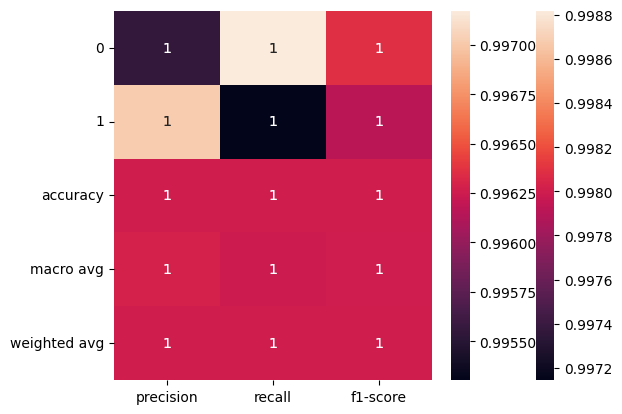

In [55]:
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 20)
dt.fit(X_train, class3_target)

eval_metrics(dt, X_train , class3_target)
eval_metrics(dt, X_test , class3_test)


Model Accuracy:
 0.9688429832691088

Confusion matrix:
 [[81412  2753]
 [ 2357 77486]]

Classification report:
 {'0': {'precision': 0.9718630997146916, 'recall': 0.9672904413948791, 'f1-score': 0.9695713792323176, 'support': 84165.0}, '1': {'precision': 0.965690001121649, 'recall': 0.9704795661485666, 'f1-score': 0.9680788595844628, 'support': 79843.0}, 'accuracy': 0.9688429832691088, 'macro avg': {'precision': 0.9687765504181703, 'recall': 0.9688850037717228, 'f1-score': 0.9688251194083902, 'support': 164008.0}, 'weighted avg': {'precision': 0.9688578883166847, 'recall': 0.9688429832691088, 'f1-score': 0.9688447851256662, 'support': 164008.0}}

MCC: 0.9376615479178381



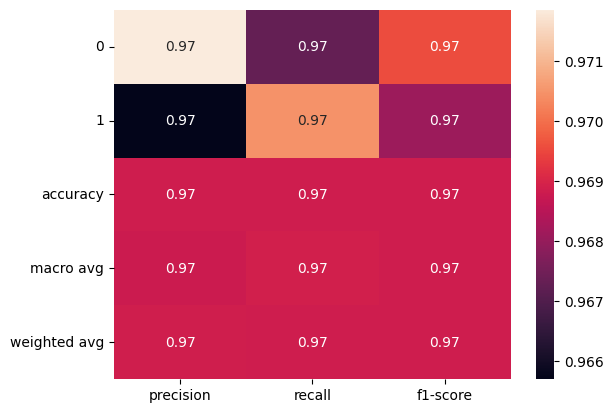

In [60]:
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 40)
dt.fit(X_train, class3_target)
classificationdt = eval_metrics(dt, X_test , class3_test)

In [61]:
classificationdt

{'0': {'precision': 0.9718630997146916,
  'recall': 0.9672904413948791,
  'f1-score': 0.9695713792323176,
  'support': 84165.0},
 '1': {'precision': 0.965690001121649,
  'recall': 0.9704795661485666,
  'f1-score': 0.9680788595844628,
  'support': 79843.0},
 'accuracy': 0.9688429832691088,
 'macro avg': {'precision': 0.9687765504181703,
  'recall': 0.9688850037717228,
  'f1-score': 0.9688251194083902,
  'support': 164008.0},
 'weighted avg': {'precision': 0.9688578883166847,
  'recall': 0.9688429832691088,
  'f1-score': 0.9688447851256662,
  'support': 164008.0}}

In [90]:
dt=DecisionTreeClassifier()

parameter_grid = {'max_depth': [15,20,30,40,50],
                 'criterion':['gini','entropy'],
                 }

grid_search = GridSearchCV(dt, param_grid = parameter_grid, 
                          cv =7, verbose = 3)

model = grid_search.fit(X_train, class3_target)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))



Fitting 7 folds for each of 10 candidates, totalling 70 fits
[CV 1/7] END ......criterion=gini, max_depth=15;, score=0.975 total time= 1.7min
[CV 2/7] END ......criterion=gini, max_depth=15;, score=0.975 total time= 2.2min
[CV 3/7] END ......criterion=gini, max_depth=15;, score=0.975 total time= 2.3min
[CV 4/7] END ......criterion=gini, max_depth=15;, score=0.976 total time= 2.4min
[CV 5/7] END ......criterion=gini, max_depth=15;, score=0.976 total time= 2.2min
[CV 6/7] END ......criterion=gini, max_depth=15;, score=0.977 total time= 2.1min
[CV 7/7] END ......criterion=gini, max_depth=15;, score=0.975 total time= 2.1min
[CV 1/7] END ......criterion=gini, max_depth=20;, score=0.979 total time= 2.8min
[CV 2/7] END ......criterion=gini, max_depth=20;, score=0.978 total time= 3.1min
[CV 3/7] END ......criterion=gini, max_depth=20;, score=0.979 total time= 2.8min
[CV 4/7] END ......criterion=gini, max_depth=20;, score=0.980 total time= 2.8min
[CV 5/7] END ......criterion=gini, max_depth=20;

### Naive Bayes

In [55]:
gnb_clf = GaussianNB()

parameter_grid = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
                 }

grid_search = GridSearchCV(gnb_clf, param_grid = parameter_grid, 
                          cv =7, verbose = 2)

model = grid_search.fit(X_train, class3_target)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 7 folds for each of 14 candidates, totalling 98 fits
[CV] END .................................var_smoothing=0.01; total time=   2.2s
[CV] END .................................var_smoothing=0.01; total time=   1.9s
[CV] END .................................var_smoothing=0.01; total time=   2.3s
[CV] END .................................var_smoothing=0.01; total time=   2.1s
[CV] END .................................var_smoothing=0.01; total time=   2.0s
[CV] END .................................var_smoothing=0.01; total time=   2.5s
[CV] END .................................var_smoothing=0.01; total time=   2.0s
[CV] END ................................var_smoothing=0.001; total time=   1.9s
[CV] END ................................var_smoothing=0.001; total time=   2.0s
[CV] END ................................var_smoothing=0.001; total time=   2.5s
[CV] END ................................var_smoothing=0.001; total time=   2.1s
[CV] END ................................var_smo


Model Accuracy:
 0.8902597590662636

Confusion matrix:
 [[278911  57749]
 [ 14244 305127]]

Classification report:
 {'0': {'precision': 0.9514113694120857, 'recall': 0.8284649200974277, 'f1-score': 0.8856918301405967, 'support': 336660.0}, '1': {'precision': 0.8408574829969466, 'recall': 0.9553998327963403, 'f1-score': 0.8944766338290973, 'support': 319371.0}, 'accuracy': 0.8902597590662636, 'macro avg': {'precision': 0.8961344262045161, 'recall': 0.8919323764468841, 'f1-score': 0.890084231984847, 'support': 656031.0}, 'weighted avg': {'precision': 0.8975911913133534, 'recall': 0.8902597590662636, 'f1-score': 0.8899684749009816, 'support': 656031.0}}

MCC: 0.7880555997003227


Model Accuracy:
 0.889737085995805

Confusion matrix:
 [[69693 14472]
 [ 3612 76231]]

Classification report:
 {'0': {'precision': 0.9507264170247596, 'recall': 0.828052040634468, 'f1-score': 0.8851590779196037, 'support': 84165.0}, '1': {'precision': 0.8404462917433823, 'recall': 0.9547612188920757, 'f1-score':

{'0': {'precision': 0.9507264170247596,
  'recall': 0.828052040634468,
  'f1-score': 0.8851590779196037,
  'support': 84165.0},
 '1': {'precision': 0.8404462917433823,
  'recall': 0.9547612188920757,
  'f1-score': 0.8939640917992799,
  'support': 79843.0},
 'accuracy': 0.889737085995805,
 'macro avg': {'precision': 0.895586354384071,
  'recall': 0.8914066297632719,
  'f1-score': 0.8895615848594418,
  'support': 164008.0},
 'weighted avg': {'precision': 0.8970394258850529,
  'recall': 0.889737085995805,
  'f1-score': 0.889445568354186,
  'support': 164008.0}}

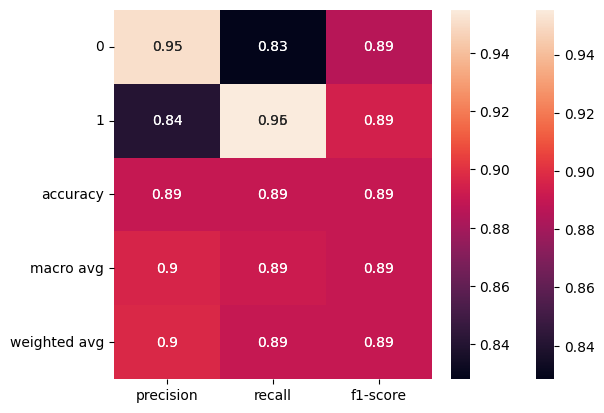

In [56]:
gnb = GaussianNB(var_smoothing= 0.01)
gnb.fit(X_train, class3_target)
eval_metrics(gnb, X_train , class3_target)
eval_metrics(gnb, X_test , class3_test)


Model Accuracy:
 0.8039120042924736

Confusion matrix:
 [[63518 20647]
 [11513 68330]]

Classification report:
 {'0': {'precision': 0.8465567565406299, 'recall': 0.7546842511732905, 'f1-score': 0.7979848739918087, 'support': 84165.0}, '1': {'precision': 0.7679512683052924, 'recall': 0.8558045163633631, 'f1-score': 0.8095012439284445, 'support': 79843.0}, 'accuracy': 0.8039120042924736, 'macro avg': {'precision': 0.8072540124229611, 'recall': 0.8052443837683267, 'f1-score': 0.8037430589601267, 'support': 164008.0}, 'weighted avg': {'precision': 0.8082897329980341, 'recall': 0.8039120042924736, 'f1-score': 0.8035913171217219, 'support': 164008.0}}

MCC: 0.6124950993514726



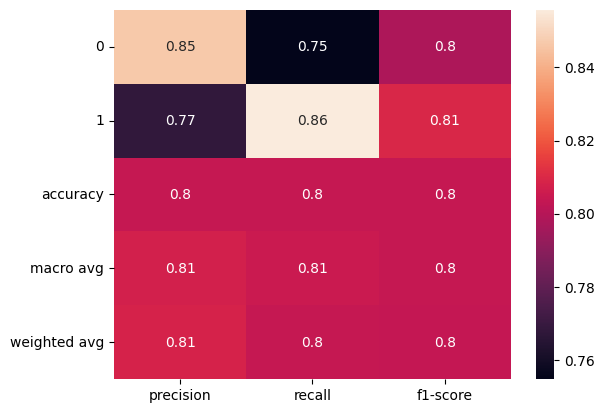

In [59]:
gnb = GaussianNB(var_smoothing= 1e-7)
gnb.fit(X_train, class3_target)
classificationgnb = eval_metrics(gnb, X_test , class3_test)

In [58]:
classification

{'0': {'precision': 0.8465567565406299,
  'recall': 0.7546842511732905,
  'f1-score': 0.7979848739918087,
  'support': 84165.0},
 '1': {'precision': 0.7679512683052924,
  'recall': 0.8558045163633631,
  'f1-score': 0.8095012439284445,
  'support': 79843.0},
 'accuracy': 0.8039120042924736,
 'macro avg': {'precision': 0.8072540124229611,
  'recall': 0.8052443837683267,
  'f1-score': 0.8037430589601267,
  'support': 164008.0},
 'weighted avg': {'precision': 0.8082897329980341,
  'recall': 0.8039120042924736,
  'f1-score': 0.8035913171217219,
  'support': 164008.0}}

### K-nearest neighbor

In [56]:
knn = KNeighborsClassifier()

k_range = [5,6,7]
weight_options = ['uniform', 'distance']
parameter_grid = dict(n_neighbors=k_range, weights=weight_options)


grid_search = GridSearchCV(knn, param_grid = parameter_grid,
                          cv =5, verbose = 3)

model = grid_search.fit(X_train, class3_target)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[CV 1/5] END ....n_neighbors=5, weights=uniform;, score=0.976 total time=13.9min
[CV 2/5] END ....n_neighbors=5, weights=uniform;, score=0.977 total time=14.0min
[CV 3/5] END ....n_neighbors=5, weights=uniform;, score=0.976 total time=14.3min
[CV 4/5] END ....n_neighbors=5, weights=uniform;, score=0.976 total time=14.0min
[CV 5/5] END ....n_neighbors=5, weights=uniform;, score=0.977 total time=11.7min
[CV 1/5] END ...n_neighbors=5, weights=distance;, score=0.981 total time= 3.8min
[CV 2/5] END ...n_neighbors=5, weights=distance;, score=0.982 total time= 3.6min
[CV 3/5] END ...n_neighbors=5, weights=distance;, score=0.982 total time= 3.6min
[CV 4/5] END ...n_neighbors=5, weights=distance;, score=0.982 total time= 3.6min
[CV 5/5] END ...n_neighbors=5, weights=distance;, score=0.982 total time= 3.7min
[CV 1/5] END ....n_neighbors=6, weights=uniform;, score=0.976 total time= 3.8min
[CV 2/5] END ....n_neighbors=6, weights=uniform;, score=0.976 total time= 3.8min
[CV 3/5] END ....n_neighbor


Model Accuracy:
 0.9835678747378177

Confusion matrix:
 [[82777  1388]
 [ 1307 78536]]

Classification report:
 {'0': {'precision': 0.9844560201703059, 'recall': 0.9835085843284025, 'f1-score': 0.9839820741876624, 'support': 84165.0}, '1': {'precision': 0.9826335018267354, 'recall': 0.9836303746101724, 'f1-score': 0.9831316855170342, 'support': 79843.0}, 'accuracy': 0.9835678747378177, 'macro avg': {'precision': 0.9835447609985206, 'recall': 0.9835694794692875, 'f1-score': 0.9835568798523483, 'support': 164008.0}, 'weighted avg': {'precision': 0.9835687748401652, 'recall': 0.9835678747378177, 'f1-score': 0.9835680847320935, 'support': 164008.0}}

MCC: 0.9671142401519185



{'0': {'precision': 0.9844560201703059,
  'recall': 0.9835085843284025,
  'f1-score': 0.9839820741876624,
  'support': 84165.0},
 '1': {'precision': 0.9826335018267354,
  'recall': 0.9836303746101724,
  'f1-score': 0.9831316855170342,
  'support': 79843.0},
 'accuracy': 0.9835678747378177,
 'macro avg': {'precision': 0.9835447609985206,
  'recall': 0.9835694794692875,
  'f1-score': 0.9835568798523483,
  'support': 164008.0},
 'weighted avg': {'precision': 0.9835687748401652,
  'recall': 0.9835678747378177,
  'f1-score': 0.9835680847320935,
  'support': 164008.0}}

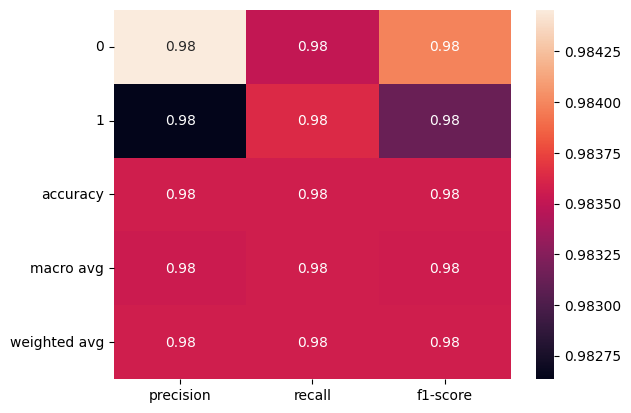

In [57]:
knn = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
knn.fit(X_train, class3_target)
eval_metrics(knn, X_test , class3_test)

In [51]:
eval_metrics(knn, X_train , class3_target)


Model Accuracy:
 0.9999878169549697

Confusion matrix:
 [[294978      2]
 [     5 279584]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    294980
           1       1.00      1.00      1.00    279589

    accuracy                           1.00    574569
   macro avg       1.00      1.00      1.00    574569
weighted avg       1.00      1.00      1.00    574569


MCC: 0.9999756164613883




Model Accuracy:
 0.9660199502463295

Confusion matrix:
 [[81618  2547]
 [ 3026 76817]]

Classification report:
 {'0': {'precision': 0.964250271726289, 'recall': 0.9697380146141508, 'f1-score': 0.966986357362463, 'support': 84165.0}, '1': {'precision': 0.9679073635401442, 'recall': 0.9621006224716006, 'f1-score': 0.9649952577462048, 'support': 79843.0}, 'accuracy': 0.9660199502463295, 'macro avg': {'precision': 0.9660788176332166, 'recall': 0.9659193185428756, 'f1-score': 0.9659908075543339, 'support': 164008.0}, 'weighted avg': {'precision': 0.9660306311093291, 'recall': 0.9660199502463295, 'f1-score': 0.9660170426542724, 'support': 164008.0}}

MCC: 0.9319981225280177



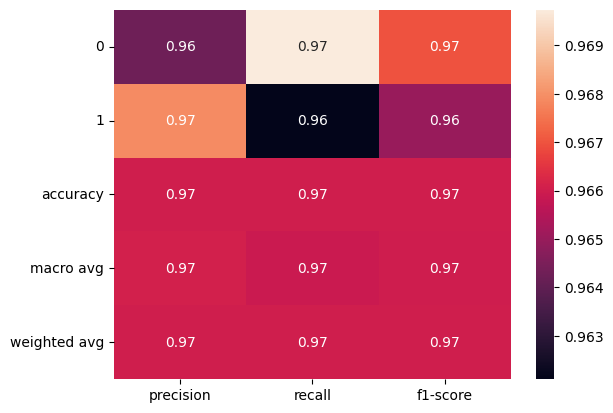

In [62]:
knn = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
knn.fit(X_train, class3_target)
classificationknn = eval_metrics(knn, X_test , class3_test)

In [63]:
classificationknn

{'0': {'precision': 0.964250271726289,
  'recall': 0.9697380146141508,
  'f1-score': 0.966986357362463,
  'support': 84165.0},
 '1': {'precision': 0.9679073635401442,
  'recall': 0.9621006224716006,
  'f1-score': 0.9649952577462048,
  'support': 79843.0},
 'accuracy': 0.9660199502463295,
 'macro avg': {'precision': 0.9660788176332166,
  'recall': 0.9659193185428756,
  'f1-score': 0.9659908075543339,
  'support': 164008.0},
 'weighted avg': {'precision': 0.9660306311093291,
  'recall': 0.9660199502463295,
  'f1-score': 0.9660170426542724,
  'support': 164008.0}}

### Suport Vector Machine

In [57]:
svc=svm.LinearSVC()

parameter_grid = {'C': [0.1, 1, 10, 100],
              'loss': ['hinge','squared_hinge']}

grid_search = GridSearchCV(svc, param_grid = parameter_grid,
                          cv =7, verbose = 3)

model = grid_search.fit(X_train, class3_target)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 7 folds for each of 8 candidates, totalling 56 fits
[CV 1/7] END .................C=0.1, loss=hinge;, score=0.979 total time= 2.8min
[CV 2/7] END .................C=0.1, loss=hinge;, score=0.978 total time= 2.8min
[CV 3/7] END .................C=0.1, loss=hinge;, score=0.979 total time= 3.1min
[CV 4/7] END .................C=0.1, loss=hinge;, score=0.978 total time= 2.7min
[CV 5/7] END .................C=0.1, loss=hinge;, score=0.978 total time= 2.8min
[CV 6/7] END .................C=0.1, loss=hinge;, score=0.978 total time= 3.1min
[CV 7/7] END .................C=0.1, loss=hinge;, score=0.979 total time= 2.9min
[CV 1/7] END .........C=0.1, loss=squared_hinge;, score=0.978 total time= 5.8min
[CV 2/7] END .........C=0.1, loss=squared_hinge;, score=0.977 total time= 5.7min
[CV 3/7] END .........C=0.1, loss=squared_hinge;, score=0.978 total time= 5.7min
[CV 4/7] END .........C=0.1, loss=squared_hinge;, score=0.977 total time= 5.7min
[CV 5/7] END .........C=0.1, loss=squared_hinge;,


Model Accuracy:
 0.9795741671137993

Confusion matrix:
 [[83700   465]
 [ 2885 76958]]

Classification report:
 {'0': {'precision': 0.9666801409020038, 'recall': 0.994475138121547, 'f1-score': 0.980380673499268, 'support': 84165.0}, '1': {'precision': 0.9939940327809565, 'recall': 0.9638665881793019, 'f1-score': 0.9786985108033522, 'support': 79843.0}, 'accuracy': 0.9795741671137993, 'macro avg': {'precision': 0.9803370868414802, 'recall': 0.9791708631504245, 'f1-score': 0.9795395921513101, 'support': 164008.0}, 'weighted avg': {'precision': 0.9799771939072915, 'recall': 0.9795741671137993, 'f1-score': 0.9795617566407611, 'support': 164008.0}}

MCC: 0.9595072412545773



{'0': {'precision': 0.9666801409020038,
  'recall': 0.994475138121547,
  'f1-score': 0.980380673499268,
  'support': 84165.0},
 '1': {'precision': 0.9939940327809565,
  'recall': 0.9638665881793019,
  'f1-score': 0.9786985108033522,
  'support': 79843.0},
 'accuracy': 0.9795741671137993,
 'macro avg': {'precision': 0.9803370868414802,
  'recall': 0.9791708631504245,
  'f1-score': 0.9795395921513101,
  'support': 164008.0},
 'weighted avg': {'precision': 0.9799771939072915,
  'recall': 0.9795741671137993,
  'f1-score': 0.9795617566407611,
  'support': 164008.0}}

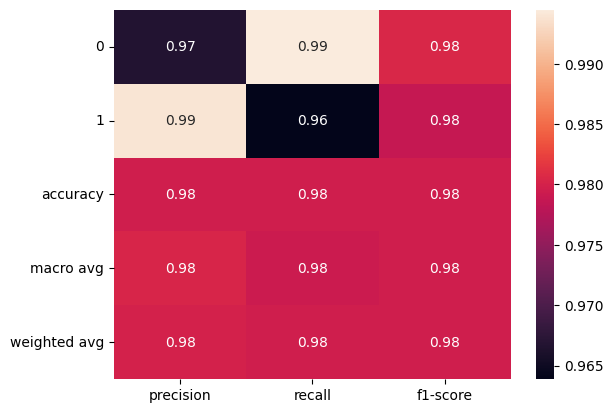

In [58]:
svc=svm.LinearSVC(C = 10, loss = 'hinge', penalty ='l2')
svc.fit(X_train, class3_target)
eval_metrics(svc, X_test, class3_test)


In [55]:
eval_metrics(svc, X_train , class3_target)


Model Accuracy:
 0.928734407877905

Confusion matrix:
 [[280036  14944]
 [ 26003 253586]]

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.93    294980
           1       0.94      0.91      0.93    279589

    accuracy                           0.93    574569
   macro avg       0.93      0.93      0.93    574569
weighted avg       0.93      0.93      0.93    574569


MCC: 0.8578572118575332




Model Accuracy:
 0.9149980488756646

Confusion matrix:
 [[78032  6133]
 [ 7808 72035]]

Classification report:
 {'0': {'precision': 0.909040074557316, 'recall': 0.9271312303213926, 'f1-score': 0.9179965295138379, 'support': 84165.0}, '1': {'precision': 0.9215407839525125, 'recall': 0.902208083363601, 'f1-score': 0.9117719652429261, 'support': 79843.0}, 'accuracy': 0.9149980488756646, 'macro avg': {'precision': 0.9152904292549142, 'recall': 0.9146696568424968, 'f1-score': 0.914884247378382, 'support': 164008.0}, 'weighted avg': {'precision': 0.9151257175761971, 'recall': 0.9149980488756646, 'f1-score': 0.914966263398268, 'support': 164008.0}}

MCC: 0.8299598539426072



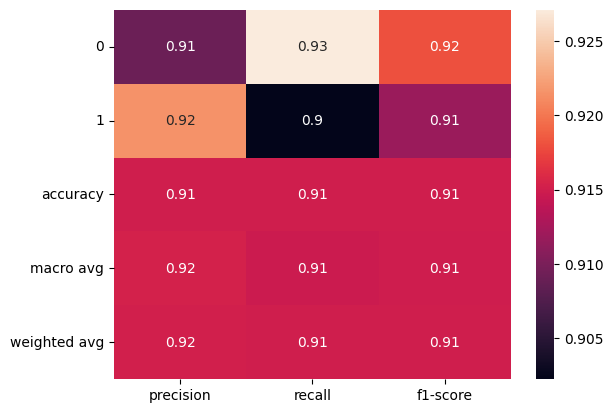

In [64]:
svc=svm.LinearSVC(C = 1, loss = 'hinge', penalty ='l2')
svc.fit(X_train, class3_target)
classificationsvm = eval_metrics(svc, X_test , class3_test)

In [65]:
classificationsvm

{'0': {'precision': 0.909040074557316,
  'recall': 0.9271312303213926,
  'f1-score': 0.9179965295138379,
  'support': 84165.0},
 '1': {'precision': 0.9215407839525125,
  'recall': 0.902208083363601,
  'f1-score': 0.9117719652429261,
  'support': 79843.0},
 'accuracy': 0.9149980488756646,
 'macro avg': {'precision': 0.9152904292549142,
  'recall': 0.9146696568424968,
  'f1-score': 0.914884247378382,
  'support': 164008.0},
 'weighted avg': {'precision': 0.9151257175761971,
  'recall': 0.9149980488756646,
  'f1-score': 0.914966263398268,
  'support': 164008.0}}

### Logistic Regression

In [58]:
clf = LogisticRegression()

parameter_grid = {'C':[1, 10, 100, 1000]}

grid_search = GridSearchCV(clf, param_grid = parameter_grid,
                          cv =5, verbose = 3)

model = grid_search.fit(X_train, class3_target)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ...............................C=1;, score=0.978 total time=  13.2s
[CV 2/5] END ...............................C=1;, score=0.978 total time=  13.4s
[CV 3/5] END ...............................C=1;, score=0.977 total time=  13.6s
[CV 4/5] END ...............................C=1;, score=0.978 total time=  13.0s
[CV 5/5] END ...............................C=1;, score=0.978 total time=  13.2s
[CV 1/5] END ..............................C=10;, score=0.978 total time=  13.3s
[CV 2/5] END ..............................C=10;, score=0.978 total time=  13.5s
[CV 3/5] END ..............................C=10;, score=0.978 total time=  13.9s
[CV 4/5] END ..............................C=10;, score=0.978 total time=  13.3s
[CV 5/5] END ..............................C=10;, score=0.978 total time=  14.3s
[CV 1/5] END .............................C=100;, score=0.978 total time=  13.7s
[CV 2/5] END .............................C=100;,

In [43]:
clf = LogisticRegression( C = 1000, penalty = 'l2')
clf.fit(X_train, class3_target)
eval_metrics(clf, X_test , class3_test)


Model Accuracy:
 0.9172052582800839

Confusion matrix:
 [[78864  5301]
 [ 8278 71565]]

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.92     84165
           1       0.93      0.90      0.91     79843

    accuracy                           0.92    164008
   macro avg       0.92      0.92      0.92    164008
weighted avg       0.92      0.92      0.92    164008


MCC: 0.8346886841593696



In [57]:
eval_metrics(clf, X_train , class3_target)


Model Accuracy:
 0.9227943032081438

Confusion matrix:
 [[278276  16704]
 [ 27656 251933]]

Classification report:
               precision    recall  f1-score   support

           0       0.91      0.94      0.93    294980
           1       0.94      0.90      0.92    279589

    accuracy                           0.92    574569
   macro avg       0.92      0.92      0.92    574569
weighted avg       0.92      0.92      0.92    574569


MCC: 0.8459367369163572




Model Accuracy:
 0.9167784498317155

Confusion matrix:
 [[78810  5355]
 [ 8294 71549]]

Classification report:
 {'0': {'precision': 0.9047804922850845, 'recall': 0.9363749777223311, 'f1-score': 0.9203066521086711, 'support': 84165.0}, '1': {'precision': 0.930367731197337, 'recall': 0.8961211377328007, 'f1-score': 0.912923373334099, 'support': 79843.0}, 'accuracy': 0.9167784498317155, 'macro avg': {'precision': 0.9175741117412107, 'recall': 0.9162480577275659, 'f1-score': 0.916615012721385, 'support': 164008.0}, 'weighted avg': {'precision': 0.9172369695085796, 'recall': 0.9167784498317155, 'f1-score': 0.9167122961797033, 'support': 164008.0}}

MCC: 0.8338211150350956



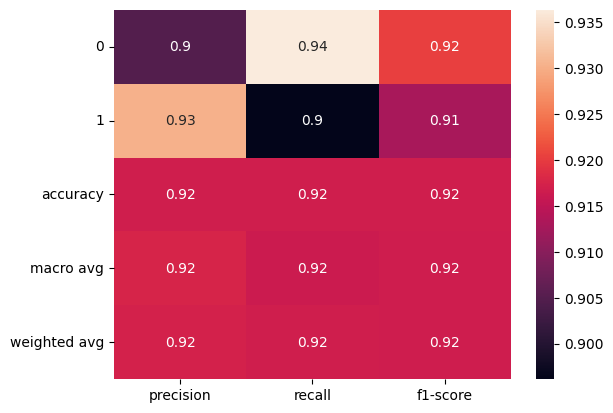

In [66]:
clf = LogisticRegression( C = 1000, penalty = 'l2')
clf.fit(X_train, class3_target)
classificationclf = eval_metrics(clf, X_test , class3_test)

In [67]:
classificationclf

{'0': {'precision': 0.9047804922850845,
  'recall': 0.9363749777223311,
  'f1-score': 0.9203066521086711,
  'support': 84165.0},
 '1': {'precision': 0.930367731197337,
  'recall': 0.8961211377328007,
  'f1-score': 0.912923373334099,
  'support': 79843.0},
 'accuracy': 0.9167784498317155,
 'macro avg': {'precision': 0.9175741117412107,
  'recall': 0.9162480577275659,
  'f1-score': 0.916615012721385,
  'support': 164008.0},
 'weighted avg': {'precision': 0.9172369695085796,
  'recall': 0.9167784498317155,
  'f1-score': 0.9167122961797033,
  'support': 164008.0}}

In [89]:
clf = LogisticRegression()

parameter_grid = {'C':[1, 10, 100, 1000]}

grid_search = GridSearchCV(clf, param_grid = parameter_grid,
                          cv =7, verbose = 3)

model = grid_search.fit(X_train, class3_target)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 7 folds for each of 4 candidates, totalling 28 fits
[CV 1/7] END ...............................C=1;, score=0.934 total time=   3.3s
[CV 2/7] END ...............................C=1;, score=0.933 total time=   3.3s
[CV 3/7] END ...............................C=1;, score=0.935 total time=   3.2s
[CV 4/7] END ...............................C=1;, score=0.935 total time=   3.3s
[CV 5/7] END ...............................C=1;, score=0.934 total time=   3.2s
[CV 6/7] END ...............................C=1;, score=0.936 total time=   3.3s
[CV 7/7] END ...............................C=1;, score=0.934 total time=   3.5s
[CV 1/7] END ..............................C=10;, score=0.934 total time=   3.4s
[CV 2/7] END ..............................C=10;, score=0.933 total time=   3.5s
[CV 3/7] END ..............................C=10;, score=0.935 total time=   3.5s
[CV 4/7] END ..............................C=10;, score=0.933 total time=   3.6s
[CV 5/7] END ..............................C=10;,

### XGB

In [59]:
xgb_model = xgb.XGBClassifier()

params = { 
    'model__max_depth': [3,4],
    'model__learning_rate': [ 0.01, 0.1, 1 ],
    "model__gamma":[0, 0.25, 0.5, 0.75, 1],
    'model__n_estimators': [50 ,100, 300, 500],
    #"model__subsample":[0.9],
    #"model__colsample_bytree":[0.5],
    #"model__early_stopping_rounds": [10], 
}


grid_search = GridSearchCV(xgb_model, param_grid = params, cv =StratifiedKFold(5), verbose = 3)
model = grid_search.fit(X_train, class3_target)
print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.997 total time=   3.6s
[CV 2/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.997 total time=   3.8s
[CV 3/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.997 total time=   4.1s
[CV 4/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.997 total time=   4.1s
[CV 5/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.997 total time=   5.2s
[CV 1/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100;, score=0.997 total time=   5.6s
[CV 2/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100;, score=0.997 total time=   5.1s
[CV 3/5] EN


Model Accuracy:
 0.9971037998146431

Confusion matrix:
 [[84026   139]
 [  336 79507]]

Classification report:
 {'0': {'precision': 0.9960171641260283, 'recall': 0.9983484821481613, 'f1-score': 0.9971814605374807, 'support': 84165.0}, '1': {'precision': 0.9982547773899505, 'recall': 0.9957917412922861, 'f1-score': 0.9970217381763005, 'support': 79843.0}, 'accuracy': 0.9971037998146431, 'macro avg': {'precision': 0.9971359707579894, 'recall': 0.9970701117202236, 'f1-score': 0.9971015993568906, 'support': 164008.0}, 'weighted avg': {'precision': 0.9971064875482475, 'recall': 0.9971037998146431, 'f1-score': 0.9971037038885142, 'support': 164008.0}}

MCC: 0.9942060802968682



{'0': {'precision': 0.9960171641260283,
  'recall': 0.9983484821481613,
  'f1-score': 0.9971814605374807,
  'support': 84165.0},
 '1': {'precision': 0.9982547773899505,
  'recall': 0.9957917412922861,
  'f1-score': 0.9970217381763005,
  'support': 79843.0},
 'accuracy': 0.9971037998146431,
 'macro avg': {'precision': 0.9971359707579894,
  'recall': 0.9970701117202236,
  'f1-score': 0.9971015993568906,
  'support': 164008.0},
 'weighted avg': {'precision': 0.9971064875482475,
  'recall': 0.9971037998146431,
  'f1-score': 0.9971037038885142,
  'support': 164008.0}}

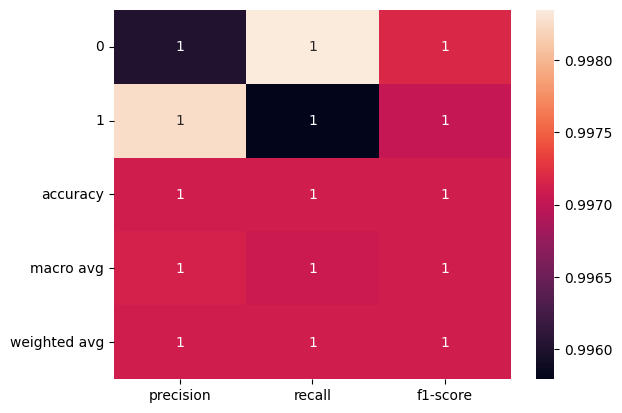

In [59]:
xgb_model = xgb.XGBClassifier(model__learning_rate = 0.01, model_max_depth = 3 , model_n_estimators = 50)
xgb_model.fit(X_train, class3_target)
eval_metrics(xgb_model, X_test, class3_test)

### RF

In [60]:
rfc=RandomForestClassifier()


parameter_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth' : [20, 30, 40],
    'criterion' :['entropy']
}
grid_search = GridSearchCV(rfc, param_grid = parameter_grid,
                          cv =StratifiedKFold(5), verbose = 3)

model = grid_search.fit(X_train, class3_target)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END criterion=entropy, max_depth=20, n_estimators=100;, score=0.996 total time= 7.0min
[CV 2/5] END criterion=entropy, max_depth=20, n_estimators=100;, score=0.996 total time=189.9min
[CV 3/5] END criterion=entropy, max_depth=20, n_estimators=100;, score=0.997 total time= 2.3min
[CV 4/5] END criterion=entropy, max_depth=20, n_estimators=100;, score=0.996 total time= 2.3min
[CV 5/5] END criterion=entropy, max_depth=20, n_estimators=100;, score=0.996 total time= 2.3min
[CV 1/5] END criterion=entropy, max_depth=20, n_estimators=200;, score=0.996 total time= 4.6min
[CV 2/5] END criterion=entropy, max_depth=20, n_estimators=200;, score=0.996 total time= 4.6min
[CV 3/5] END criterion=entropy, max_depth=20, n_estimators=200;, score=0.997 total time= 4.6min
[CV 4/5] END criterion=entropy, max_depth=20, n_estimators=200;, score=0.996 total time= 4.6min
[CV 5/5] END criterion=entropy, max_depth=20, n_estimators=200;, score=0.9


Model Accuracy:
 0.9972257450856056

Confusion matrix:
 [[84050   115]
 [  340 79503]]

Classification report:
 {'0': {'precision': 0.9959710866216376, 'recall': 0.9986336363096299, 'f1-score': 0.997300584378986, 'support': 84165.0}, '1': {'precision': 0.9985556030043458, 'recall': 0.9957416429743371, 'f1-score': 0.9971466377358728, 'support': 79843.0}, 'accuracy': 0.9972257450856056, 'macro avg': {'precision': 0.9972633448129917, 'recall': 0.9971876396419834, 'f1-score': 0.9972236110574294, 'support': 164008.0}, 'weighted avg': {'precision': 0.9972292907430497, 'recall': 0.9972257450856056, 'f1-score': 0.9972256394871143, 'support': 164008.0}}

MCC: 0.9944509815733484



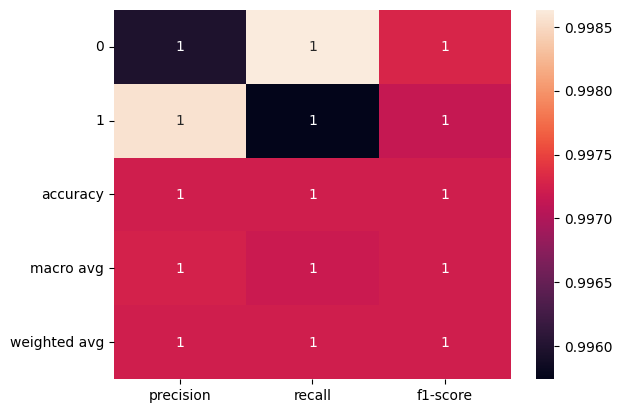

In [115]:
rfc=RandomForestClassifier(  criterion = 'entropy', max_depth =  40, n_estimators = 200)
rfc.fit(X_train, class3_target)
rf_results_9 = eval_metrics(rfc, X_test , class3_test)

### Graph Results F1-Score

In [75]:
r = [0,1]

l = []

for index in r:
    l1 = list()
    l1.append(str(index))
    l1.append(classificationdt[str(index)]['f1-score'])
    print(l1)
    l1.append(classificationknn[str(index)]['f1-score'])
    print(l1)
    l1.append(classificationsvm[str(index)]['f1-score'])
    print(l1)
    l1.append(classificationclf[str(index)]['f1-score'])
    print(l1)
    l1.append(classificationgnb[str(index)]['f1-score'])
    print(l1)
    l.append(l1)
print(l)



['0', 0.9695713792323176]
['0', 0.9695713792323176, 0.966986357362463]
['0', 0.9695713792323176, 0.966986357362463, 0.9179965295138379]
['0', 0.9695713792323176, 0.966986357362463, 0.9179965295138379, 0.9203066521086711]
['0', 0.9695713792323176, 0.966986357362463, 0.9179965295138379, 0.9203066521086711, 0.7979848739918087]
['1', 0.9680788595844628]
['1', 0.9680788595844628, 0.9649952577462048]
['1', 0.9680788595844628, 0.9649952577462048, 0.9117719652429261]
['1', 0.9680788595844628, 0.9649952577462048, 0.9117719652429261, 0.912923373334099]
['1', 0.9680788595844628, 0.9649952577462048, 0.9117719652429261, 0.912923373334099, 0.8095012439284445]
[['0', 0.9695713792323176, 0.966986357362463, 0.9179965295138379, 0.9203066521086711, 0.7979848739918087], ['1', 0.9680788595844628, 0.9649952577462048, 0.9117719652429261, 0.912923373334099, 0.8095012439284445]]


In [77]:
df = pd.DataFrame(l)
df.rename(columns = {0: "class", 1: "DT", 2: "KNN", 3: "SVM",4: "LR", 5: "NB"}, inplace = True)

df

class        DT       KNN       SVM        LR        NB
0     0  0.969571  0.966986  0.917997  0.920307  0.797985
1     1  0.968079  0.964995  0.911772  0.912923  0.809501

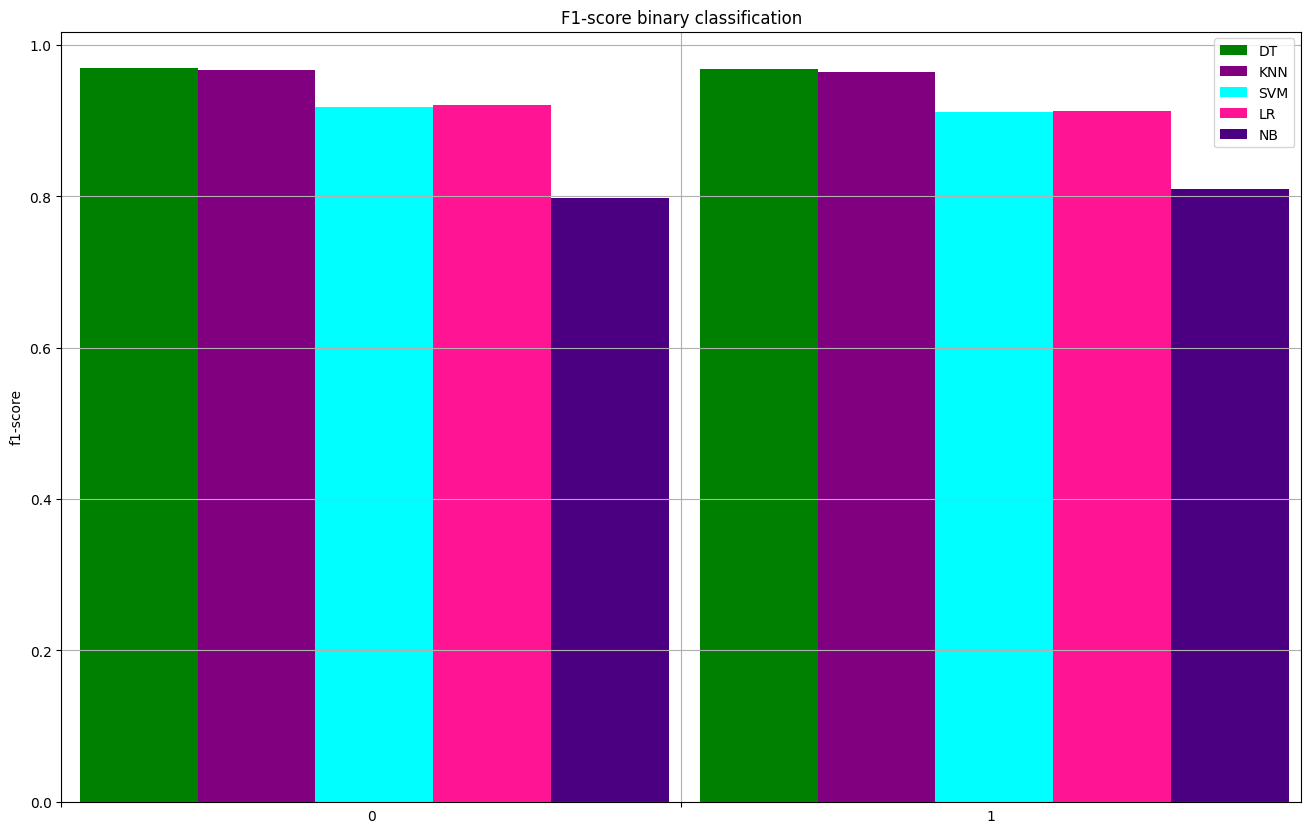

In [86]:
import matplotlib.ticker as ticker

pos = list(range(len(df)))
num_col = len(df.columns) - 1
width = 0.95 / num_col

fig, ax = plt.subplots(figsize=(16,10))

bar_colors = ['green', 'purple', 'cyan', 'deeppink', 'indigo']
bar_labels = df.columns[1:]

for i, (colname, color, lbl) in enumerate(zip(df.columns[1:], bar_colors, bar_labels)):
    delta_p = 0.125 + width*i
    plt.bar([p + delta_p for p in pos],
            df[colname], width, color=color, label=lbl)
ax.set_ylabel('f1-score')
ax.set_title('F1-score binary classification')
ax.set_xticks(pos)

def update_ticks(x, pos):
    return df['class'][pos]

ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(ticker.FuncFormatter(update_ticks))
ax.xaxis.set_minor_locator(ticker.FixedLocator([p+0.5 for p in pos]))
for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')
plt.xlim(min(pos), max(pos)+1)
plt.legend()
plt.grid()
plt.show()

## Multiclass 9

In [46]:
attacks_9 = ["Normal", "Reconnaissance" , "Weaponization", "Exploitation", "Lateral Movement", "Comand and Control" , "Exfiltration",
               "Tampering", "Crypto-ransomware", "RDOS"]

In [47]:
class2_train = y_train.copy(deep=True)
class2_train = y_train.replace({1:9 , 2:1 , 3:1, 4:2, 5:4, 6:1, 7:6, 8:2, 9:4, 10:7, 11:5, 12:2, 13:4, 14:1, 15:3, 16:8})
class2_train.value_counts()

class1
0    336660
9    113009
1    102072
2     53805
4     25276
6     17707
7      4075
5      2247
3       813
8       367
Name: count, dtype: int64

In [48]:
class2_test = y_test.copy(deep=True)
class2_test = y_test.replace({1:9 , 2:1 , 3:1, 4:2, 5:4, 6:1, 7:6, 8:2, 9:4, 10:7, 11:5, 12:2, 13:4, 14:1, 15:3, 16:8})
class2_test.value_counts()

class1
0    84165
9    28252
1    25518
2    13451
4     6320
6     4427
7     1019
5      562
3      203
8       91
Name: count, dtype: int64

### DT

In [75]:
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 40)
dt.fit(X_train, class2_train)


DecisionTreeClassifier(criterion='entropy', max_depth=40)


Model Accuracy:
 0.9960123896395298

Confusion matrix:
 [[83814   219     0     5    88    31     3     3     1     1]
 [  157 25349     2     4     3     2     1     0     0     0]
 [    2     0 13445     0     0     0     4     0     0     0]
 [    2     2     0   197     2     0     0     0     0     0]
 [   74     2     0     2  6242     0     0     0     0     0]
 [   27     3     0     0     0   532     0     0     0     0]
 [    2     8     3     0     0     0  4414     0     0     0]
 [    1     0     0     0     0     0     0  1018     0     0]
 [    0     0     0     0     0     0     0     0    91     0]
 [    0     0     0     0     0     0     0     0     0 28252]]


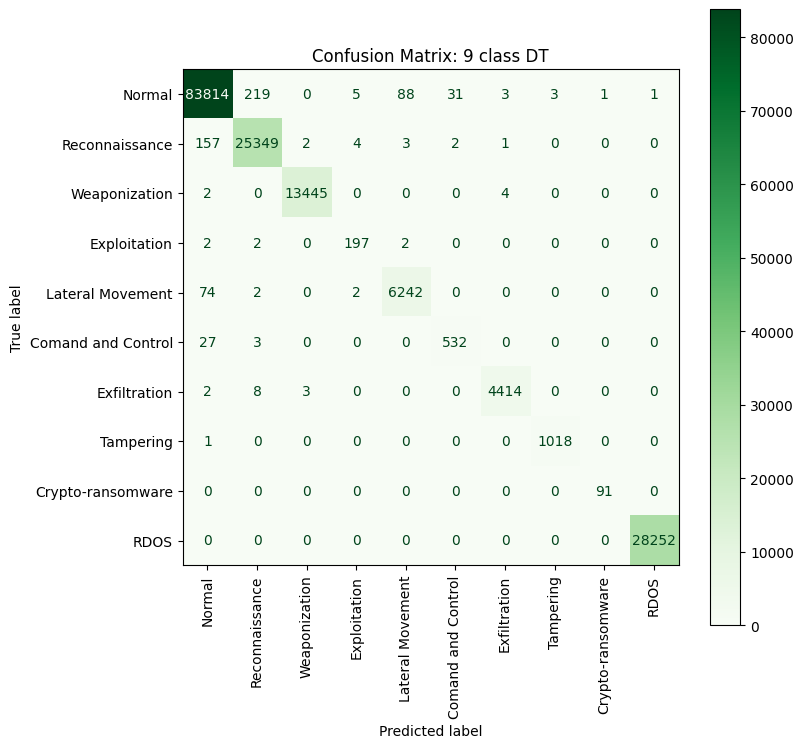


Classification report:
 {'0': {'precision': 0.9968482022859454, 'recall': 0.9958296203885225, 'f1-score': 0.996338651006871, 'support': 84165.0}, '1': {'precision': 0.9908533010202087, 'recall': 0.99337722392037, 'f1-score': 0.9921136572669812, 'support': 25518.0}, '2': {'precision': 0.9996282527881041, 'recall': 0.9995539365102967, 'f1-score': 0.9995910932679083, 'support': 13451.0}, '3': {'precision': 0.9471153846153846, 'recall': 0.9704433497536946, 'f1-score': 0.9586374695863746, 'support': 203.0}, '4': {'precision': 0.9853196527229676, 'recall': 0.9876582278481013, 'f1-score': 0.9864875543263532, 'support': 6320.0}, '5': {'precision': 0.9415929203539823, 'recall': 0.9466192170818505, 'f1-score': 0.9440993788819876, 'support': 562.0}, '6': {'precision': 0.9981908638625057, 'recall': 0.9970634741359837, 'f1-score': 0.9976268504915811, 'support': 4427.0}, '7': {'precision': 0.9970617042115573, 'recall': 0.9990186457311089, 'f1-score': 0.9980392156862745, 'support': 1019.0}, '8': {'p

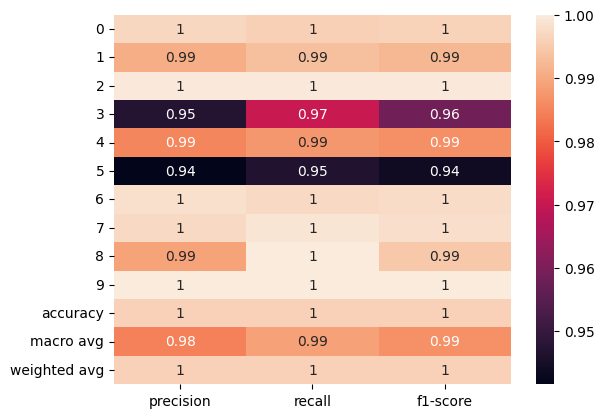

In [76]:
results_9_dt = eval_metrics(dt, X_test , class2_test, attacks_9, "Confusion Matrix: 9 class DT")

#### 3-fold

Classification report:
 {'0': {'precision': 0.995855208621166, 'recall': 0.9955801104972376, 'f1-score': 0.9957176405580881, 'support': 112220.0}, '1': {'precision': 0.9899885499544934, 'recall': 0.9910651304961204, 'f1-score': 0.9905265476977309, 'support': 34024.0}, '2': {'precision': 0.9991636465012546, 'recall': 0.9991636465012546, 'f1-score': 0.9991636465012546, 'support': 17935.0}, '3': {'precision': 0.9586466165413534, 'recall': 0.940959409594096, 'f1-score': 0.9497206703910616, 'support': 271.0}, '4': {'precision': 0.9843342036553525, 'recall': 0.9843342036553525, 'f1-score': 0.9843342036553525, 'support': 8426.0}, '5': {'precision': 0.9318181818181818, 'recall': 0.9305740987983978, 'f1-score': 0.9311957247828991, 'support': 749.0}, '6': {'precision': 0.9969501863774991, 'recall': 0.9967812976452651, 'f1-score': 0.9968657348581109, 'support': 5903.0}, '7': {'precision': 0.9933823529411765, 'recall': 0.9948453608247423, 'f1-score': 0.9941133186166299, 'support': 1358.0}, '8': {'

<Axes: >

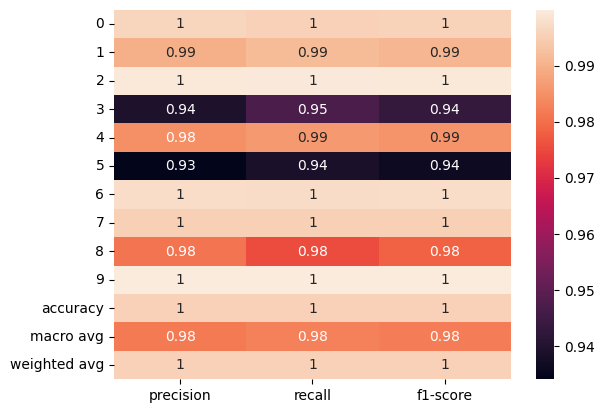

In [77]:
from sklearn.metrics import  accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score

dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 40)

# Variables for average classification report
originalclass = []
predictedclass = []
classification_3_fold = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    classification_fold =  metrics.classification_report(y_true, y_pred, output_dict=True) # print classification report
    classification_3_fold.append(classification_fold)
    #sns.heatmap(pd.DataFrame(classification_fold).iloc[:-1, :].T, annot=True)
    print("Classification report:" "\n", classification_fold)
    return accuracy_score(y_true, y_pred) # return accuracy score

nested_score = cross_val_score(dt, X=X_train, y=class2_train, cv=StratifiedKFold(3, shuffle=True), 
               scoring=make_scorer(classification_report_with_accuracy_score))

print ("Classification report:" "\n", nested_score)

classification_3_fold_mean = metrics.classification_report(originalclass, predictedclass, output_dict=True)

print("Classification report mean:" "\n", classification_3_fold_mean)

sns.heatmap(pd.DataFrame(classification_3_fold_mean).iloc[:-1, :].T, annot=True)

In [78]:
classification_3_fold.append(classification_3_fold_mean)

In [89]:
classification_3_fold[3]["accuracy"]

0.9953782671855446

#### 5-fold

Classification report:
 {'0': {'precision': 0.9964773031302951, 'recall': 0.9956781322402424, 'f1-score': 0.9960775573880097, 'support': 67332.0}, '1': {'precision': 0.9907543293219842, 'recall': 0.9921132556088958, 'f1-score': 0.9914333268063442, 'support': 20414.0}, '2': {'precision': 0.9996283218732578, 'recall': 0.9997212155004181, 'f1-score': 0.9996747665288297, 'support': 10761.0}, '3': {'precision': 0.9565217391304348, 'recall': 0.9447852760736196, 'f1-score': 0.9506172839506172, 'support': 163.0}, '4': {'precision': 0.9819111285882816, 'recall': 0.9877373417721519, 'f1-score': 0.9848156182212581, 'support': 5056.0}, '5': {'precision': 0.9481981981981982, 'recall': 0.9355555555555556, 'f1-score': 0.941834451901566, 'support': 450.0}, '6': {'precision': 0.9983060417843026, 'recall': 0.9985879695001412, 'f1-score': 0.9984469857405054, 'support': 3541.0}, '7': {'precision': 0.9926470588235294, 'recall': 0.9938650306748467, 'f1-score': 0.9932556713672595, 'support': 815.0}, '8': {'p

<Axes: >

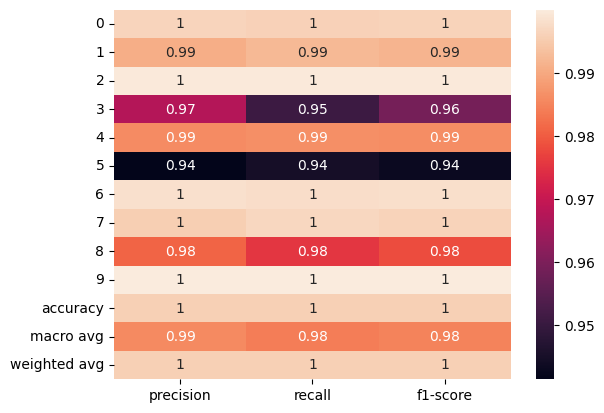

In [79]:
from sklearn.metrics import  accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score

# Variables for average classification report
originalclass = []
predictedclass = []
classification_5_fold = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    classification_fold =  metrics.classification_report(y_true, y_pred, output_dict=True) # print classification report
    classification_5_fold.append(classification_fold)
    #sns.heatmap(pd.DataFrame(classification_fold).iloc[:-1, :].T, annot=True)
    print("Classification report:" "\n", classification_fold)
    return accuracy_score(y_true, y_pred) # return accuracy score

nested_score = cross_val_score(dt, X=X_train, y=class2_train, cv=StratifiedKFold(5, shuffle=True), 
               scoring=make_scorer(classification_report_with_accuracy_score))

print ("Classification report:" "\n", nested_score)

classification_5_fold_mean = metrics.classification_report(originalclass, predictedclass, output_dict=True)

print("Classification report mean:" "\n", classification_5_fold_mean)

sns.heatmap(pd.DataFrame(classification_5_fold_mean).iloc[:-1, :].T, annot=True)

In [80]:
classification_5_fold.append(classification_5_fold_mean)

#### 7-fold

Classification report:
 {'0': {'precision': 0.9964227777546691, 'recall': 0.996174158938745, 'f1-score': 0.9962984528364665, 'support': 48094.0}, '1': {'precision': 0.9913751796837565, 'recall': 0.9932108078452887, 'f1-score': 0.9922921448391627, 'support': 14582.0}, '2': {'precision': 1.0, 'recall': 0.9993494665625813, 'f1-score': 0.9996746274484284, 'support': 7686.0}, '3': {'precision': 0.9322033898305084, 'recall': 0.9482758620689655, 'f1-score': 0.94017094017094, 'support': 116.0}, '4': {'precision': 0.9872222222222222, 'recall': 0.9842148989199667, 'f1-score': 0.9857162668145888, 'support': 3611.0}, '5': {'precision': 0.9430379746835443, 'recall': 0.9283489096573209, 'f1-score': 0.9356357927786499, 'support': 321.0}, '6': {'precision': 0.9980237154150198, 'recall': 0.9980237154150198, 'f1-score': 0.9980237154150198, 'support': 2530.0}, '7': {'precision': 0.9914821124361158, 'recall': 0.9982847341337907, 'f1-score': 0.9948717948717948, 'support': 583.0}, '8': {'precision': 1.0, 'r

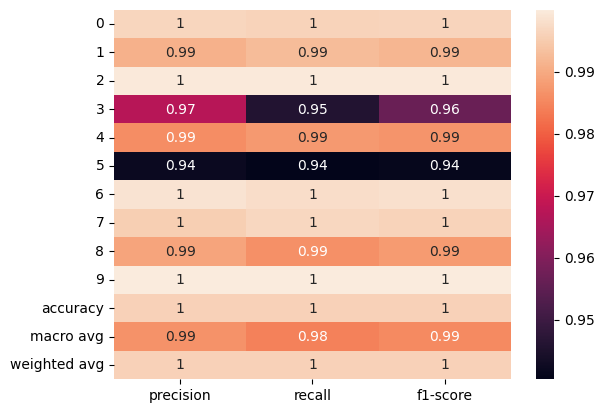

In [81]:
from sklearn.metrics import  accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score

# Variables for average classification report
originalclass = []
predictedclass = []
classification_7_fold = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    classification_fold =  metrics.classification_report(y_true, y_pred, output_dict=True) # print classification report
    classification_7_fold.append(classification_fold)
    #sns.heatmap(pd.DataFrame(classification_fold).iloc[:-1, :].T, annot=True)
    print("Classification report:" "\n", classification_fold)
    return accuracy_score(y_true, y_pred) # return accuracy score

nested_score = cross_val_score(dt, X=X_train, y=class2_train, cv=StratifiedKFold(7, shuffle=True), 
               scoring=make_scorer(classification_report_with_accuracy_score))

print ("Classification report:" "\n", nested_score)

classification_7_fold_mean = metrics.classification_report(originalclass, predictedclass, output_dict=True)

print("Classification report mean:" "\n", classification_7_fold_mean)

sns.heatmap(pd.DataFrame(classification_7_fold_mean).iloc[:-1, :].T, annot=True)

classification_7_fold.append(classification_7_fold_mean)

#### 10-fold

Classification report:
 {'0': {'precision': 0.9969677150841311, 'recall': 0.9961385373967802, 'f1-score': 0.9965529537620349, 'support': 33666.0}, '1': {'precision': 0.9925614172457669, 'recall': 0.9935338493190947, 'f1-score': 0.9930473952213082, 'support': 10207.0}, '2': {'precision': 0.9996281836772635, 'recall': 0.9994423791821562, 'f1-score': 0.9995352727948694, 'support': 5380.0}, '3': {'precision': 0.9759036144578314, 'recall': 0.9878048780487805, 'f1-score': 0.9818181818181818, 'support': 82.0}, '4': {'precision': 0.9830841856805664, 'recall': 0.9885284810126582, 'f1-score': 0.9857988165680474, 'support': 2528.0}, '5': {'precision': 0.9393939393939394, 'recall': 0.9644444444444444, 'f1-score': 0.9517543859649122, 'support': 225.0}, '6': {'precision': 0.998868778280543, 'recall': 0.9971767363071711, 'f1-score': 0.9980220401243288, 'support': 1771.0}, '7': {'precision': 0.9926470588235294, 'recall': 0.9926470588235294, 'f1-score': 0.9926470588235294, 'support': 408.0}, '8': {'pre

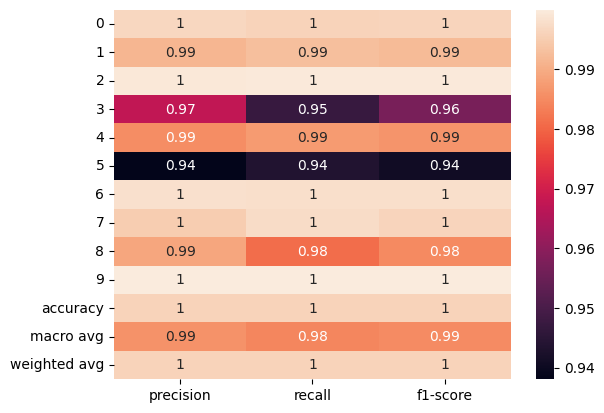

In [82]:
originalclass = []
predictedclass = []
classification_10_fold = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    classification_fold =  metrics.classification_report(y_true, y_pred, output_dict=True) # print classification report
    classification_10_fold.append(classification_fold)
    #sns.heatmap(pd.DataFrame(classification_fold).iloc[:-1, :].T, annot=True)
    print("Classification report:" "\n", classification_fold)
    return accuracy_score(y_true, y_pred) # return accuracy score

nested_score = cross_val_score(dt, X=X_train, y=class2_train, cv=StratifiedKFold(10, shuffle=True), 
               scoring=make_scorer(classification_report_with_accuracy_score))

print ("Classification report:" "\n", nested_score)

classification_10_fold_mean = metrics.classification_report(originalclass, predictedclass, output_dict=True)

print("Classification report mean:" "\n", classification_10_fold_mean)

sns.heatmap(pd.DataFrame(classification_10_fold_mean).iloc[:-1, :].T, annot=True)

classification_10_fold.append(classification_10_fold_mean)

#### 14-fold

Classification report:
 {'0': {'precision': 0.9967948717948718, 'recall': 0.9958414771073315, 'f1-score': 0.9963179463709929, 'support': 24047.0}, '1': {'precision': 0.9902939166097061, 'recall': 0.9935536963379509, 'f1-score': 0.9919211283034369, 'support': 7291.0}, '2': {'precision': 0.9992197659297789, 'recall': 0.9997397866250325, 'f1-score': 0.9994797086368367, 'support': 3843.0}, '3': {'precision': 0.9473684210526315, 'recall': 0.9310344827586207, 'f1-score': 0.9391304347826087, 'support': 58.0}, '4': {'precision': 0.987264673311185, 'recall': 0.987264673311185, 'f1-score': 0.987264673311185, 'support': 1806.0}, '5': {'precision': 0.94375, 'recall': 0.94375, 'f1-score': 0.94375, 'support': 160.0}, '6': {'precision': 0.9976284584980237, 'recall': 0.9976284584980237, 'f1-score': 0.9976284584980237, 'support': 1265.0}, '7': {'precision': 1.0, 'recall': 0.9965753424657534, 'f1-score': 0.9982847341337907, 'support': 292.0}, '8': {'precision': 1.0, 'recall': 0.9615384615384616, 'f1-sco

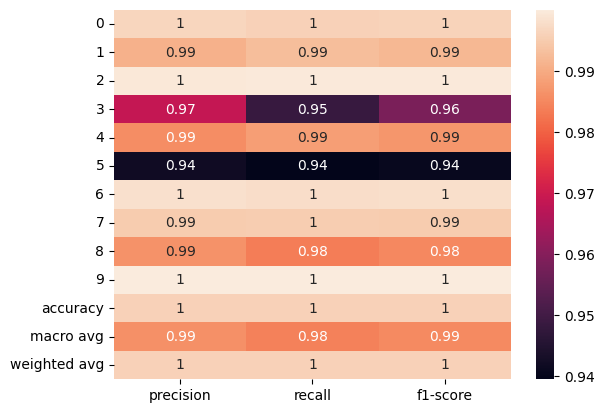

In [83]:
originalclass = []
predictedclass = []
classification_14_fold = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    classification_fold =  metrics.classification_report(y_true, y_pred, output_dict=True) # print classification report
    classification_14_fold.append(classification_fold)
    #sns.heatmap(pd.DataFrame(classification_fold).iloc[:-1, :].T, annot=True)
    print("Classification report:" "\n", classification_fold)
    return accuracy_score(y_true, y_pred) # return accuracy score

nested_score = cross_val_score(dt, X=X_train, y=class2_train, cv=StratifiedKFold(14, shuffle=True), 
               scoring=make_scorer(classification_report_with_accuracy_score))

print ("Classification report:" "\n", nested_score)

classification_14_fold_mean = metrics.classification_report(originalclass, predictedclass, output_dict=True)

print("Classification report mean:" "\n", classification_14_fold_mean)

sns.heatmap(pd.DataFrame(classification_14_fold_mean).iloc[:-1, :].T, annot=True)

classification_14_fold.append(classification_14_fold_mean)

#### Folds

In [84]:
classification_3_fold[3]["accuracy"]

0.9953752185491235

In [85]:
classification_5_fold[5]["accuracy"]

0.9958157465119789

In [86]:
classification_7_fold[7]["accuracy"]

0.9959437892416669

In [87]:
classification_10_fold[10]["accuracy"]

0.9959910431061947

In [88]:
classification_14_fold[14]["accuracy"]

0.9958690976493488

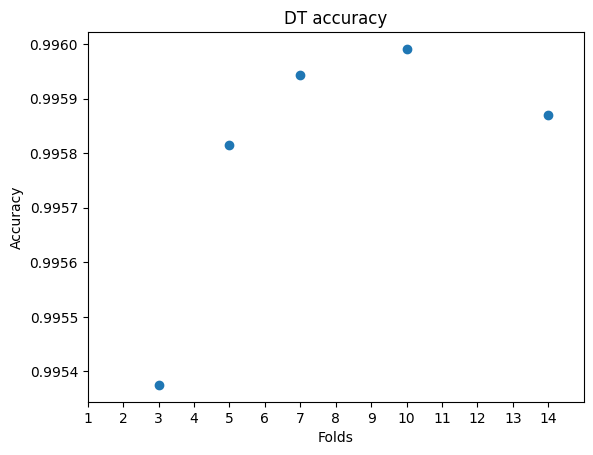

In [89]:
x = [3,5,7,10,14]
# corresponding y axis values
y = [classification_3_fold[3]["accuracy"], classification_5_fold[5]["accuracy"], classification_7_fold[7]["accuracy"], 
     classification_10_fold[10]["accuracy"], classification_14_fold[14]["accuracy"]]
 
# plotting the points 
plt.scatter(x, y, marker='o')
 
# naming the x axis
plt.xlabel("Folds")
plt.xlim(1,15)

dim=np.arange(1,15,1)
plt.xticks(dim)
# naming the y axis
plt.ylabel('Accuracy')
 
# giving a title to my graph
plt.title('DT accuracy')
 
# function to show the plot
plt.show()

### KNN

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
knn.fit(X_train, class2_train)

KNeighborsClassifier(n_neighbors=6, weights='distance')


Model Accuracy:
 0.9814155407053314

Confusion matrix:
 [[82708   706   380     1    90    84   154    11     0    31]
 [  493 25010     4     0     8     3     0     0     0     0]
 [   42     2 13358     0     0     0    49     0     0     0]
 [   48    17     0   130     8     0     0     0     0     0]
 [  368     9     5     3  5910     0     3    22     0     0]
 [  162     2     0     0     0   396     2     0     0     0]
 [   93     2    50     0     0     0  4282     0     0     0]
 [  166     0     0     0    28     0     0   825     0     0]
 [    2     0     0     0     0     0     0     0    89     0]
 [    0     0     0     0     0     0     0     0     0 28252]]


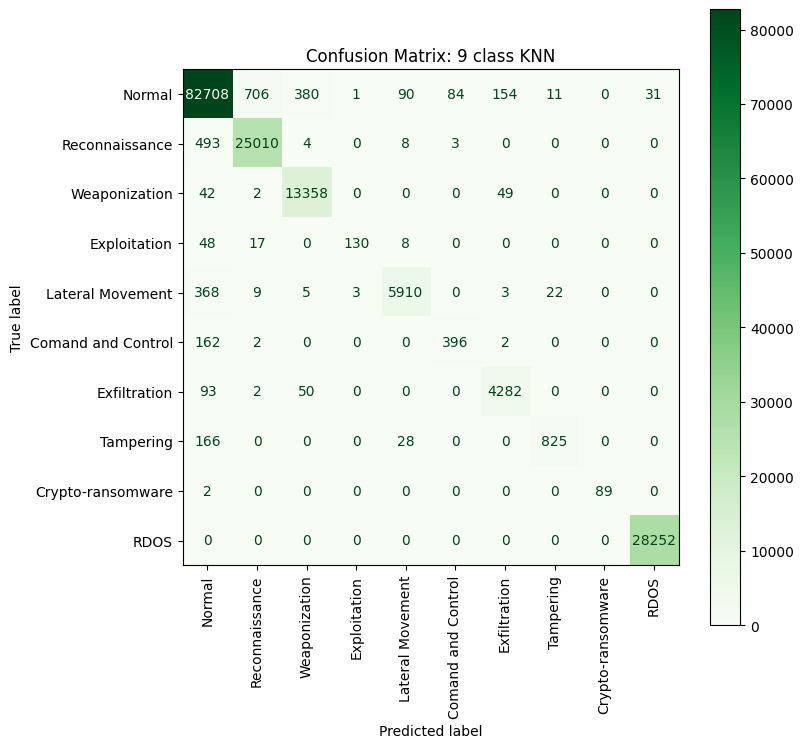


Classification report:
 {'0': {'precision': 0.9836588092576295, 'recall': 0.9826887661141804, 'f1-score': 0.983173548413939, 'support': 84165.0}, '1': {'precision': 0.9713375796178344, 'recall': 0.98009248373697, 'f1-score': 0.975695392657902, 'support': 25518.0}, '2': {'precision': 0.9681814887294339, 'recall': 0.9930860159095978, 'f1-score': 0.9804756312389898, 'support': 13451.0}, '3': {'precision': 0.9701492537313433, 'recall': 0.6403940886699507, 'f1-score': 0.771513353115727, 'support': 203.0}, '4': {'precision': 0.9778292521508934, 'recall': 0.935126582278481, 'f1-score': 0.9560012940795859, 'support': 6320.0}, '5': {'precision': 0.8198757763975155, 'recall': 0.7046263345195729, 'f1-score': 0.7578947368421053, 'support': 562.0}, '6': {'precision': 0.9536748329621381, 'recall': 0.9672464422859725, 'f1-score': 0.9604126948525289, 'support': 4427.0}, '7': {'precision': 0.9615384615384616, 'recall': 0.8096172718351324, 'f1-score': 0.8790623335109216, 'support': 1019.0}, '8': {'prec

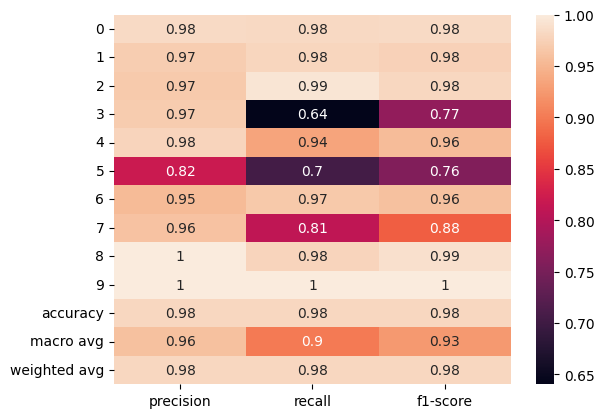

In [62]:
results_9_knn = eval_metrics(knn, X_test , class2_test, attacks_9, "Confusion Matrix: 9 class KNN")

#### 3-folds

In [49]:
knn = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')

Classification report:
 {'0': {'precision': 0.9805759558463524, 'recall': 0.9815808233826412, 'f1-score': 0.9810781323061165, 'support': 112220.0}, '1': {'precision': 0.9691104995022545, 'recall': 0.9728133082529978, 'f1-score': 0.9709583736689255, 'support': 34024.0}, '2': {'precision': 0.9608585175974482, 'recall': 0.990967382213549, 'f1-score': 0.9756807202459377, 'support': 17935.0}, '3': {'precision': 0.9935483870967742, 'recall': 0.5682656826568265, 'f1-score': 0.7230046948356806, 'support': 271.0}, '4': {'precision': 0.9765732087227414, 'recall': 0.9300973178257773, 'f1-score': 0.9527688286426358, 'support': 8426.0}, '5': {'precision': 0.8183229813664596, 'recall': 0.7036048064085447, 'f1-score': 0.756640344580043, 'support': 749.0}, '6': {'precision': 0.9535786630654963, 'recall': 0.9569710316788074, 'f1-score': 0.9552718356303374, 'support': 5903.0}, '7': {'precision': 0.9718693284936479, 'recall': 0.788659793814433, 'f1-score': 0.8707317073170732, 'support': 1358.0}, '8': {'p

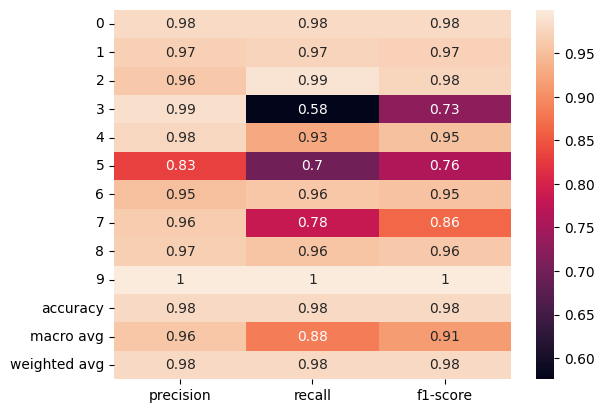

In [50]:
knn_3_folds_class_9 = folds(knn, X_train, class2_train, 3)

#### 5-folds

Classification report:
 {'0': {'precision': 0.982463180109085, 'recall': 0.9818065704271371, 'f1-score': 0.9821347655234401, 'support': 67332.0}, '1': {'precision': 0.9685146494339439, 'recall': 0.9764377388067013, 'f1-score': 0.972460056104403, 'support': 20414.0}, '2': {'precision': 0.9666817564508827, 'recall': 0.9921940340117089, 'f1-score': 0.9792717600660368, 'support': 10761.0}, '3': {'precision': 0.9795918367346939, 'recall': 0.588957055214724, 'f1-score': 0.7356321839080461, 'support': 163.0}, '4': {'precision': 0.9754487311739221, 'recall': 0.9353115727002967, 'f1-score': 0.9549585942233891, 'support': 5055.0}, '5': {'precision': 0.7935323383084577, 'recall': 0.7104677060133631, 'f1-score': 0.7497062279670974, 'support': 449.0}, '6': {'precision': 0.9487322373920312, 'recall': 0.961321287408244, 'f1-score': 0.9549852755574253, 'support': 3542.0}, '7': {'precision': 0.9756838905775076, 'recall': 0.7877300613496933, 'f1-score': 0.8716904276985743, 'support': 815.0}, '8': {'prec

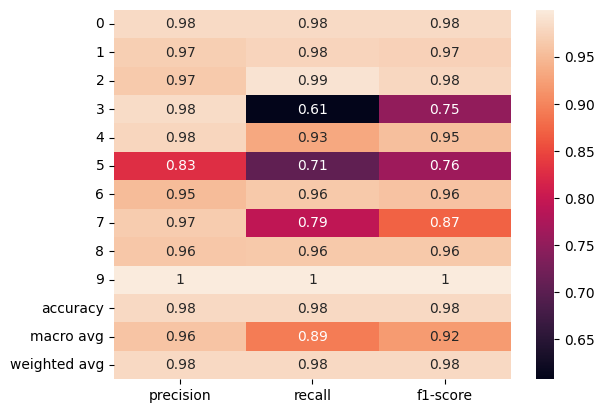

In [51]:
knn_5_folds_class_9 = folds(knn, X_train, class2_train, 5)

#### 7-folds

Classification report:
 {'0': {'precision': 0.9833659084293259, 'recall': 0.9833454621062481, 'f1-score': 0.983355685161505, 'support': 48095.0}, '1': {'precision': 0.973251450017059, 'recall': 0.9781237141681525, 'f1-score': 0.9756814994698498, 'support': 14582.0}, '2': {'precision': 0.9671736375158428, 'recall': 0.9928441321883945, 'f1-score': 0.9798407806882383, 'support': 7686.0}, '3': {'precision': 0.9857142857142858, 'recall': 0.5948275862068966, 'f1-score': 0.7419354838709677, 'support': 116.0}, '4': {'precision': 0.9779198140615921, 'recall': 0.9321517585156467, 'f1-score': 0.9544874521480221, 'support': 3611.0}, '5': {'precision': 0.8169491525423729, 'recall': 0.7507788161993769, 'f1-score': 0.7824675324675325, 'support': 321.0}, '6': {'precision': 0.9592954990215264, 'recall': 0.9691577698695136, 'f1-score': 0.9642014162077105, 'support': 2529.0}, '7': {'precision': 0.9465346534653465, 'recall': 0.8198970840480274, 'f1-score': 0.8786764705882353, 'support': 583.0}, '8': {'pre

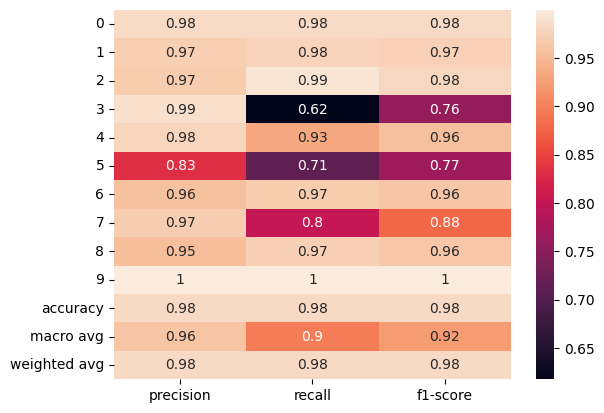

In [52]:
knn_7_folds_class_9 = folds(knn, X_train, class2_train, 7)

#### 10-folds

Classification report:
 {'0': {'precision': 0.9833447342592868, 'recall': 0.9820887542327571, 'f1-score': 0.9827163429386675, 'support': 33666.0}, '1': {'precision': 0.9696793567761309, 'recall': 0.980699519937298, 'f1-score': 0.9751583049196298, 'support': 10207.0}, '2': {'precision': 0.9645825804119985, 'recall': 0.9921933085501858, 'f1-score': 0.9781931464174455, 'support': 5380.0}, '3': {'precision': 0.9591836734693877, 'recall': 0.5802469135802469, 'f1-score': 0.7230769230769232, 'support': 81.0}, '4': {'precision': 0.9824414715719063, 'recall': 0.9295886075949367, 'f1-score': 0.9552845528455284, 'support': 2528.0}, '5': {'precision': 0.8061224489795918, 'recall': 0.7022222222222222, 'f1-score': 0.7505938242280285, 'support': 225.0}, '6': {'precision': 0.9526989426822482, 'recall': 0.9666854884246189, 'f1-score': 0.9596412556053812, 'support': 1771.0}, '7': {'precision': 0.9643916913946587, 'recall': 0.7965686274509803, 'f1-score': 0.87248322147651, 'support': 408.0}, '8': {'preci

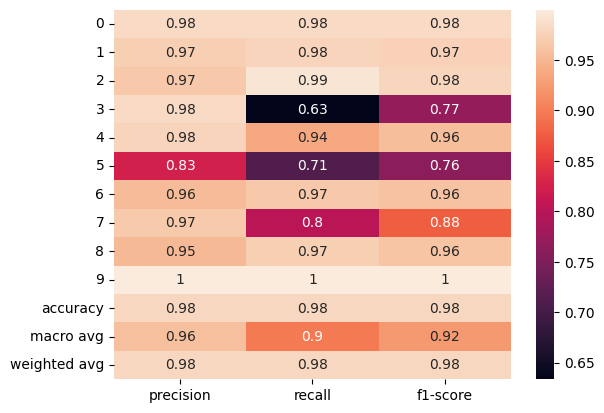

In [53]:
knn_10_folds_class_9 = folds(knn, X_train, class2_train, 10)

#### 14-folds

Classification report:
 {'0': {'precision': 0.9820411556848888, 'recall': 0.9823270126413839, 'f1-score': 0.9821840633640313, 'support': 24048.0}, '1': {'precision': 0.970668485675307, 'recall': 0.9758606501165821, 'f1-score': 0.9732576431160659, 'support': 7291.0}, '2': {'precision': 0.9627016129032258, 'recall': 0.9940150923757481, 'f1-score': 0.9781077966969657, 'support': 3843.0}, '3': {'precision': 0.9705882352941176, 'recall': 0.5689655172413793, 'f1-score': 0.717391304347826, 'support': 58.0}, '4': {'precision': 0.9769319492502884, 'recall': 0.937984496124031, 'f1-score': 0.9570621468926553, 'support': 1806.0}, '5': {'precision': 0.8536585365853658, 'recall': 0.6521739130434783, 'f1-score': 0.7394366197183099, 'support': 161.0}, '6': {'precision': 0.9611111111111111, 'recall': 0.9580696202531646, 'f1-score': 0.9595879556259905, 'support': 1264.0}, '7': {'precision': 0.9625, 'recall': 0.7938144329896907, 'f1-score': 0.8700564971751412, 'support': 291.0}, '8': {'precision': 0.8666

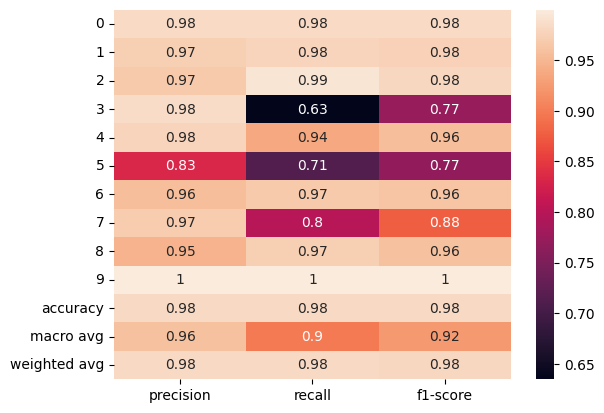

In [54]:
knn_14_folds_class_9 = folds(knn, X_train, class2_train,14)

#### Folds

In [56]:
knn_10_folds_class_9[10]["accuracy"]

0.981400269194596

In [57]:
knn_14_folds_class_9[14]["accuracy"]

0.9816731221542885

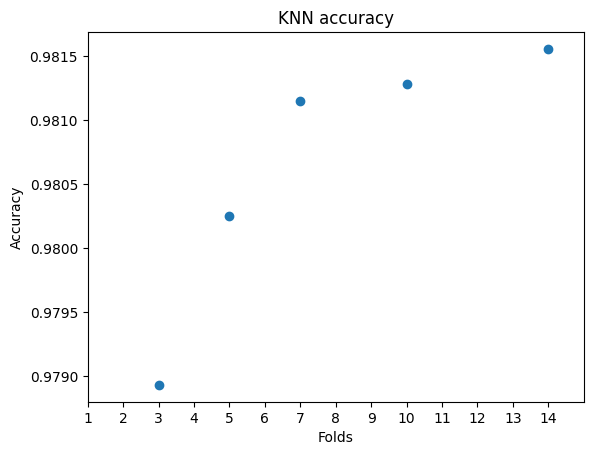

In [55]:
x = [3,5,7,10,14]
# corresponding y axis values
y = [knn_3_folds_class_9[3]["accuracy"], knn_5_folds_class_9[5]["accuracy"], knn_7_folds_class_9[7]["accuracy"], 
     knn_10_folds_class_9[10]["accuracy"], knn_14_folds_class_9[14]["accuracy"]]
 
# plotting the points 
plt.scatter(x, y, marker='o')
 
# naming the x axis
plt.xlabel("Folds")
plt.xlim(1,15)

dim=np.arange(1,15,1)
plt.xticks(dim)
# naming the y axis
plt.ylabel('Accuracy')
 
# giving a title to my graph
plt.title('KNN accuracy')
 
# function to show the plot
plt.show()

### LR

In [51]:
clf = LogisticRegression( C = 100, penalty = 'l2')
clf.fit(X_train, class2_train)

LogisticRegression(C=100)


Model Accuracy:
 0.9753426662114043

Confusion matrix:
 [[83732   143    21     3   104    68    13    33     4    44]
 [ 2275 22877   328     0    34     2     0     0     0     2]
 [    6   103 13159     0     0     0   183     0     0     0]
 [    1    39     0   146    17     0     0     0     0     0]
 [  145    35     1     0  6091     1     1    46     0     0]
 [  171     0     0     0     0   391     0     0     0     0]
 [    5     2   143     0     1     0  4276     0     0     0]
 [   10     0     0     0    28     0     0   981     0     0]
 [    7     0     0     0     0     0     0     0    84     0]
 [   25     0     0     0     0     0     0     0     0 28227]]


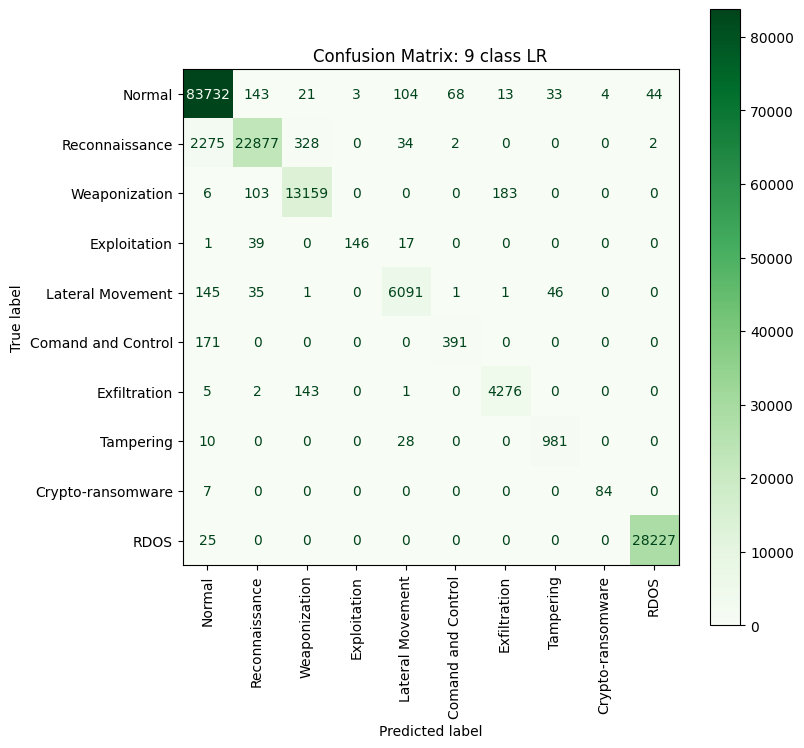


Classification report:
 {'0': {'precision': 0.9693784224967295, 'recall': 0.9948553436701717, 'f1-score': 0.9819516600016419, 'support': 84165.0}, '1': {'precision': 0.9861200913832493, 'recall': 0.8965044282467278, 'f1-score': 0.9391793419135005, 'support': 25518.0}, '2': {'precision': 0.963888075007325, 'recall': 0.9782915768344361, 'f1-score': 0.9710364166328451, 'support': 13451.0}, '3': {'precision': 0.9798657718120806, 'recall': 0.7192118226600985, 'f1-score': 0.8295454545454546, 'support': 203.0}, '4': {'precision': 0.9706772908366534, 'recall': 0.9637658227848102, 'f1-score': 0.9672092100039698, 'support': 6320.0}, '5': {'precision': 0.8463203463203464, 'recall': 0.6957295373665481, 'f1-score': 0.7636718750000001, 'support': 562.0}, '6': {'precision': 0.9559579700424771, 'recall': 0.9658911226564265, 'f1-score': 0.9608988764044943, 'support': 4427.0}, '7': {'precision': 0.9254716981132075, 'recall': 0.9627085377821394, 'f1-score': 0.9437229437229437, 'support': 1019.0}, '8': {

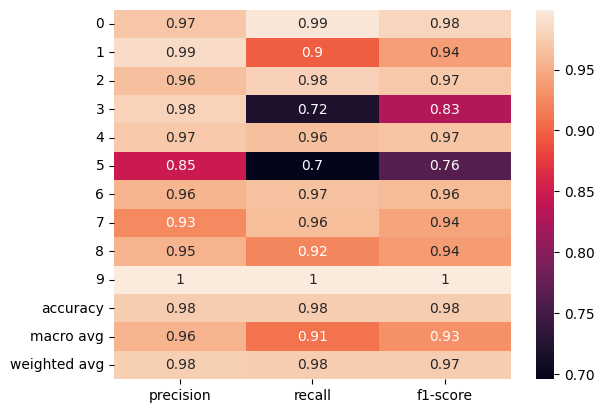

In [52]:
results_9_lr = eval_metrics(clf, X_test , class2_test, attacks_9, "Confusion Matrix: 9 class LR")

#### 3-folds

In [56]:
clf = LogisticRegression( C = 100, penalty = 'l2')

Classification report:
 {'0': {'precision': 0.9683557483731019, 'recall': 0.9945018713241847, 'f1-score': 0.9812546709456192, 'support': 112220.0}, '1': {'precision': 0.9852210390448531, 'recall': 0.8973665647778039, 'f1-score': 0.9392438551696558, 'support': 34024.0}, '2': {'precision': 0.9701129067965464, 'recall': 0.9773069417340395, 'f1-score': 0.9736966363914119, 'support': 17935.0}, '3': {'precision': 0.9504504504504504, 'recall': 0.7785977859778598, 'f1-score': 0.8559837728194726, 'support': 271.0}, '4': {'precision': 0.9691698656429942, 'recall': 0.9588179444576311, 'f1-score': 0.9639661138288987, 'support': 8426.0}, '5': {'precision': 0.8456375838926175, 'recall': 0.6728971962616822, 'f1-score': 0.7494423791821562, 'support': 749.0}, '6': {'precision': 0.949536730641959, 'recall': 0.9722175165170253, 'f1-score': 0.9607432828325102, 'support': 5903.0}, '7': {'precision': 0.9399571122230165, 'recall': 0.9683357879234168, 'f1-score': 0.9539354370692782, 'support': 1358.0}, '8': {

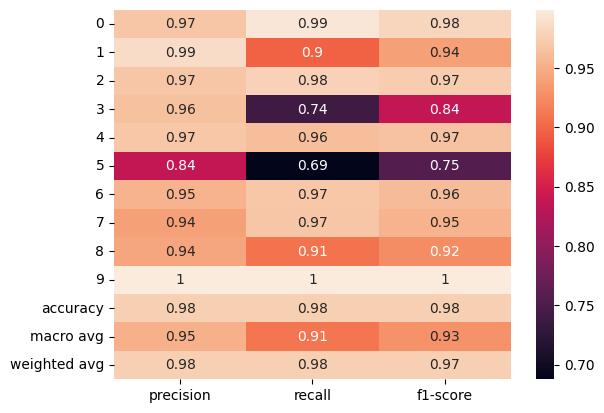

In [57]:
clf = LogisticRegression( C = 100, penalty = 'l2')
lr_3_folds_class_9 = folds(clf, X_train, class2_train, 3)

#### 5-folds

Classification report:
 {'0': {'precision': 0.9675397810956767, 'recall': 0.995158319966732, 'f1-score': 0.9811547303530377, 'support': 67332.0}, '1': {'precision': 0.9883733506381138, 'recall': 0.8953169393553444, 'f1-score': 0.9395465994962217, 'support': 20414.0}, '2': {'precision': 0.9691940955349775, 'recall': 0.9823436483598179, 'f1-score': 0.9757245707956433, 'support': 10761.0}, '3': {'precision': 0.9767441860465116, 'recall': 0.7730061349693251, 'f1-score': 0.863013698630137, 'support': 163.0}, '4': {'precision': 0.9736684619988031, 'recall': 0.9655786350148368, 'f1-score': 0.9696066746126342, 'support': 5055.0}, '5': {'precision': 0.8394366197183099, 'recall': 0.6636971046770601, 'f1-score': 0.7412935323383085, 'support': 449.0}, '6': {'precision': 0.9603821298117449, 'recall': 0.9649915302089215, 'f1-score': 0.9626813124911984, 'support': 3542.0}, '7': {'precision': 0.943558282208589, 'recall': 0.943558282208589, 'f1-score': 0.943558282208589, 'support': 815.0}, '8': {'preci

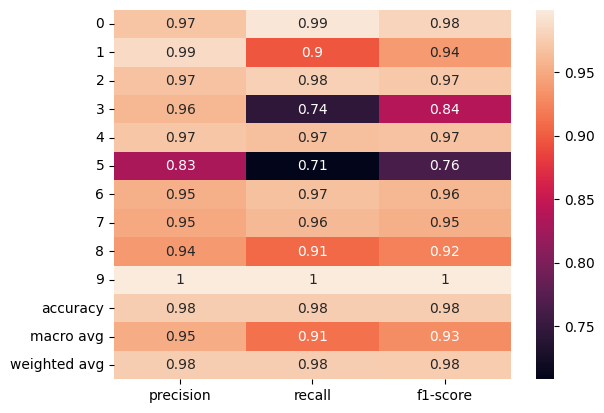

In [58]:
lr_5_folds_class_9 = folds(clf, X_train, class2_train, 5)

#### 7-folds

Classification report:
 {'0': {'precision': 0.9690272657294494, 'recall': 0.994635617008005, 'f1-score': 0.9816644606560573, 'support': 48095.0}, '1': {'precision': 0.9868807961999547, 'recall': 0.8976134960910712, 'f1-score': 0.9401328784341892, 'support': 14582.0}, '2': {'precision': 0.9704668558163528, 'recall': 0.9790528233151184, 'f1-score': 0.9747409326424871, 'support': 7686.0}, '3': {'precision': 0.9438202247191011, 'recall': 0.7241379310344828, 'f1-score': 0.8195121951219512, 'support': 116.0}, '4': {'precision': 0.9720357941834452, 'recall': 0.9626142342841318, 'f1-score': 0.9673020731876999, 'support': 3611.0}, '5': {'precision': 0.8327526132404182, 'recall': 0.7445482866043613, 'f1-score': 0.7861842105263157, 'support': 321.0}, '6': {'precision': 0.952639751552795, 'recall': 0.970344009489917, 'f1-score': 0.9614103819784525, 'support': 2529.0}, '7': {'precision': 0.9358552631578947, 'recall': 0.9759862778730704, 'f1-score': 0.9554995801847187, 'support': 583.0}, '8': {'prec

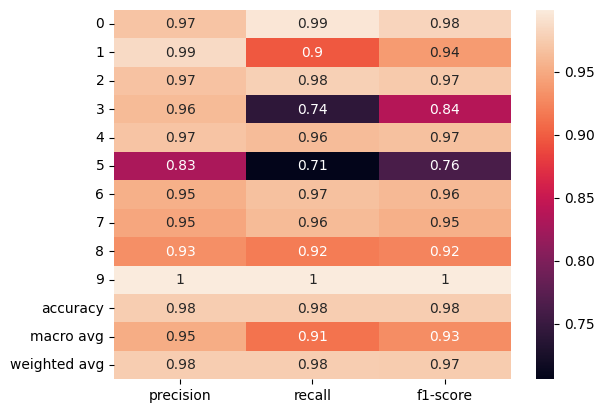

In [59]:
lr_7_folds_class_9 = folds(clf, X_train, class2_train, 7)

#### 10-folds

Classification report:
 {'0': {'precision': 0.9678556975198012, 'recall': 0.9945345452385196, 'f1-score': 0.9810137708760622, 'support': 33666.0}, '1': {'precision': 0.987977905339543, 'recall': 0.8937004016851181, 'f1-score': 0.938477366255144, 'support': 10207.0}, '2': {'precision': 0.9668619553277188, 'recall': 0.9815985130111524, 'f1-score': 0.9741745065486073, 'support': 5380.0}, '3': {'precision': 0.9473684210526315, 'recall': 0.6666666666666666, 'f1-score': 0.782608695652174, 'support': 81.0}, '4': {'precision': 0.9674085850556439, 'recall': 0.9628164556962026, 'f1-score': 0.9651070578905631, 'support': 2528.0}, '5': {'precision': 0.8217821782178217, 'recall': 0.7377777777777778, 'f1-score': 0.7775175644028103, 'support': 225.0}, '6': {'precision': 0.9563758389261745, 'recall': 0.9655561829474872, 'f1-score': 0.9609440854172521, 'support': 1771.0}, '7': {'precision': 0.9385342789598109, 'recall': 0.9730392156862745, 'f1-score': 0.9554753309265944, 'support': 408.0}, '8': {'preci

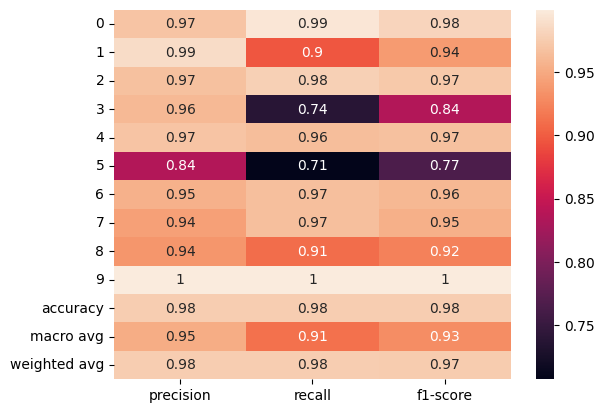

In [60]:
lr_10_folds_class_9 = folds(clf, X_train, class2_train, 10)

#### 14-folds

Classification report:
 {'0': {'precision': 0.9695507622445669, 'recall': 0.9943862275449101, 'f1-score': 0.9818114632944654, 'support': 24048.0}, '1': {'precision': 0.9858985898589859, 'recall': 0.9013852695103552, 'f1-score': 0.9417496596689834, 'support': 7291.0}, '2': {'precision': 0.9683641975308642, 'recall': 0.9797033567525371, 'f1-score': 0.9740007760962358, 'support': 3843.0}, '3': {'precision': 0.9772727272727273, 'recall': 0.7413793103448276, 'f1-score': 0.8431372549019609, 'support': 58.0}, '4': {'precision': 0.962757087270706, 'recall': 0.9590254706533776, 'f1-score': 0.9608876560332871, 'support': 1806.0}, '5': {'precision': 0.7575757575757576, 'recall': 0.6211180124223602, 'f1-score': 0.68259385665529, 'support': 161.0}, '6': {'precision': 0.9562157935887412, 'recall': 0.9675632911392406, 'f1-score': 0.9618560755013764, 'support': 1264.0}, '7': {'precision': 0.9417808219178082, 'recall': 0.9450171821305842, 'f1-score': 0.9433962264150942, 'support': 291.0}, '8': {'precis

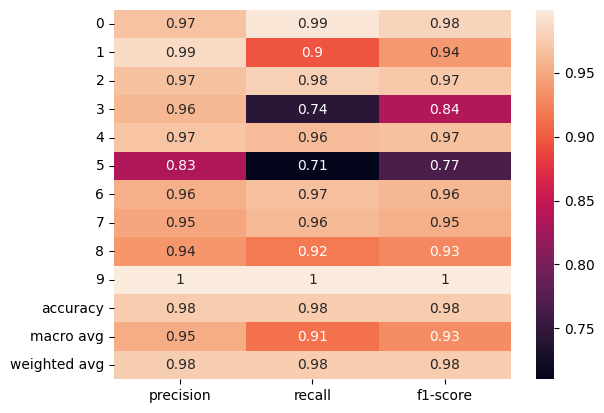

In [61]:
lr_14_folds_class_9 = folds(clf, X_train, class2_train, 14)

#### Folds

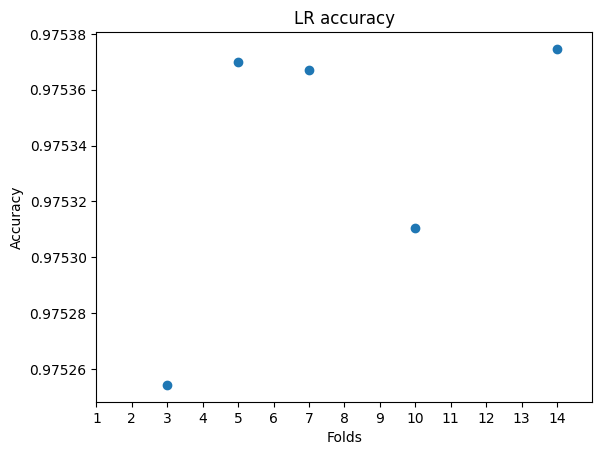

In [62]:
x = [3,5,7,10,14]
# corresponding y axis values
y = [lr_3_folds_class_9[3]["accuracy"], lr_5_folds_class_9[5]["accuracy"], lr_7_folds_class_9[7]["accuracy"], 
     lr_10_folds_class_9[10]["accuracy"], lr_14_folds_class_9[14]["accuracy"]]
 
# plotting the points 
plt.scatter(x, y, marker='o')
 
# naming the x axis
plt.xlabel("Folds")
plt.xlim(1,15)

dim=np.arange(1,15,1)
plt.xticks(dim)
# naming the y axis
plt.ylabel('Accuracy')
 
# giving a title to my graph
plt.title('LR accuracy')
 
# function to show the plot
plt.show()

### SVM

In [59]:
svc=svm.LinearSVC()

parameter_grid = {'C': [1, 10, 100],
              'loss': ['hinge','squared_hinge']}

grid_search = GridSearchCV(svc, param_grid = parameter_grid,
                          cv =StratifiedKFold(5), verbose = 3)

model = grid_search.fit(X_train, class2_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ...................C=1, loss=hinge;, score=0.977 total time=12.8min
[CV 2/5] END ...................C=1, loss=hinge;, score=0.977 total time=13.8min
[CV 3/5] END ...................C=1, loss=hinge;, score=0.977 total time=13.7min
[CV 4/5] END ...................C=1, loss=hinge;, score=0.977 total time=12.8min
[CV 5/5] END ...................C=1, loss=hinge;, score=0.977 total time=11.4min
[CV 1/5] END ...........C=1, loss=squared_hinge;, score=0.977 total time=16.8min
[CV 2/5] END ...........C=1, loss=squared_hinge;, score=0.977 total time=16.6min
[CV 3/5] END ...........C=1, loss=squared_hinge;, score=0.977 total time=15.0min
[CV 4/5] END ...........C=1, loss=squared_hinge;, score=0.977 total time=15.0min
[CV 5/5] END ...........C=1, loss=squared_hinge;, score=0.977 total time=15.1min
[CV 1/5] END ..................C=10, loss=hinge;, score=0.978 total time=17.3min
[CV 2/5] END ..................C=10, loss=hinge;,

In [53]:
svc=svm.LinearSVC(C = 10, loss = 'hinge', penalty ='l2')
svc.fit(X_train, class2_train)

LinearSVC(C=10, loss='hinge')


Model Accuracy:
 0.9784339788303009

Confusion matrix:
 [[83768    96    12     0    62   165     2    28     4    28]
 [ 2294 23018   161     2    34     6     0     0     0     3]
 [    4     0 13374     0     0     0    73     0     0     0]
 [    2    38     0   163     0     0     0     0     0     0]
 [  149   113     0    26  5992     6     0    34     0     0]
 [   78     0     0     0     0   484     0     0     0     0]
 [    9     2    45     0     0     0  4371     0     0     0]
 [    7     0     0     0    13     0     0   999     0     0]
 [   18     0     0     0     0     0     0     0    73     0]
 [   23     0     0     0     0     0     0     0     0 28229]]


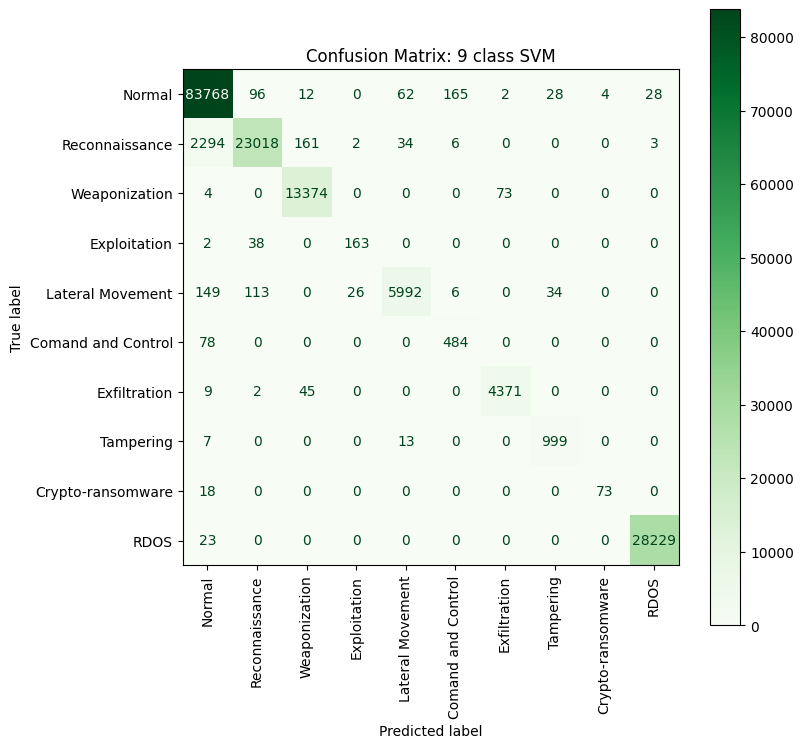


Classification report:
 {'0': {'precision': 0.9700759681304428, 'recall': 0.9952830749123746, 'f1-score': 0.9825178721183225, 'support': 84165.0}, '1': {'precision': 0.9892981475910088, 'recall': 0.9020299396504429, 'f1-score': 0.9436507123091115, 'support': 25518.0}, '2': {'precision': 0.9839611536197763, 'recall': 0.9942755185488068, 'f1-score': 0.9890914469548497, 'support': 13451.0}, '3': {'precision': 0.8534031413612565, 'recall': 0.8029556650246306, 'f1-score': 0.8274111675126904, 'support': 203.0}, '4': {'precision': 0.9821340763809212, 'recall': 0.9481012658227848, 'f1-score': 0.9648176475324047, 'support': 6320.0}, '5': {'precision': 0.7322239031770046, 'recall': 0.8612099644128114, 'f1-score': 0.7914963205233034, 'support': 562.0}, '6': {'precision': 0.9831309041835358, 'recall': 0.9873503501242377, 'f1-score': 0.9852361095458132, 'support': 4427.0}, '7': {'precision': 0.941564561734213, 'recall': 0.9803729146221786, 'f1-score': 0.9605769230769231, 'support': 1019.0}, '8': {

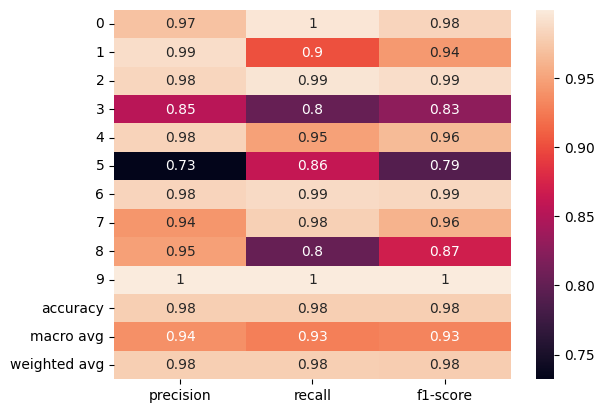

In [54]:
results_9_svm = eval_metrics(svc, X_test, class2_test, attacks_9, "Confusion Matrix: 9 class SVM")

#### 3-fols

In [63]:
svc=svm.LinearSVC(C = 10, loss = 'hinge', penalty ='l2')

Classification report:
 {'0': {'precision': 0.9697958900184923, 'recall': 0.9954018891463198, 'f1-score': 0.9824320699375119, 'support': 112220.0}, '1': {'precision': 0.9888433882565376, 'recall': 0.901334352221961, 'f1-score': 0.9430631794209451, 'support': 34024.0}, '2': {'precision': 0.9845914223730322, 'recall': 0.9868971285196543, 'f1-score': 0.9857429271552683, 'support': 17935.0}, '3': {'precision': 0.7748344370860927, 'recall': 0.8634686346863468, 'f1-score': 0.8167539267015705, 'support': 271.0}, '4': {'precision': 0.9798847050165583, 'recall': 0.9481367196771896, 'f1-score': 0.9637493214307256, 'support': 8426.0}, '5': {'precision': 0.7638724911452184, 'recall': 0.8638184245660881, 'f1-score': 0.8107769423558896, 'support': 749.0}, '6': {'precision': 0.9690704598081377, 'recall': 0.9925461629679824, 'f1-score': 0.9806678383128294, 'support': 5903.0}, '7': {'precision': 0.9624005784526392, 'recall': 0.9801178203240059, 'f1-score': 0.97117840204305, 'support': 1358.0}, '8': {'p

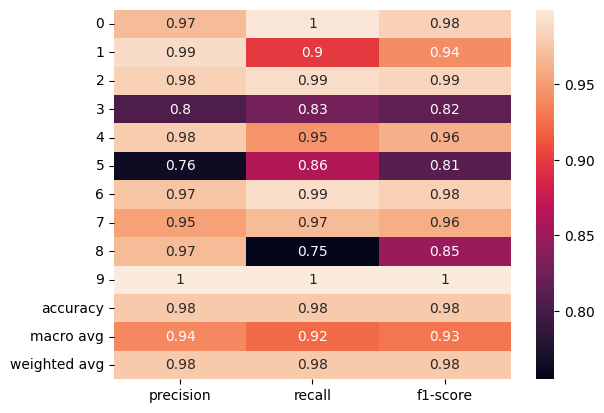

In [64]:
svm_3_folds_class_9 = folds(svc, X_train, class2_train, 3)

#### 5-folds

Classification report:
 {'0': {'precision': 0.9706316795551307, 'recall': 0.995455355551595, 'f1-score': 0.9828868065637234, 'support': 67332.0}, '1': {'precision': 0.986957451357708, 'recall': 0.9044773194866268, 'f1-score': 0.9439190225448596, 'support': 20414.0}, '2': {'precision': 0.9881904407662265, 'recall': 0.9875476256853453, 'f1-score': 0.9878689286544272, 'support': 10761.0}, '3': {'precision': 0.8311688311688312, 'recall': 0.7852760736196319, 'f1-score': 0.807570977917981, 'support': 163.0}, '4': {'precision': 0.9777278299959133, 'recall': 0.9465875370919882, 'f1-score': 0.9619057191677557, 'support': 5055.0}, '5': {'precision': 0.7737373737373737, 'recall': 0.8530066815144766, 'f1-score': 0.8114406779661018, 'support': 449.0}, '6': {'precision': 0.9656876200933296, 'recall': 0.9932241671372106, 'f1-score': 0.9792623521224773, 'support': 3542.0}, '7': {'precision': 0.9403508771929825, 'recall': 0.9865030674846625, 'f1-score': 0.962874251497006, 'support': 815.0}, '8': {'prec

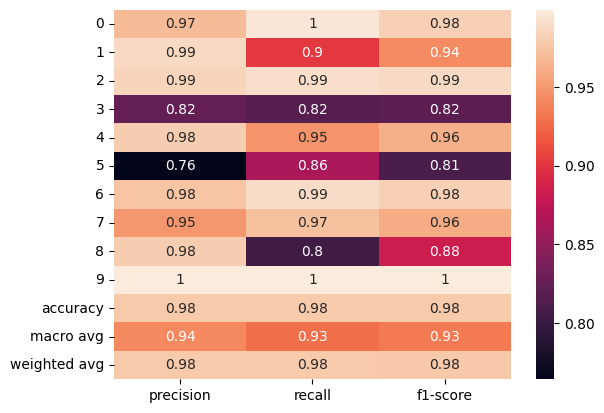

In [65]:
svm_5_folds_class_9 = folds(svc, X_train, class2_train, 5)

#### 7-folds

Classification report:
 {'0': {'precision': 0.9695293664782512, 'recall': 0.9950098762865163, 'f1-score': 0.9821043774498738, 'support': 48095.0}, '1': {'precision': 0.9889844575222574, 'recall': 0.8989164723631875, 'f1-score': 0.9418019830435408, 'support': 14582.0}, '2': {'precision': 0.9824855119124276, 'recall': 0.992583918813427, 'f1-score': 0.987508899100382, 'support': 7686.0}, '3': {'precision': 0.8188976377952756, 'recall': 0.896551724137931, 'f1-score': 0.8559670781893004, 'support': 116.0}, '4': {'precision': 0.9810725552050473, 'recall': 0.9473829963998892, 'f1-score': 0.9639335023950408, 'support': 3611.0}, '5': {'precision': 0.7194805194805195, 'recall': 0.8629283489096573, 'f1-score': 0.7847025495750709, 'support': 321.0}, '6': {'precision': 0.976953125, 'recall': 0.988928430209569, 'f1-score': 0.9829043033994891, 'support': 2529.0}, '7': {'precision': 0.943801652892562, 'recall': 0.9794168096054888, 'f1-score': 0.9612794612794613, 'support': 583.0}, '8': {'precision': 1

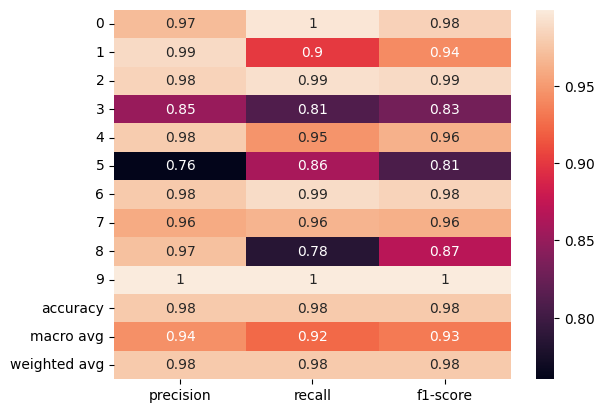

In [66]:
svm_7_folds_class_9 = folds(svc, X_train, class2_train, 7)

#### 10-folds

Classification report:
 {'0': {'precision': 0.9683860713769686, 'recall': 0.9953959484346224, 'f1-score': 0.9817052628495261, 'support': 33666.0}, '1': {'precision': 0.9896081402901061, 'recall': 0.8956598412853923, 'f1-score': 0.9402931344818719, 'support': 10207.0}, '2': {'precision': 0.9825046040515654, 'recall': 0.991635687732342, 'f1-score': 0.9870490286771507, 'support': 5380.0}, '3': {'precision': 0.825, 'recall': 0.8148148148148148, 'f1-score': 0.8198757763975155, 'support': 81.0}, '4': {'precision': 0.9807613589848547, 'recall': 0.9477848101265823, 'f1-score': 0.963991148662241, 'support': 2528.0}, '5': {'precision': 0.7433962264150943, 'recall': 0.8755555555555555, 'f1-score': 0.8040816326530612, 'support': 225.0}, '6': {'precision': 0.9755962285080422, 'recall': 0.9932241671372106, 'f1-score': 0.9843312814773363, 'support': 1771.0}, '7': {'precision': 0.9541062801932367, 'recall': 0.9681372549019608, 'f1-score': 0.9610705596107056, 'support': 408.0}, '8': {'precision': 1.0, 

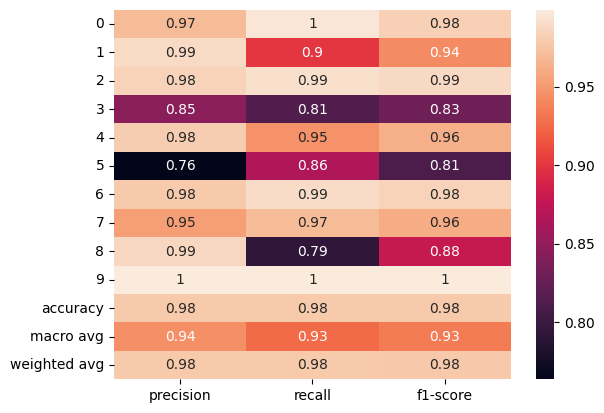

In [67]:
svm_10_folds_class_9 = folds(svc, X_train, class2_train, 10)

#### 14-folds

Classification report:
 {'0': {'precision': 0.9692208002591932, 'recall': 0.9951763140385895, 'f1-score': 0.982027082478457, 'support': 24048.0}, '1': {'precision': 0.9896037366279946, 'recall': 0.9008366479220957, 'f1-score': 0.9431361286616887, 'support': 7291.0}, '2': {'precision': 0.9850553980932749, 'recall': 0.9947957325006506, 'f1-score': 0.9899016053858105, 'support': 3843.0}, '3': {'precision': 0.9, 'recall': 0.7758620689655172, 'f1-score': 0.8333333333333334, 'support': 58.0}, '4': {'precision': 0.9834474885844748, 'recall': 0.9540420819490587, 'f1-score': 0.968521641371557, 'support': 1806.0}, '5': {'precision': 0.7015706806282722, 'recall': 0.8322981366459627, 'f1-score': 0.7613636363636362, 'support': 161.0}, '6': {'precision': 0.9842271293375394, 'recall': 0.9873417721518988, 'f1-score': 0.985781990521327, 'support': 1264.0}, '7': {'precision': 0.9860627177700348, 'recall': 0.9725085910652921, 'f1-score': 0.9792387543252595, 'support': 291.0}, '8': {'precision': 0.9615384

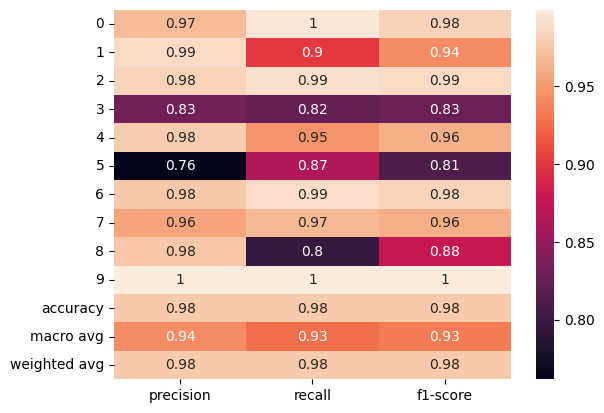

In [70]:
svm_14_folds_class_9 = folds(svc, X_train, class2_train, 14)

#### Folds

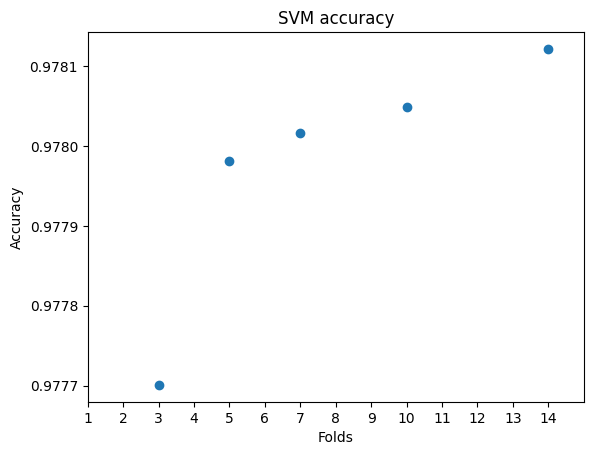

In [71]:
x = [3,5,7,10,14]
# corresponding y axis values
y = [svm_3_folds_class_9[3]["accuracy"], svm_5_folds_class_9[5]["accuracy"], svm_7_folds_class_9[7]["accuracy"], 
     svm_10_folds_class_9[10]["accuracy"], svm_14_folds_class_9[14]["accuracy"]]
 
# plotting the points 
plt.scatter(x, y, marker='o')
 
# naming the x axis
plt.xlabel("Folds")
plt.xlim(1,15)

dim=np.arange(1,15,1)
plt.xticks(dim)
# naming the y axis
plt.ylabel('Accuracy')
 
# giving a title to my graph
plt.title('SVM accuracy')
 
# function to show the plot
plt.show()

### NB

In [50]:
gnb_clf = GaussianNB()

parameter_grid = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
                 }

grid_search = GridSearchCV(gnb_clf, param_grid = parameter_grid, 
                          cv =StratifiedKFold(7), verbose = 3)

model = grid_search.fit(X_train, class2_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 7 folds for each of 14 candidates, totalling 98 fits
[CV 1/7] END ................var_smoothing=0.01;, score=0.558 total time=   3.0s
[CV 2/7] END ................var_smoothing=0.01;, score=0.558 total time=   2.9s


KeyboardInterrupt: 

In [55]:
gnb = GaussianNB(var_smoothing= 0.01)
gnb.fit(X_train, class2_train)

GaussianNB(var_smoothing=0.01)


Model Accuracy:
 0.5540766304082728

Confusion matrix:
 [[22843  8200   928    78 19801 30792   907    92   147   377]
 [  325 18699  2784  1572    28  1943     0     0   139    28]
 [   10     2 10873     0     1     0  2557     1     7     0]
 [    0    26     0   176     1     0     0     0     0     0]
 [    6   976     5   133  4134     1     0   986    79     0]
 [    1     0     0     0     0   561     0     0     0     0]
 [    4     3   123     2     1     1  4293     0     0     0]
 [    1     0     0     0     4     0     0  1013     1     0]
 [    0     0     0     0     0     0     0     0    91     0]
 [    1     0     0     0     0    61     0     0     0 28190]]


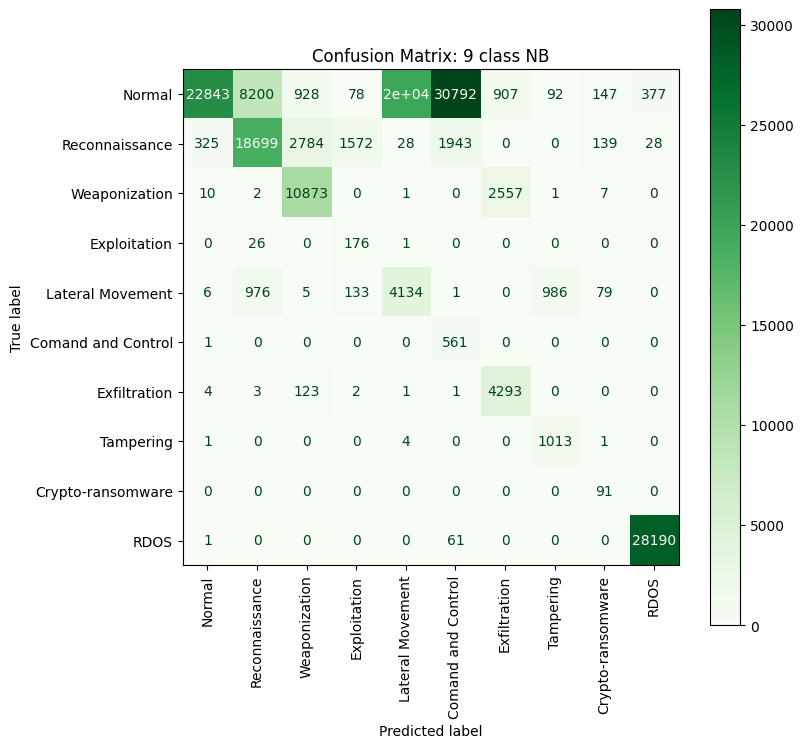


Classification report:
 {'0': {'precision': 0.9849941787762494, 'recall': 0.27140735460108123, 'f1-score': 0.4255560937441783, 'support': 84165.0}, '1': {'precision': 0.6700709524833369, 'recall': 0.7327768633905478, 'f1-score': 0.7000224618149146, 'support': 25518.0}, '2': {'precision': 0.7390063209406648, 'recall': 0.808341387257453, 'f1-score': 0.7721204374378638, 'support': 13451.0}, '3': {'precision': 0.08975012748597654, 'recall': 0.8669950738916257, 'f1-score': 0.16266173752310534, 'support': 203.0}, '4': {'precision': 0.17246558197747183, 'recall': 0.654113924050633, 'f1-score': 0.2729613733905579, 'support': 6320.0}, '5': {'precision': 0.01681705087082946, 'recall': 0.998220640569395, 'f1-score': 0.033076855045547006, 'support': 562.0}, '6': {'precision': 0.5534356065489235, 'recall': 0.96973119494014, 'f1-score': 0.7046946815495733, 'support': 4427.0}, '7': {'precision': 0.48422562141491393, 'recall': 0.9941118743866536, 'f1-score': 0.6512375441980071, 'support': 1019.0}, '8

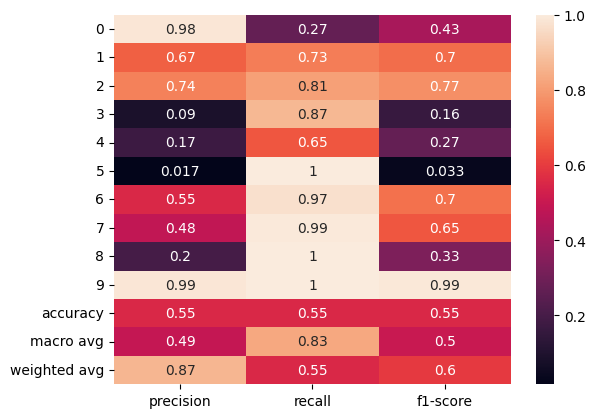

In [56]:
results_9_nb = eval_metrics(gnb, X_test , class2_test, attacks_9, "Confusion Matrix: 9 class NB")

#### 3-fold

In [72]:
gnb = GaussianNB(var_smoothing= 0.01)

Classification report:
 {'0': {'precision': 0.9857100874292851, 'recall': 0.23911067545891998, 'f1-score': 0.3848625234864675, 'support': 112220.0}, '1': {'precision': 0.6447102911501874, 'recall': 0.7887961438984247, 'f1-score': 0.7095119758895997, 'support': 34024.0}, '2': {'precision': 0.7154447558636967, 'recall': 0.8112628937831057, 'f1-score': 0.7603469899665553, 'support': 17935.0}, '3': {'precision': 0.219959266802444, 'recall': 0.7970479704797048, 'f1-score': 0.34477254588986433, 'support': 271.0}, '4': {'precision': 0.17422271367243397, 'recall': 0.6357702349869452, 'f1-score': 0.2734977280849543, 'support': 8426.0}, '5': {'precision': 0.01630553254566857, 'recall': 0.9986648865153538, 'f1-score': 0.032087167277952945, 'support': 749.0}, '6': {'precision': 0.5433266456482277, 'recall': 0.9634084363882771, 'f1-score': 0.6948075748320097, 'support': 5903.0}, '7': {'precision': 0.46958637469586373, 'recall': 0.9948453608247423, 'f1-score': 0.6380165289256198, 'support': 1358.0},

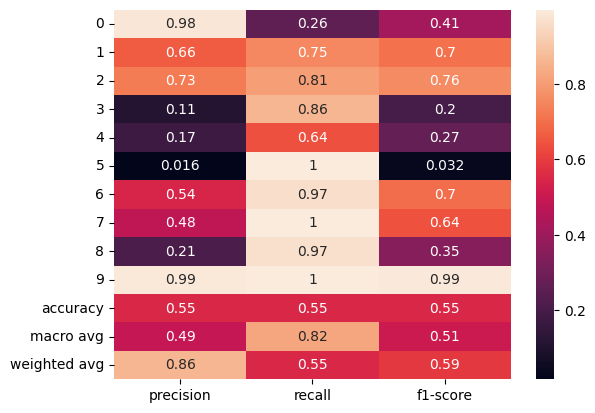

In [73]:
nb_3_folds_class_9 = folds(gnb, X_train, class2_train, 3)

#### 5-folds

Classification report:
 {'0': {'precision': 0.9855334538878843, 'recall': 0.25901503000059406, 'f1-score': 0.4102178106035658, 'support': 67332.0}, '1': {'precision': 0.6583478188891648, 'recall': 0.7792201430390908, 'f1-score': 0.7137024407753051, 'support': 20414.0}, '2': {'precision': 0.7274334792859549, 'recall': 0.8028064306291237, 'f1-score': 0.7632636833502673, 'support': 10761.0}, '3': {'precision': 0.207492795389049, 'recall': 0.8834355828220859, 'f1-score': 0.33605600933488916, 'support': 163.0}, '4': {'precision': 0.17459634015069966, 'recall': 0.6417408506429277, 'f1-score': 0.27450814470065577, 'support': 5055.0}, '5': {'precision': 0.01655152030147412, 'recall': 0.9977728285077951, 'f1-score': 0.032562872510539326, 'support': 449.0}, '6': {'precision': 0.5466602748481943, 'recall': 0.9658385093167702, 'f1-score': 0.6981632653061226, 'support': 3542.0}, '7': {'precision': 0.4693995381062356, 'recall': 0.9975460122699387, 'f1-score': 0.6383981154299175, 'support': 815.0}, '

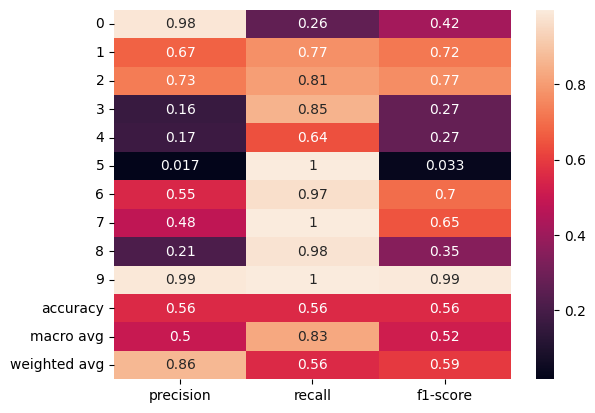

In [74]:
nb_5_folds_class_9 = folds(gnb, X_train, class2_train, 5)

#### 7-folds

Classification report:
 {'0': {'precision': 0.9854640327991054, 'recall': 0.27487264788439547, 'f1-score': 0.42984880507234596, 'support': 48095.0}, '1': {'precision': 0.6689810350369656, 'recall': 0.713619530928542, 'f1-score': 0.6905796861001426, 'support': 14582.0}, '2': {'precision': 0.7375937165298108, 'recall': 0.8064012490241999, 'f1-score': 0.7704642923736714, 'support': 7686.0}, '3': {'precision': 0.07415254237288135, 'recall': 0.9051724137931034, 'f1-score': 0.1370757180156658, 'support': 116.0}, '4': {'precision': 0.1710487876132048, 'recall': 0.648573802270839, 'f1-score': 0.2707045021094608, 'support': 3611.0}, '5': {'precision': 0.016871408235356145, 'recall': 0.9968847352024922, 'f1-score': 0.03318125259228536, 'support': 321.0}, '6': {'precision': 0.5437388987566607, 'recall': 0.9683669434559115, 'f1-score': 0.6964311104791696, 'support': 2529.0}, '7': {'precision': 0.4829592684954281, 'recall': 0.9965694682675815, 'f1-score': 0.6506159014557671, 'support': 583.0}, '8':

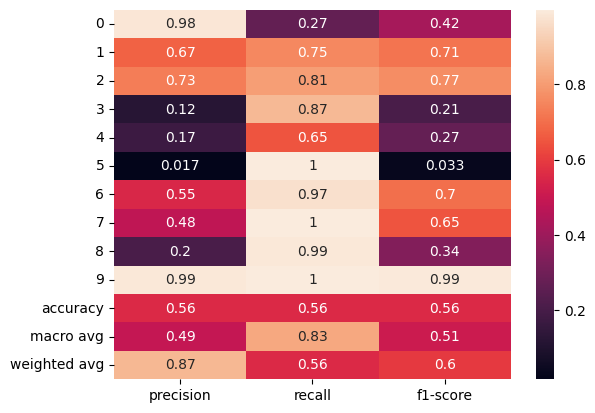

In [75]:
nb_7_folds_class_9 = folds(gnb, X_train, class2_train, 7)

#### 10-folds

Classification report:
 {'0': {'precision': 0.9809312638580931, 'recall': 0.26281708548684135, 'f1-score': 0.4145621515250903, 'support': 33666.0}, '1': {'precision': 0.6671762208067941, 'recall': 0.7696678749877535, 'f1-score': 0.7147666272404694, 'support': 10207.0}, '2': {'precision': 0.7326354270521768, 'recall': 0.8195167286245353, 'f1-score': 0.7736444990349185, 'support': 5380.0}, '3': {'precision': 0.14855875831485588, 'recall': 0.8271604938271605, 'f1-score': 0.2518796992481203, 'support': 81.0}, '4': {'precision': 0.167028873020801, 'recall': 0.6384493670886076, 'f1-score': 0.2647854974981544, 'support': 2528.0}, '5': {'precision': 0.016937618147448014, 'recall': 0.9955555555555555, 'f1-score': 0.0333085501858736, 'support': 225.0}, '6': {'precision': 0.5613114754098361, 'recall': 0.9666854884246189, 'f1-score': 0.7102260941713339, 'support': 1771.0}, '7': {'precision': 0.4822274881516588, 'recall': 0.9975490196078431, 'f1-score': 0.6501597444089456, 'support': 408.0}, '8': {

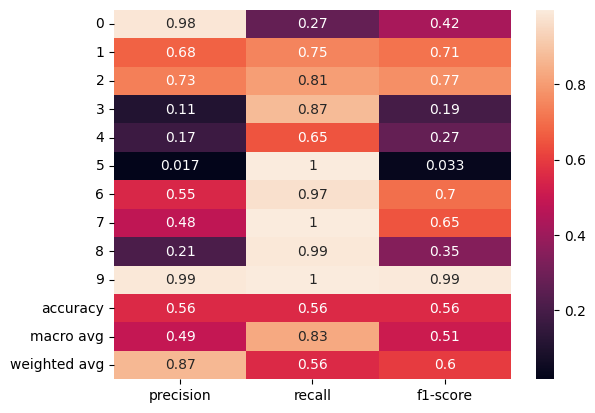

In [76]:
nb_10_folds_class_9 = folds(gnb, X_train, class2_train, 10)

#### 14-folds

Classification report:
 {'0': {'precision': 0.9862558525902432, 'recall': 0.27154025282767796, 'f1-score': 0.42583716456356574, 'support': 24048.0}, '1': {'precision': 0.6810925417809928, 'recall': 0.7490056233712796, 'f1-score': 0.7134365405970344, 'support': 7291.0}, '2': {'precision': 0.7283142389525368, 'recall': 0.8105646630236795, 'f1-score': 0.7672413793103448, 'support': 3843.0}, '3': {'precision': 0.10550458715596331, 'recall': 0.7931034482758621, 'f1-score': 0.1862348178137652, 'support': 58.0}, '4': {'precision': 0.1688953488372093, 'recall': 0.6434108527131783, 'f1-score': 0.2675569882569652, 'support': 1806.0}, '5': {'precision': 0.01694915254237288, 'recall': 1.0, 'f1-score': 0.03333333333333333, 'support': 161.0}, '6': {'precision': 0.549683830171635, 'recall': 0.9628164556962026, 'f1-score': 0.6998274870615296, 'support': 1264.0}, '7': {'precision': 0.4588607594936709, 'recall': 0.9965635738831615, 'f1-score': 0.628385698808234, 'support': 291.0}, '8': {'precision': 0.1

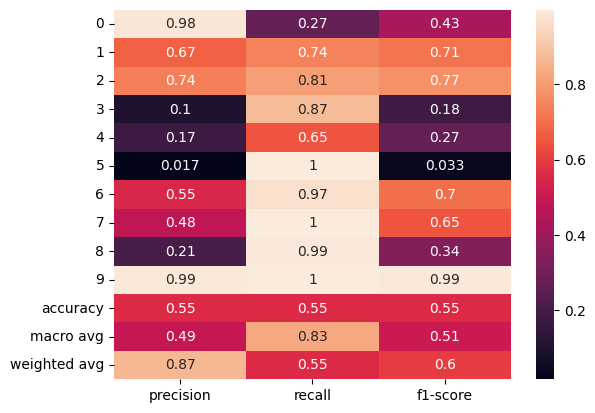

In [77]:
nb_14_folds_class_9 = folds(gnb, X_train, class2_train, 14)

#### Folds

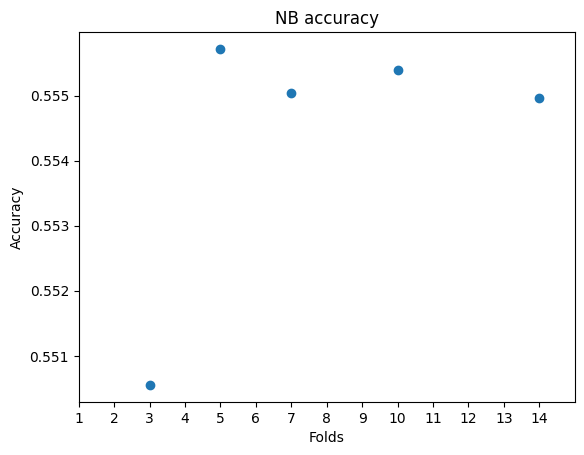

In [78]:
x = [3,5,7,10,14]
# corresponding y axis values
y = [nb_3_folds_class_9[3]["accuracy"], nb_5_folds_class_9[5]["accuracy"], nb_7_folds_class_9[7]["accuracy"], 
     nb_10_folds_class_9[10]["accuracy"], nb_14_folds_class_9[14]["accuracy"]]
 
# plotting the points 
plt.scatter(x, y, marker='o')
 
# naming the x axis
plt.xlabel("Folds")
plt.xlim(1,15)

dim=np.arange(1,15,1)
plt.xticks(dim)
# naming the y axis
plt.ylabel('Accuracy')
 
# giving a title to my graph
plt.title('NB accuracy')
 
# function to show the plot
plt.show()

### XGBoost

In [49]:
xgb_model = xgb.XGBClassifier()

params = { 
    'model__max_depth': [3,4,5],
    'model__learning_rate': [ 0.01, 0.1, 1 ],
    'model__gamma' :[0, 0.25, 0.5, 0.75, 1],
    'model__n_estimators': [50 ,100, 300, 500],
    #"model__subsample":[0.9],
    #"model__colsample_bytree":[0.5],
    #"model__early_stopping_rounds": [10], 
}


grid_search = GridSearchCV(xgb_model, param_grid = params, cv =StratifiedKFold(5), verbose = 3,error_score="raise")
model = grid_search.fit(X_train, class2_train)
print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END model__gamma=0, model__learning_rate=0.01, model__n_estimators=50;, score=0.997 total time=  30.0s
[CV 2/5] END model__gamma=0, model__learning_rate=0.01, model__n_estimators=50;, score=0.997 total time= 2.6min
[CV 3/5] END model__gamma=0, model__learning_rate=0.01, model__n_estimators=50;, score=0.997 total time= 3.0min
[CV 4/5] END model__gamma=0, model__learning_rate=0.01, model__n_estimators=50;, score=0.997 total time= 2.0min
[CV 5/5] END model__gamma=0, model__learning_rate=0.01, model__n_estimators=50;, score=0.997 total time= 2.5min
[CV 1/5] END model__gamma=0, model__learning_rate=0.01, model__n_estimators=100;, score=0.997 total time= 2.9min
[CV 2/5] END model__gamma=0, model__learning_rate=0.01, model__n_estimators=100;, score=0.997 total time= 2.7min
[CV 3/5] END model__gamma=0, model__learning_rate=0.01, model__n_estimators=100;, score=0.997 total time= 3.5min
[CV 4/5] END model__gamma=0, model__lea

KeyboardInterrupt: 

In [68]:
xgb_model_9 = xgb.XGBClassifier(model__gamma = 0 ,model__learning_rate = 0.01, model_max_depth = 3 , model_n_estimators = 50)
xgb_model_9.fit(X_train, class2_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, model__gamma=0,
              model__learning_rate=0.01, model_max_depth=3,
              model_n_estimators=50, monotone_constraints=None,
              multi_strategy=None, ...)


Model Accuracy:
 0.9991540033931323

Confusion matrix:
 [[336516    142      0      0      2      0      0      0      0      0]
 [   374 101698      0      0      0      0      0      0      0      0]
 [     0      0  53805      0      0      0      0      0      0      0]
 [     0      0      0    813      0      0      0      0      0      0]
 [    36      0      0      0  25239      0      0      1      0      0]
 [     0      0      0      0      0   2247      0      0      0      0]
 [     0      0      0      0      0      0  17707      0      0      0]
 [     0      0      0      0      0      0      0   4075      0      0]
 [     0      0      0      0      0      0      0      0    367      0]
 [     0      0      0      0      0      0      0      0      0 113009]]


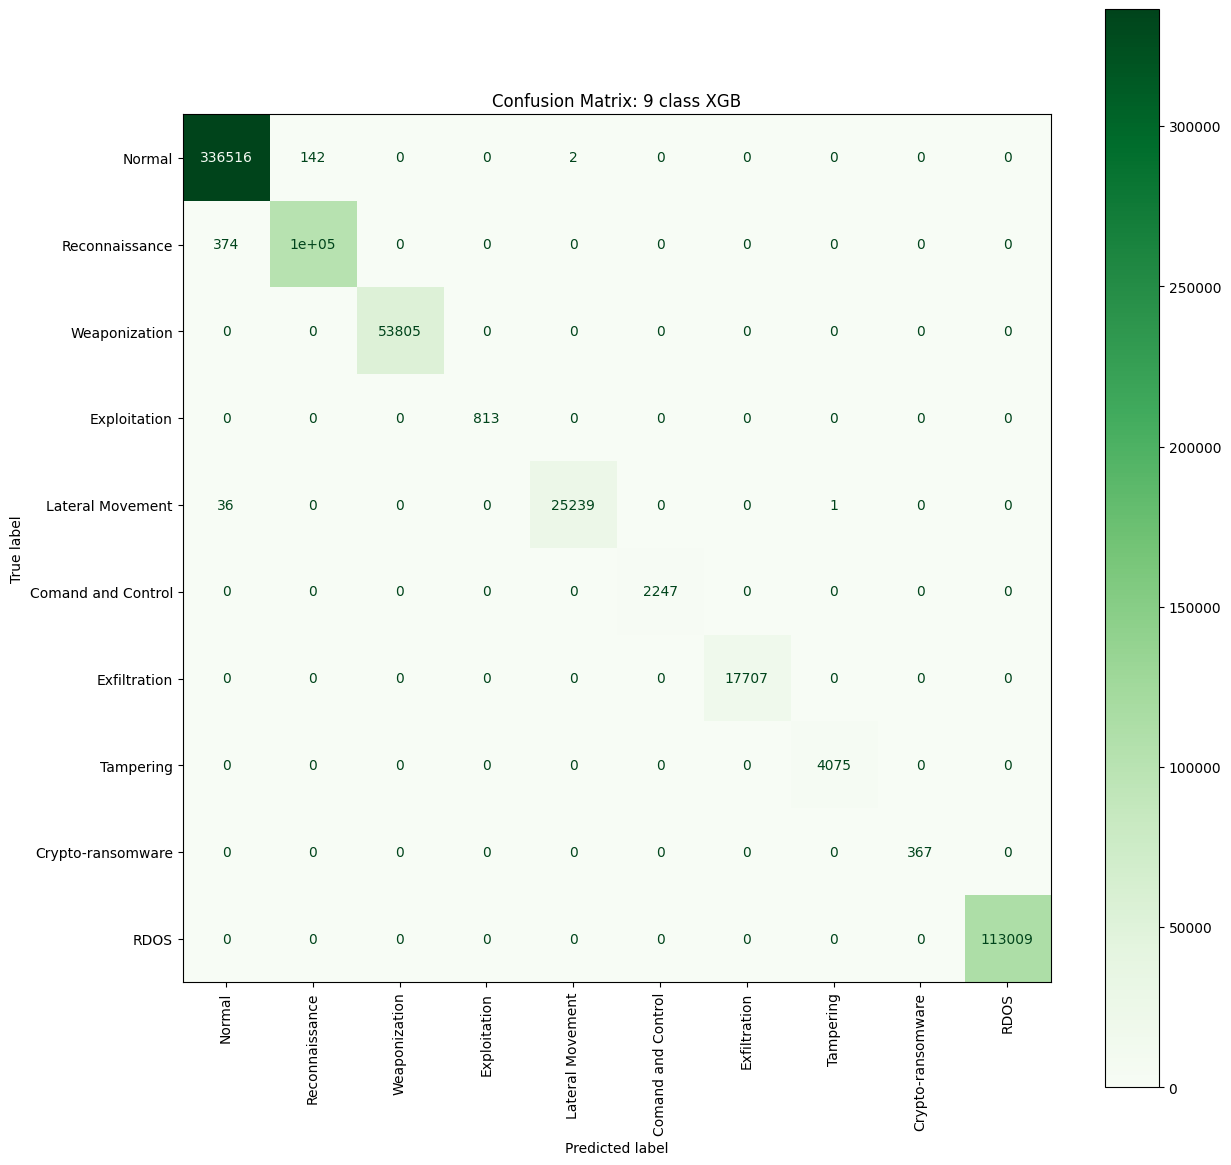


Classification report:
 {'0': {'precision': 0.9987831155802758, 'recall': 0.9995722687577971, 'f1-score': 0.999177536350221, 'support': 336660.0}, '1': {'precision': 0.9986056559308719, 'recall': 0.9963359197429266, 'f1-score': 0.9974694966456119, 'support': 102072.0}, '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 53805.0}, '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 813.0}, '4': {'precision': 0.999920763836615, 'recall': 0.9985361607849343, 'f1-score': 0.9992279826593028, 'support': 25276.0}, '5': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2247.0}, '6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 17707.0}, '7': {'precision': 0.9997546614327772, 'recall': 1.0, 'f1-score': 0.9998773156667894, 'support': 4075.0}, '8': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 367.0}, '9': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 113009.0}, 'accuracy': 0.9991540033931323, 'macro avg':

{'0': {'precision': 0.9987831155802758,
  'recall': 0.9995722687577971,
  'f1-score': 0.999177536350221,
  'support': 336660.0},
 '1': {'precision': 0.9986056559308719,
  'recall': 0.9963359197429266,
  'f1-score': 0.9974694966456119,
  'support': 102072.0},
 '2': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 53805.0},
 '3': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 813.0},
 '4': {'precision': 0.999920763836615,
  'recall': 0.9985361607849343,
  'f1-score': 0.9992279826593028,
  'support': 25276.0},
 '5': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2247.0},
 '6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 17707.0},
 '7': {'precision': 0.9997546614327772,
  'recall': 1.0,
  'f1-score': 0.9998773156667894,
  'support': 4075.0},
 '8': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 367.0},
 '9': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 113009.0},
 'accuracy': 0.9991540033931323,
 'm

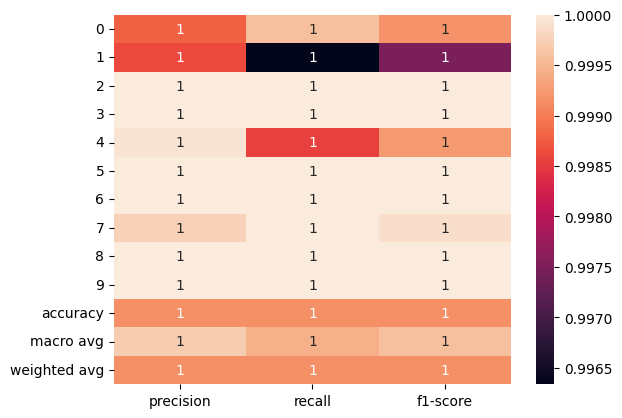

In [54]:
eval_metrics(xgb_model_9, X_train , class2_train, attacks_9, "Confusion Matrix: 9 class XGB")


Model Accuracy:
 0.9974879274181747

Confusion matrix:
 [[84050    73     0     2    22    15     0     3     0     0]
 [  163 25354     0     0     0     1     0     0     0     0]
 [    1     0 13446     0     0     0     4     0     0     0]
 [    1     4     0   198     0     0     0     0     0     0]
 [   79     2     0     0  6238     0     0     1     0     0]
 [   30     0     0     0     0   532     0     0     0     0]
 [    1     1     1     0     0     0  4424     0     0     0]
 [    2     0     0     0     4     0     0  1013     0     0]
 [    1     0     0     0     0     0     0     0    90     0]
 [    1     0     0     0     0     0     0     0     0 28251]]


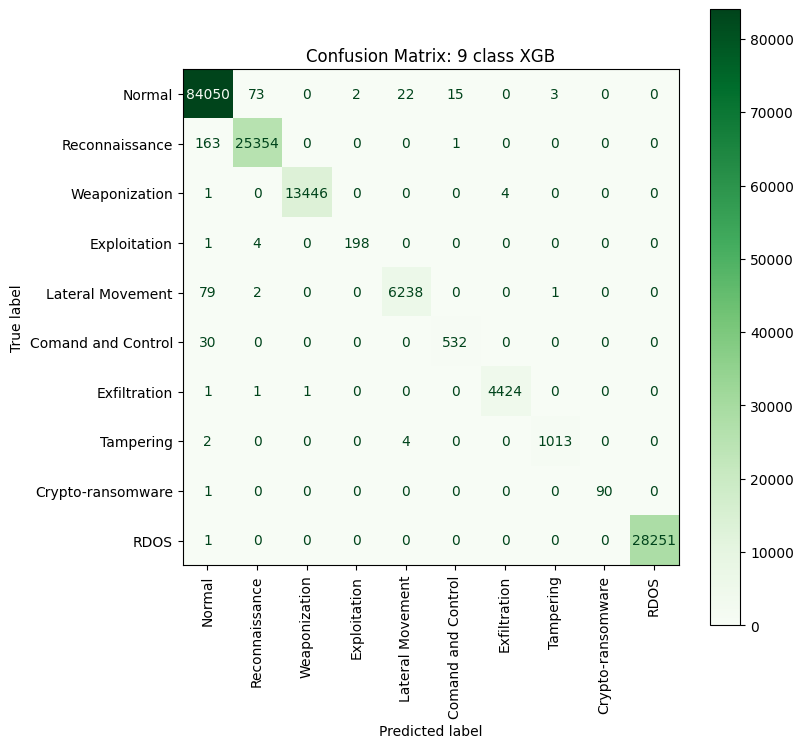


Classification report:
 {'0': {'precision': 0.996691529604288, 'recall': 0.9986336363096299, 'f1-score': 0.9976616378031264, 'support': 84165.0}, '1': {'precision': 0.9968546040732877, 'recall': 0.9935731640410691, 'f1-score': 0.995211179149003, 'support': 25518.0}, '2': {'precision': 0.9999256339704023, 'recall': 0.9996282804252472, 'f1-score': 0.9997769350881106, 'support': 13451.0}, '3': {'precision': 0.99, 'recall': 0.9753694581280788, 'f1-score': 0.9826302729528535, 'support': 203.0}, '4': {'precision': 0.9958492975734355, 'recall': 0.9870253164556962, 'f1-score': 0.9914176732358551, 'support': 6320.0}, '5': {'precision': 0.9708029197080292, 'recall': 0.9466192170818505, 'f1-score': 0.9585585585585585, 'support': 562.0}, '6': {'precision': 0.999096657633243, 'recall': 0.999322340185227, 'f1-score': 0.9992094861660079, 'support': 4427.0}, '7': {'precision': 0.9960668633235005, 'recall': 0.9941118743866536, 'f1-score': 0.9950884086444007, 'support': 1019.0}, '8': {'precision': 1.0,

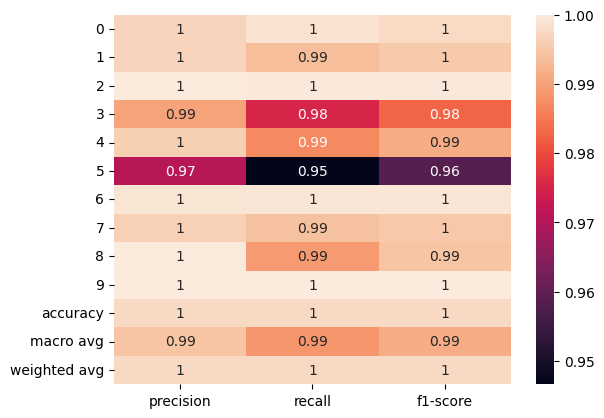

In [69]:
results_9_xgb = eval_metrics(xgb_model_9, X_test , class2_test, attacks_9, "Confusion Matrix: 9 class XGB")

#### 3-folds


Classification report:
 {'0': {'precision': 0.9963010714444493, 'recall': 0.9984762074496525, 'f1-score': 0.9973874535460756, 'support': 112220.0}, '1': {'precision': 0.9964302572574935, 'recall': 0.9926816364918881, 'f1-score': 0.9945524146054181, 'support': 34024.0}, '2': {'precision': 0.9997769848349688, 'recall': 0.9998327293002509, 'f1-score': 0.9998048562905969, 'support': 17935.0}, '3': {'precision': 0.9737827715355806, 'recall': 0.959409594095941, 'f1-score': 0.966542750929368, 'support': 271.0}, '4': {'precision': 0.996398991717681, 'recall': 0.9851649655827202, 'f1-score': 0.9907501342722445, 'support': 8426.0}, '5': {'precision': 0.9697386519944979, 'recall': 0.9412550066755674, 'f1-score': 0.9552845528455284, 'support': 749.0}, '6': {'precision': 0.9998305371970853, 'recall': 0.9994917838387261, 'f1-score': 0.999661131819722, 'support': 5903.0}, '7': {'precision': 0.9912023460410557, 'recall': 0.9955817378497791, 'f1-score': 0.9933872152828802, 'support': 1358.0}, '8': {'pr

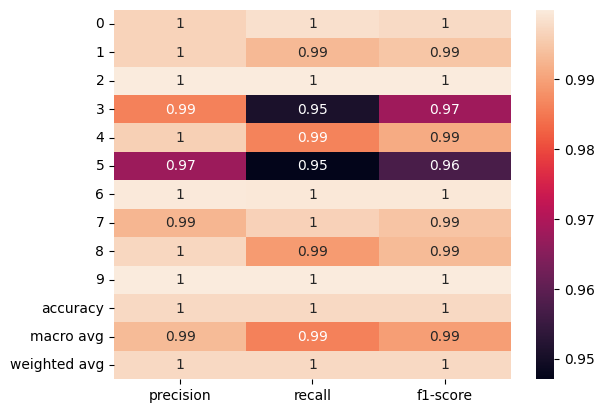

In [132]:
from sklearn.metrics import  accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score

xgb_model_9 = xgb.XGBClassifier(model__gamma = 0 ,model__learning_rate = 0.01, model_max_depth = 3 , model_n_estimators = 50)

# Variables for average classification report
originalclass = []
predictedclass = []
xgb_9_classification_3_fold = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    classification_fold =  metrics.classification_report(y_true, y_pred, output_dict=True) # print classification report
    xgb_9_classification_3_fold.append(classification_fold)
    #sns.heatmap(pd.DataFrame(classification_fold).iloc[:-1, :].T, annot=True)
    print("Classification report:" "\n", classification_fold)
    return accuracy_score(y_true, y_pred) # return accuracy score

nested_score = cross_val_score(xgb_model_9, X=X_train, y=class2_train, cv=StratifiedKFold(3, shuffle=True), 
               scoring=make_scorer(classification_report_with_accuracy_score))

print ("Classification report:" "\n", nested_score)

xgb_9_classification_3_fold_mean = metrics.classification_report(originalclass, predictedclass, output_dict=True)

print("Classification report mean:" "\n", xgb_9_classification_3_fold_mean)

sns.heatmap(pd.DataFrame(xgb_9_classification_3_fold_mean).iloc[:-1, :].T, annot=True)

xgb_9_classification_3_fold.append(xgb_9_classification_3_fold_mean)

#### 5-folds

Classification report:
 {'0': {'precision': 0.9968866749688667, 'recall': 0.9986633398681162, 'f1-score': 0.9977742165242165, 'support': 67332.0}, '1': {'precision': 0.9966118340289712, 'recall': 0.9942196531791907, 'f1-score': 0.9954143063831874, 'support': 20414.0}, '2': {'precision': 0.9998140918386317, 'recall': 0.9995353591673636, 'f1-score': 0.9996747060737022, 'support': 10761.0}, '3': {'precision': 0.9873417721518988, 'recall': 0.9570552147239264, 'f1-score': 0.9719626168224299, 'support': 163.0}, '4': {'precision': 0.998, 'recall': 0.9869462025316456, 'f1-score': 0.992442322991249, 'support': 5056.0}, '5': {'precision': 0.9619686800894854, 'recall': 0.9576837416481069, 'f1-score': 0.9598214285714285, 'support': 449.0}, '6': {'precision': 0.9988713318284425, 'recall': 0.9994353472614342, 'f1-score': 0.9991532599491956, 'support': 3542.0}, '7': {'precision': 0.998766954377312, 'recall': 0.9938650306748467, 'f1-score': 0.996309963099631, 'support': 815.0}, '8': {'precision': 1.0,

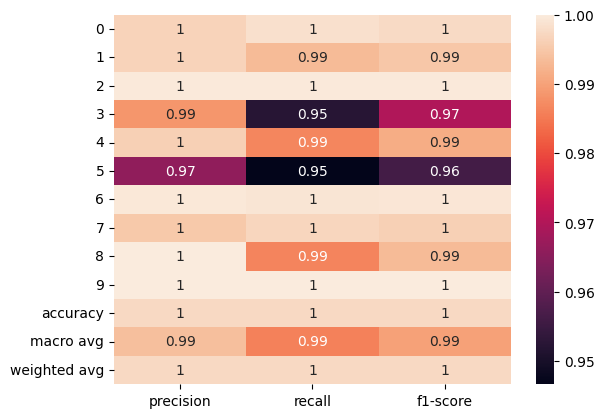

In [133]:
from sklearn.metrics import  accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score

xgb_model_9 = xgb.XGBClassifier(model__gamma = 0 ,model__learning_rate = 0.01, model_max_depth = 3 , model_n_estimators = 50)

# Variables for average classification report
originalclass = []
predictedclass = []
xgb_9_classification_5_fold = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    classification_fold =  metrics.classification_report(y_true, y_pred, output_dict=True) # print classification report
    xgb_9_classification_5_fold.append(classification_fold)
    #sns.heatmap(pd.DataFrame(classification_fold).iloc[:-1, :].T, annot=True)
    print("Classification report:" "\n", classification_fold)
    return accuracy_score(y_true, y_pred) # return accuracy score

nested_score = cross_val_score(xgb_model_9, X=X_train, y=class2_train, cv=StratifiedKFold(5, shuffle=True), 
               scoring=make_scorer(classification_report_with_accuracy_score))

print ("Classification report:" "\n", nested_score)

xgb_9_classification_5_fold_mean = metrics.classification_report(originalclass, predictedclass, output_dict=True)

print("Classification report mean:" "\n", xgb_9_classification_5_fold_mean)

sns.heatmap(pd.DataFrame(xgb_9_classification_5_fold_mean).iloc[:-1, :].T, annot=True)

xgb_9_classification_5_fold.append(xgb_9_classification_5_fold_mean)

#### 7-folds

Classification report:
 {'0': {'precision': 0.9968035866248781, 'recall': 0.9985445472502339, 'f1-score': 0.9976733074350292, 'support': 48095.0}, '1': {'precision': 0.9960134717162692, 'recall': 0.9937594294335482, 'f1-score': 0.9948851738697608, 'support': 14582.0}, '2': {'precision': 0.9998698763825634, 'recall': 0.9997397866250325, 'f1-score': 0.9998048272721358, 'support': 7686.0}, '3': {'precision': 0.9912280701754386, 'recall': 0.9741379310344828, 'f1-score': 0.9826086956521738, 'support': 116.0}, '4': {'precision': 0.9974804031354984, 'recall': 0.9867072833010246, 'f1-score': 0.9920645969650563, 'support': 3611.0}, '5': {'precision': 0.9743589743589743, 'recall': 0.9470404984423676, 'f1-score': 0.9605055292259084, 'support': 321.0}, '6': {'precision': 0.9996045867931989, 'recall': 0.9992094861660079, 'f1-score': 0.9994069974303221, 'support': 2530.0}, '7': {'precision': 0.9965694682675815, 'recall': 0.9982817869415808, 'f1-score': 0.9974248927038627, 'support': 582.0}, '8': {'p

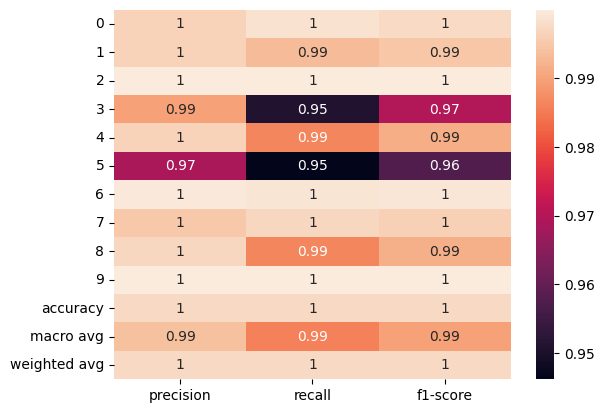

In [134]:
from sklearn.metrics import  accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score

xgb_model_9 = xgb.XGBClassifier(model__gamma = 0 ,model__learning_rate = 0.01, model_max_depth = 3 , model_n_estimators = 50)

# Variables for average classification report
originalclass = []
predictedclass = []
xgb_9_classification_7_fold = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    classification_fold =  metrics.classification_report(y_true, y_pred, output_dict=True) # print classification report
    xgb_9_classification_7_fold.append(classification_fold)
    #sns.heatmap(pd.DataFrame(classification_fold).iloc[:-1, :].T, annot=True)
    print("Classification report:" "\n", classification_fold)
    return accuracy_score(y_true, y_pred) # return accuracy score

nested_score = cross_val_score(xgb_model_9, X=X_train, y=class2_train, cv=StratifiedKFold(7, shuffle=True), 
               scoring=make_scorer(classification_report_with_accuracy_score))

print ("Classification report:" "\n", nested_score)

xgb_9_classification_7_fold_mean = metrics.classification_report(originalclass, predictedclass, output_dict=True)

print("Classification report mean:" "\n", xgb_9_classification_7_fold_mean)

sns.heatmap(pd.DataFrame(xgb_9_classification_7_fold_mean).iloc[:-1, :].T, annot=True)

xgb_9_classification_7_fold.append(xgb_9_classification_7_fold_mean)

#### 10-folds

Classification report:
 {'0': {'precision': 0.9964413866729931, 'recall': 0.9980692686983901, 'f1-score': 0.9972546633623697, 'support': 33666.0}, '1': {'precision': 0.9954831107619796, 'recall': 0.9932399333790536, 'f1-score': 0.994360256976117, 'support': 10207.0}, '2': {'precision': 0.9998140226892319, 'recall': 0.9992565055762082, 'f1-score': 0.9995351863902576, 'support': 5380.0}, '3': {'precision': 0.9518072289156626, 'recall': 0.9634146341463414, 'f1-score': 0.9575757575757576, 'support': 82.0}, '4': {'precision': 0.9940047961630696, 'recall': 0.9837816455696202, 'f1-score': 0.9888667992047714, 'support': 2528.0}, '5': {'precision': 0.9724770642201835, 'recall': 0.9464285714285714, 'f1-score': 0.9592760180995474, 'support': 224.0}, '6': {'precision': 0.9994356659142212, 'recall': 1.0, 'f1-score': 0.9997177533163986, 'support': 1771.0}, '7': {'precision': 0.9951219512195122, 'recall': 1.0, 'f1-score': 0.9975550122249389, 'support': 408.0}, '8': {'precision': 1.0, 'recall': 0.9729

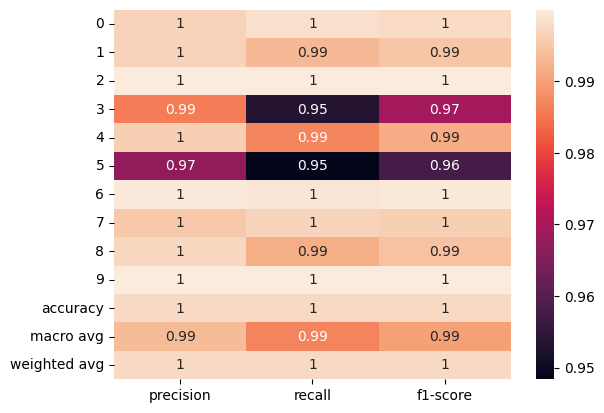

In [135]:
from sklearn.metrics import  accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score

xgb_model_9 = xgb.XGBClassifier(model__gamma = 0 ,model__learning_rate = 0.01, model_max_depth = 3 , model_n_estimators = 50)

# Variables for average classification report
originalclass = []
predictedclass = []
xgb_9_classification_10_fold = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    classification_fold =  metrics.classification_report(y_true, y_pred, output_dict=True) # print classification report
    xgb_9_classification_10_fold.append(classification_fold)
    #sns.heatmap(pd.DataFrame(classification_fold).iloc[:-1, :].T, annot=True)
    print("Classification report:" "\n", classification_fold)
    return accuracy_score(y_true, y_pred) # return accuracy score

nested_score = cross_val_score(xgb_model_9, X=X_train, y=class2_train, cv=StratifiedKFold(10, shuffle=True), 
               scoring=make_scorer(classification_report_with_accuracy_score))

print ("Classification report:" "\n", nested_score)

xgb_9_classification_10_fold_mean = metrics.classification_report(originalclass, predictedclass, output_dict=True)

print("Classification report mean:" "\n", xgb_9_classification_10_fold_mean)

sns.heatmap(pd.DataFrame(xgb_9_classification_10_fold_mean).iloc[:-1, :].T, annot=True)

xgb_9_classification_10_fold.append(xgb_9_classification_10_fold_mean)

#### 14-folds

Classification report:
 {'0': {'precision': 0.9963081262703779, 'recall': 0.9987940283611261, 'f1-score': 0.9975495285957553, 'support': 24047.0}, '1': {'precision': 0.9969705315340127, 'recall': 0.9930050747496914, 'f1-score': 0.9949838521267093, 'support': 7291.0}, '2': {'precision': 0.9997397866250325, 'recall': 0.9997397866250325, 'f1-score': 0.9997397866250325, 'support': 3843.0}, '3': {'precision': 0.9827586206896551, 'recall': 0.9827586206896551, 'f1-score': 0.9827586206896551, 'support': 58.0}, '4': {'precision': 0.998314606741573, 'recall': 0.9839424141749723, 'f1-score': 0.9910764082543223, 'support': 1806.0}, '5': {'precision': 0.9743589743589743, 'recall': 0.9440993788819876, 'f1-score': 0.9589905362776024, 'support': 161.0}, '6': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1265.0}, '7': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 291.0}, '8': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 26.0}, '9': {'precision': 1.0, 're

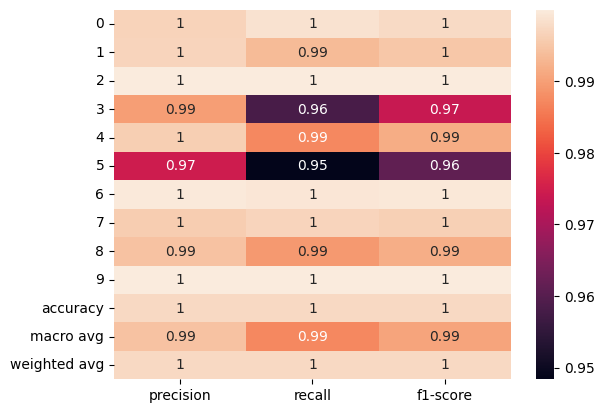

In [136]:
from sklearn.metrics import  accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score

xgb_model_9 = xgb.XGBClassifier(model__gamma = 0 ,model__learning_rate = 0.01, model_max_depth = 3 , model_n_estimators = 50)

# Variables for average classification report
originalclass = []
predictedclass = []
xgb_9_classification_14_fold = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    classification_fold =  metrics.classification_report(y_true, y_pred, output_dict=True) # print classification report
    xgb_9_classification_14_fold.append(classification_fold)
    #sns.heatmap(pd.DataFrame(classification_fold).iloc[:-1, :].T, annot=True)
    print("Classification report:" "\n", classification_fold)
    return accuracy_score(y_true, y_pred) # return accuracy score

nested_score = cross_val_score(xgb_model_9, X=X_train, y=class2_train, cv=StratifiedKFold(14, shuffle=True), 
               scoring=make_scorer(classification_report_with_accuracy_score))

print ("Classification report:" "\n", nested_score)

xgb_9_classification_14_fold_mean = metrics.classification_report(originalclass, predictedclass, output_dict=True)

print("Classification report mean:" "\n", xgb_9_classification_14_fold_mean)

sns.heatmap(pd.DataFrame(xgb_9_classification_14_fold_mean).iloc[:-1, :].T, annot=True)

xgb_9_classification_14_fold.append(xgb_9_classification_14_fold_mean)

#### Folds

In [143]:
xgb_9_classification_10_fold[10]["accuracy"]

0.9974101833602376

In [144]:
xgb_9_classification_14_fold[14]["accuracy"]

0.9975092640439247

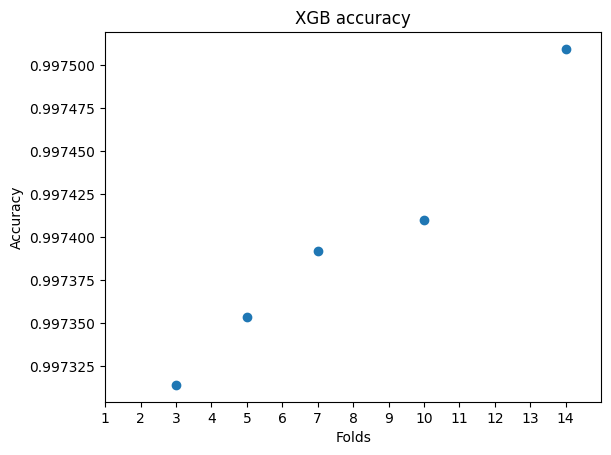

In [142]:
x = [3,5,7,10,14]
# corresponding y axis values
y = [xgb_9_classification_3_fold[3]["accuracy"], xgb_9_classification_5_fold[5]["accuracy"], xgb_9_classification_7_fold[7]["accuracy"], 
     xgb_9_classification_10_fold[10]["accuracy"], xgb_9_classification_14_fold[14]["accuracy"]]
 
# plotting the points 
plt.scatter(x, y, marker='o')
 
# naming the x axis
plt.xlabel("Folds")
plt.xlim(1,15)

dim=np.arange(1,15,1)
plt.xticks(dim)
# naming the y axis
plt.ylabel('Accuracy')
 
# giving a title to my graph
plt.title('XGB accuracy')
 
# function to show the plot
plt.show()

### RF

In [89]:
rfc=RandomForestClassifier()


parameter_grid = {
    'n_estimators': [100, 300],
    'max_depth' : [24,26],
    'criterion' :['entropy']
}
grid_search = GridSearchCV(rfc, param_grid = parameter_grid,
                          cv =StratifiedKFold(5), verbose = 3)

model = grid_search.fit(X_train, class2_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END criterion=entropy, max_depth=24, n_estimators=100;, score=0.997 total time= 5.0min
[CV 2/5] END criterion=entropy, max_depth=24, n_estimators=100;, score=0.996 total time= 5.6min
[CV 3/5] END criterion=entropy, max_depth=24, n_estimators=100;, score=0.997 total time= 5.6min
[CV 4/5] END criterion=entropy, max_depth=24, n_estimators=100;, score=0.997 total time= 5.5min
[CV 5/5] END criterion=entropy, max_depth=24, n_estimators=100;, score=0.996 total time= 5.5min
[CV 1/5] END criterion=entropy, max_depth=24, n_estimators=300;, score=0.997 total time=16.5min
[CV 2/5] END criterion=entropy, max_depth=24, n_estimators=300;, score=0.996 total time=16.4min
[CV 3/5] END criterion=entropy, max_depth=24, n_estimators=300;, score=0.997 total time=16.6min
[CV 4/5] END criterion=entropy, max_depth=24, n_estimators=300;, score=0.997 total time=16.4min
[CV 5/5] END criterion=entropy, max_depth=24, n_estimators=300;, score=0.996

In [49]:
rfc=RandomForestClassifier()


parameter_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth' : [28, 30, 40],
    'criterion' :['entropy']
}
grid_search = GridSearchCV(rfc, param_grid = parameter_grid,
                          cv =StratifiedKFold(5), verbose = 3)

model = grid_search.fit(X_train, class2_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END criterion=entropy, max_depth=28, n_estimators=100;, score=0.997 total time= 4.7min
[CV 2/5] END criterion=entropy, max_depth=28, n_estimators=100;, score=0.997 total time= 5.1min
[CV 3/5] END criterion=entropy, max_depth=28, n_estimators=100;, score=0.997 total time= 5.2min
[CV 4/5] END criterion=entropy, max_depth=28, n_estimators=100;, score=0.997 total time= 5.4min
[CV 5/5] END criterion=entropy, max_depth=28, n_estimators=100;, score=0.997 total time= 5.4min
[CV 1/5] END criterion=entropy, max_depth=28, n_estimators=200;, score=0.997 total time= 6.5min
[CV 2/5] END criterion=entropy, max_depth=28, n_estimators=200;, score=0.997 total time= 5.3min
[CV 3/5] END criterion=entropy, max_depth=28, n_estimators=200;, score=0.997 total time= 5.3min
[CV 4/5] END criterion=entropy, max_depth=28, n_estimators=200;, score=0.997 total time= 5.6min
[CV 5/5] END criterion=entropy, max_depth=28, n_estimators=200;, score=0.99

In [57]:
rfc_9=RandomForestClassifier(  criterion = 'entropy', max_depth =  40, n_estimators = 200)
rfc_9.fit(X_train, class2_train)

RandomForestClassifier(criterion='entropy', max_depth=40, n_estimators=200)


Model Accuracy:
 0.9971891615043169

Confusion matrix:
 [[84045    88     0     3     4    20     0     5     0     0]
 [  167 25347     0     0     2     2     0     0     0     0]
 [    0     0 13448     0     0     0     3     0     0     0]
 [    0     4     0   199     0     0     0     0     0     0]
 [  113     3     0     0  6203     0     0     1     0     0]
 [   41     0     0     0     0   521     0     0     0     0]
 [    0     0     2     0     0     0  4425     0     0     0]
 [    0     0     0     0     1     0     0  1018     0     0]
 [    1     0     0     0     0     0     0     0    90     0]
 [    1     0     0     0     0     0     0     0     0 28251]]


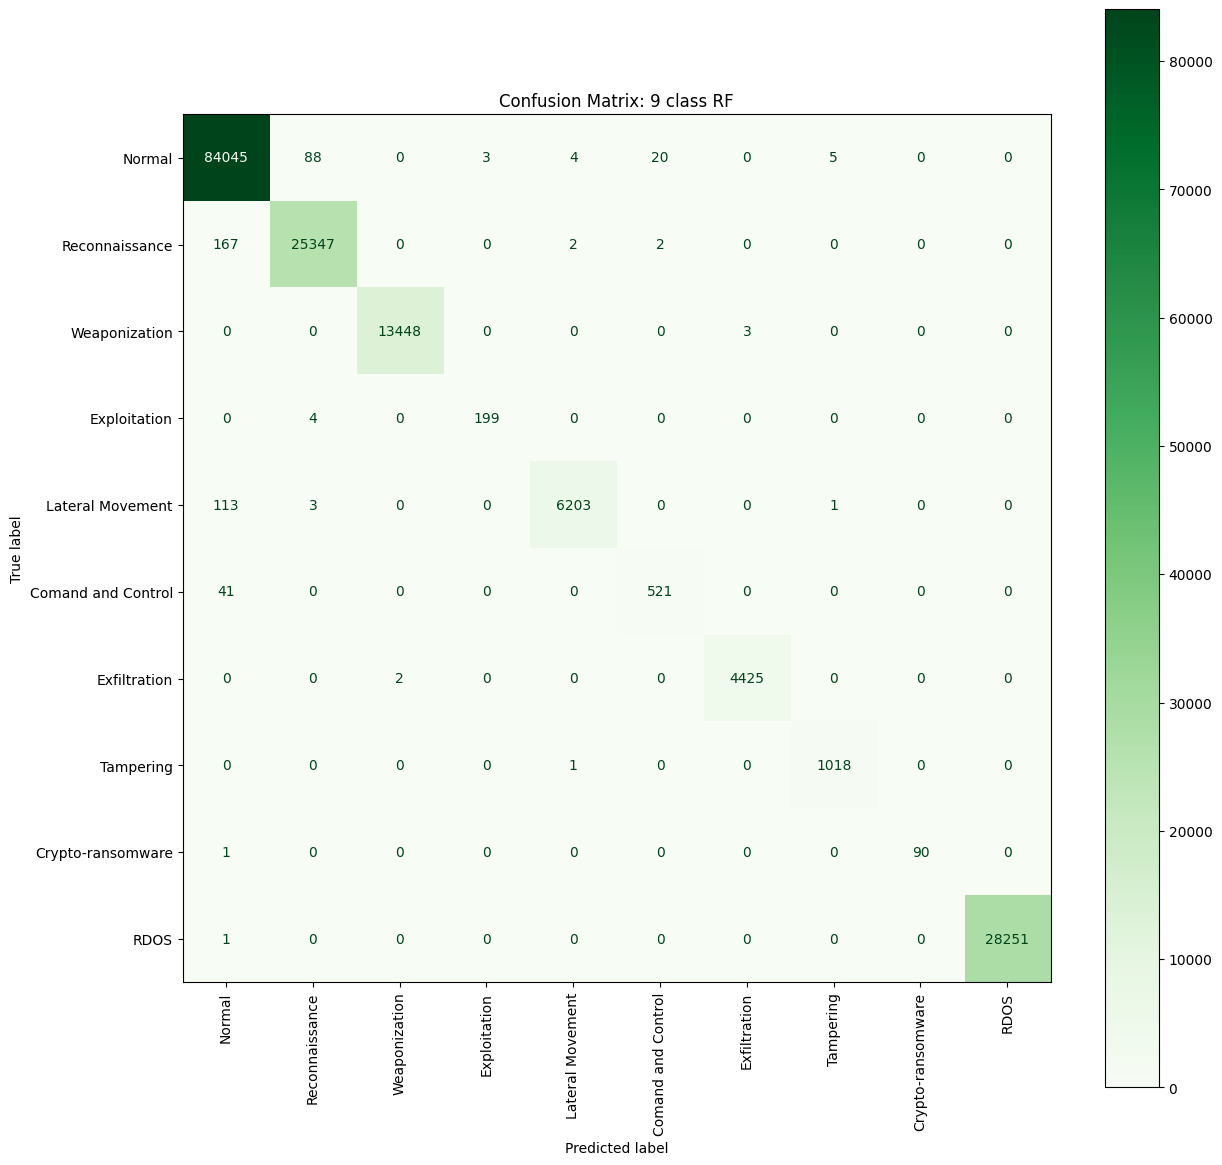


Classification report:
 {'0': {'precision': 0.996171534230988, 'recall': 0.9985742291926573, 'f1-score': 0.9973714346745147, 'support': 84165.0}, '1': {'precision': 0.9962660168225769, 'recall': 0.9932988478720903, 'f1-score': 0.9947802197802199, 'support': 25518.0}, '2': {'precision': 0.9998513011152417, 'recall': 0.9997769682551483, 'f1-score': 0.9998141333035947, 'support': 13451.0}, '3': {'precision': 0.9851485148514851, 'recall': 0.9802955665024631, 'f1-score': 0.9827160493827161, 'support': 203.0}, '4': {'precision': 0.9988727858293076, 'recall': 0.9814873417721519, 'f1-score': 0.9901037509976058, 'support': 6320.0}, '5': {'precision': 0.9594843462246777, 'recall': 0.9270462633451957, 'f1-score': 0.9429864253393665, 'support': 562.0}, '6': {'precision': 0.9993224932249323, 'recall': 0.9995482267901513, 'f1-score': 0.9994353472614341, 'support': 4427.0}, '7': {'precision': 0.994140625, 'recall': 0.9990186457311089, 'f1-score': 0.9965736661771902, 'support': 1019.0}, '8': {'precis

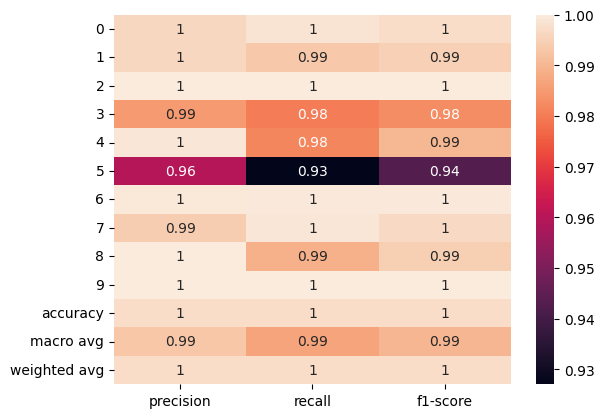

In [58]:
results_9_rf = eval_metrics(rfc_9, X_test , class2_test, attacks_9, "Confusion Matrix: 9 class RF")

#### 7-fold

Classification report:
 {'0': {'precision': 0.9951307446852596, 'recall': 0.998606894830956, 'f1-score': 0.9968657893644401, 'support': 48094.0}, '1': {'precision': 0.9964128035320088, 'recall': 0.9905362776025236, 'f1-score': 0.9934658504711464, 'support': 14582.0}, '2': {'precision': 0.9998698933125163, 'recall': 0.9998698933125163, 'f1-score': 0.9998698933125163, 'support': 7686.0}, '3': {'precision': 0.9821428571428571, 'recall': 0.9482758620689655, 'f1-score': 0.9649122807017544, 'support': 116.0}, '4': {'precision': 0.9991534988713319, 'recall': 0.9806147881473276, 'f1-score': 0.9897973445143257, 'support': 3611.0}, '5': {'precision': 0.9584664536741214, 'recall': 0.9345794392523364, 'f1-score': 0.9463722397476341, 'support': 321.0}, '6': {'precision': 0.9996044303797469, 'recall': 0.9988142292490119, 'f1-score': 0.9992091735863978, 'support': 2530.0}, '7': {'precision': 0.9931506849315068, 'recall': 0.9948542024013722, 'f1-score': 0.9940017137960583, 'support': 583.0}, '8': {'pr

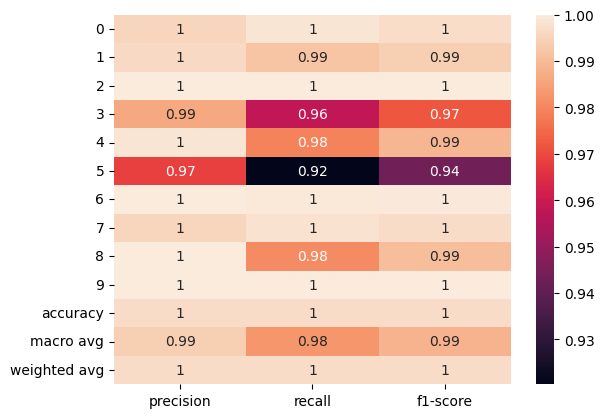

In [64]:
from sklearn.metrics import  accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score

rfc_9=RandomForestClassifier(  criterion = 'entropy', max_depth =  40, n_estimators = 200)

# Variables for average classification report
originalclass = []
predictedclass = []
rf_9_classification_7_fold = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    classification_fold =  metrics.classification_report(y_true, y_pred, output_dict=True) # print classification report
    rf_9_classification_7_fold.append(classification_fold)
    #sns.heatmap(pd.DataFrame(classification_fold).iloc[:-1, :].T, annot=True)
    print("Classification report:" "\n", classification_fold)
    return accuracy_score(y_true, y_pred) # return accuracy score

nested_score = cross_val_score(rfc_9, X=X_train, y=class2_train, cv=StratifiedKFold(7, shuffle=True), 
               scoring=make_scorer(classification_report_with_accuracy_score))

print ("Classification report:" "\n", nested_score)

rf_9_classification_7_fold_mean = metrics.classification_report(originalclass, predictedclass, output_dict=True)

print("Classification report mean:" "\n", rf_9_classification_7_fold_mean)

sns.heatmap(pd.DataFrame(rf_9_classification_7_fold_mean).iloc[:-1, :].T, annot=True)

rf_9_classification_7_fold.append(rf_9_classification_7_fold_mean)

#### 10-fold

Classification report:
 {'0': {'precision': 0.9945557297985028, 'recall': 0.9984257114002257, 'f1-score': 0.9964869632242859, 'support': 33666.0}, '1': {'precision': 0.9953740157480315, 'recall': 0.9907906338787107, 'f1-score': 0.9930770363823833, 'support': 10207.0}, '2': {'precision': 1.0, 'recall': 0.9998141263940521, 'f1-score': 0.9999070545589739, 'support': 5380.0}, '3': {'precision': 0.9871794871794872, 'recall': 0.9390243902439024, 'f1-score': 0.9625, 'support': 82.0}, '4': {'precision': 0.9987839481151196, 'recall': 0.9746835443037974, 'f1-score': 0.9865865865865865, 'support': 2528.0}, '5': {'precision': 0.9710144927536232, 'recall': 0.8933333333333333, 'f1-score': 0.9305555555555556, 'support': 225.0}, '6': {'precision': 0.9994356659142212, 'recall': 1.0, 'f1-score': 0.9997177533163986, 'support': 1771.0}, '7': {'precision': 0.9975550122249389, 'recall': 1.0, 'f1-score': 0.9987760097919216, 'support': 408.0}, '8': {'precision': 1.0, 'recall': 0.9722222222222222, 'f1-score': 

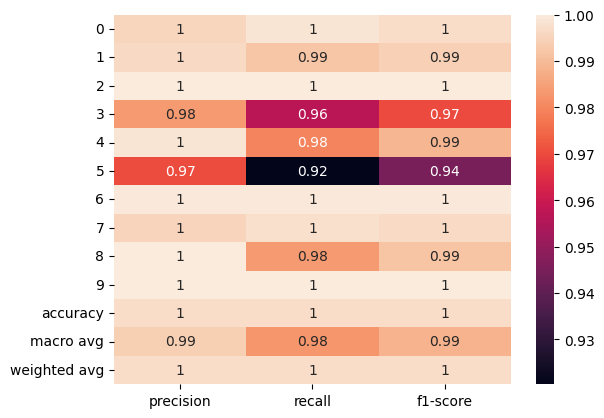

In [65]:
from sklearn.metrics import  accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score

rfc_19=RandomForestClassifier(  criterion = 'entropy', max_depth =  40, n_estimators = 200)

# Variables for average classification report
originalclass = []
predictedclass = []
rf_9_classification_10_fold = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    classification_fold =  metrics.classification_report(y_true, y_pred, output_dict=True) # print classification report
    rf_9_classification_10_fold.append(classification_fold)
    #sns.heatmap(pd.DataFrame(classification_fold).iloc[:-1, :].T, annot=True)
    print("Classification report:" "\n", classification_fold)
    return accuracy_score(y_true, y_pred) # return accuracy score

nested_score = cross_val_score(rfc_19, X=X_train, y=class2_train, cv=StratifiedKFold(10, shuffle=True), 
               scoring=make_scorer(classification_report_with_accuracy_score))

print ("Classification report:" "\n", nested_score)

rf_9_classification_10_fold_mean = metrics.classification_report(originalclass, predictedclass, output_dict=True)

print("Classification report mean:" "\n", rf_9_classification_10_fold_mean)

sns.heatmap(pd.DataFrame(rf_9_classification_10_fold_mean).iloc[:-1, :].T, annot=True)

rf_9_classification_10_fold.append(rf_9_classification_10_fold_mean)

## Multiclass 19

In [49]:
attacks_19 = ["Normal", "RDOS" , "Scanning vulnerability", "Generic scanning", "Brute Force", "MQTT cloud broker subscription" , "Discovering Resources", 
               "Exfiltration", "Insider Malcious", "Modbus Register Reading", "False Data Injection", "Command and Control", "Dictionary",
               "TCP Relay", "Fuzzing" , "Reverse shell" , "Crypto Ransomware"]

### DT

In [90]:
dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 40)
dt.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=40)


Model Accuracy:
 0.9959819033217892

Confusion matrix:
 [[83831     0     6     2     5     2   129     0     1     3     2    35
      0    96    49     3     1]
 [    1 28251     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    8     0 10555     1     0     2     0     2     1     0     0     0
      0     0     0     1     0]
 [    1     0     6 10042     0     1     0     1     0     0     0     0
      0     4     0     0     0]
 [    3     0     0     0  9445     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    4     0     0     0     0  4701     0     0     0     0     0     0
      0     0     0     0     0]
 [  101     0     0     0     0     0  4527     0     0     0     0     2
      0     0     0     0     0]
 [    3     0     5     0     1     0     0  4415     3     0     0     0
      0     0     0     0     0]
 [    0     0     0     0     0     0     0     3  3485     0     0     0
      0     1

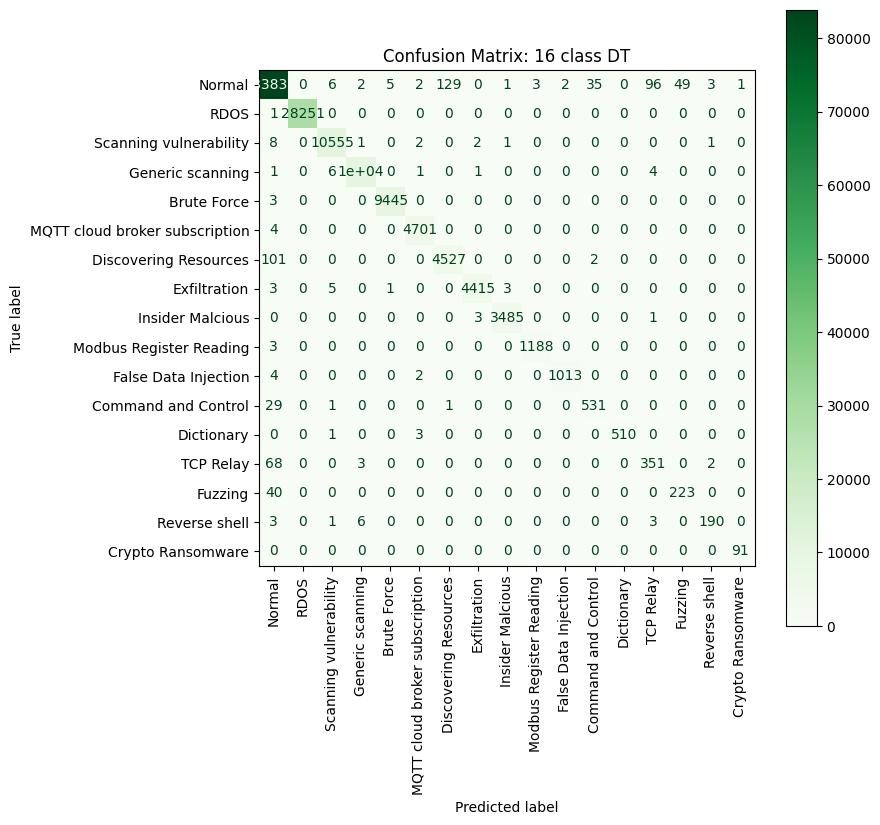


Classification report:
 {'0': {'precision': 0.9968132795871533, 'recall': 0.9960316045862294, 'f1-score': 0.9964222887842913, 'support': 84165.0}, '1': {'precision': 1.0, 'recall': 0.9999646042758035, 'f1-score': 0.9999823018246818, 'support': 28252.0}, '2': {'precision': 0.9981087470449173, 'recall': 0.9985808893093662, 'f1-score': 0.9983447623551668, 'support': 10570.0}, '3': {'precision': 0.9988064451959419, 'recall': 0.9987071108901044, 'f1-score': 0.9987567755731265, 'support': 10055.0}, '4': {'precision': 0.9993651465453391, 'recall': 0.9996824724809483, 'f1-score': 0.999523784327213, 'support': 9448.0}, '5': {'precision': 0.9978773084270856, 'recall': 0.9991498405951116, 'f1-score': 0.9985131690739167, 'support': 4705.0}, '6': {'precision': 0.9720850332832296, 'recall': 0.9777537796976242, 'f1-score': 0.9749111661462259, 'support': 4630.0}, '7': {'precision': 0.9986428409862023, 'recall': 0.997289360740908, 'f1-score': 0.9979656419529837, 'support': 4427.0}, '8': {'precision': 

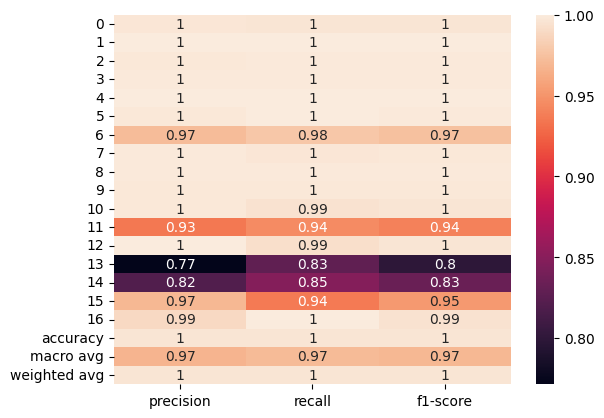

In [91]:
results_19_dt =  eval_metrics(dt, X_test , y_test, attacks_19, "Confusion Matrix: 16 class DT")

#### 3-fold

Classification report:
 {'0': {'precision': 0.9968758926021137, 'recall': 0.9952058456603101, 'f1-score': 0.9960401690954819, 'support': 112220.0}, '1': {'precision': 0.9999469087627088, 'recall': 0.9999734536766658, 'f1-score': 0.9999601810435222, 'support': 37670.0}, '2': {'precision': 0.9985816608751152, 'recall': 0.9990776216829856, 'f1-score': 0.998829579712715, 'support': 14094.0}, '3': {'precision': 0.9976913911230265, 'recall': 0.9991795942720764, 'f1-score': 0.9984349381427933, 'support': 13408.0}, '4': {'precision': 0.9997617913292044, 'recall': 0.9995236961181234, 'f1-score': 0.9996427295462665, 'support': 12597.0}, '5': {'precision': 0.9977696351760396, 'recall': 0.9984058664116053, 'f1-score': 0.9980876494023906, 'support': 6273.0}, '6': {'precision': 0.9619790009545021, 'recall': 0.9795885306982018, 'f1-score': 0.9707039088209327, 'support': 6173.0}, '7': {'precision': 0.998981324278438, 'recall': 0.9969501863774991, 'f1-score': 0.9979647218453187, 'support': 5902.0}, '8'

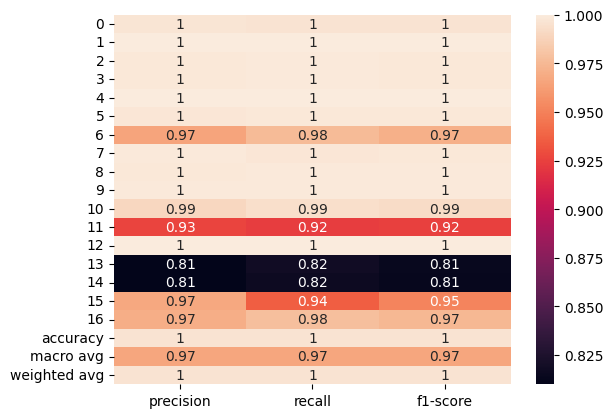

In [92]:
from sklearn.metrics import  accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score

dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 40)

# Variables for average classification report
originalclass = []
predictedclass = []
classification_3_fold = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    classification_fold =  metrics.classification_report(y_true, y_pred, output_dict=True) # print classification report
    classification_3_fold.append(classification_fold)
    #sns.heatmap(pd.DataFrame(classification_fold).iloc[:-1, :].T, annot=True)
    print("Classification report:" "\n", classification_fold)
    return accuracy_score(y_true, y_pred) # return accuracy score

nested_score = cross_val_score(dt, X=X_train, y=y_train, cv=StratifiedKFold(3, shuffle=True), 
               scoring=make_scorer(classification_report_with_accuracy_score))

print ("Classification report:" "\n", nested_score)

classification_3_fold_mean = metrics.classification_report(originalclass, predictedclass, output_dict=True)

print("Classification report mean:" "\n", classification_3_fold_mean)

sns.heatmap(pd.DataFrame(classification_3_fold_mean).iloc[:-1, :].T, annot=True)

classification_3_fold.append(classification_3_fold_mean)

#### 5-folds

Classification report:
 {'0': {'precision': 0.9967004057609132, 'recall': 0.9959454642666191, 'f1-score': 0.9963227920037442, 'support': 67332.0}, '1': {'precision': 0.9997346072186837, 'recall': 1.0, 'f1-score': 0.9998672859986729, 'support': 22602.0}, '2': {'precision': 0.9978738483345145, 'recall': 0.9989357928343384, 'f1-score': 0.9984045382024463, 'support': 8457.0}, '3': {'precision': 0.9985085756897838, 'recall': 0.9986326911124922, 'f1-score': 0.9985706295444658, 'support': 8045.0}, '4': {'precision': 0.9993388866851778, 'recall': 1.0, 'f1-score': 0.999669334038754, 'support': 7558.0}, '5': {'precision': 0.998936735778841, 'recall': 0.9984059511158342, 'f1-score': 0.9986712729205421, 'support': 3764.0}, '6': {'precision': 0.9682073203312851, 'recall': 0.978401727861771, 'f1-score': 0.9732778299986571, 'support': 3704.0}, '7': {'precision': 0.999152063312606, 'recall': 0.9983055634001694, 'f1-score': 0.9987286339878514, 'support': 3541.0}, '8': {'precision': 0.9996414485478666, 

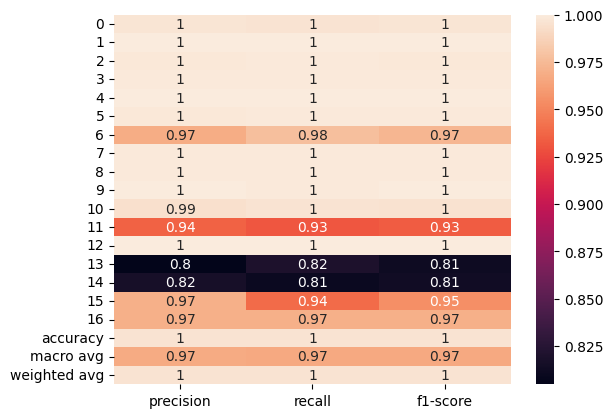

In [104]:
from sklearn.metrics import  accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score

dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 40)

# Variables for average classification report
originalclass = []
predictedclass = []
classification_5_fold = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    classification_fold =  metrics.classification_report(y_true, y_pred, output_dict=True) # print classification report
    classification_5_fold.append(classification_fold)
    #sns.heatmap(pd.DataFrame(classification_fold).iloc[:-1, :].T, annot=True)
    print("Classification report:" "\n", classification_fold)
    return accuracy_score(y_true, y_pred) # return accuracy score

nested_score = cross_val_score(dt, X=X_train, y=y_train, cv=StratifiedKFold(5, shuffle=True), 
               scoring=make_scorer(classification_report_with_accuracy_score))

print ("Classification report:" "\n", nested_score)

classification_5_fold_mean = metrics.classification_report(originalclass, predictedclass, output_dict=True)

print("Classification report mean:" "\n", classification_5_fold_mean)

sns.heatmap(pd.DataFrame(classification_5_fold_mean).iloc[:-1, :].T, annot=True)

classification_5_fold.append(classification_5_fold_mean)

#### 7-folds

Classification report:
 {'0': {'precision': 0.9959693336934616, 'recall': 0.9967355595292552, 'f1-score': 0.9963522992985191, 'support': 48094.0}, '1': {'precision': 0.9999380613192939, 'recall': 1.0, 'f1-score': 0.9999690297005172, 'support': 16144.0}, '2': {'precision': 0.9986752773638019, 'recall': 0.9985099337748344, 'f1-score': 0.99859259872506, 'support': 6040.0}, '3': {'precision': 0.9972198088618592, 'recall': 0.9987817612252001, 'f1-score': 0.9980001738979218, 'support': 5746.0}, '4': {'precision': 0.9998148148148148, 'recall': 1.0, 'f1-score': 0.9999073988332252, 'support': 5399.0}, '5': {'precision': 0.9974025974025974, 'recall': 0.9996281145407214, 'f1-score': 0.9985141158989599, 'support': 2689.0}, '6': {'precision': 0.972869698127627, 'recall': 0.9625708884688091, 'f1-score': 0.967692892436336, 'support': 2645.0}, '7': {'precision': 0.9988142292490119, 'recall': 0.9988142292490119, 'f1-score': 0.9988142292490119, 'support': 2530.0}, '8': {'precision': 0.9974962443665498, 

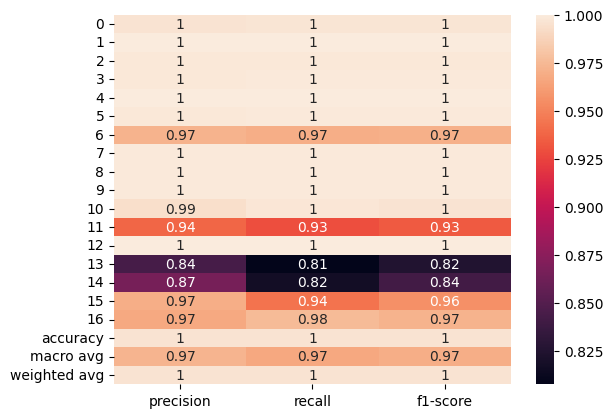

In [103]:
from sklearn.metrics import  accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedGroupKFold

dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 20)

# Variables for average classification report
originalclass = []
predictedclass = []
classification_7_fold = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    classification_fold =  metrics.classification_report(y_true, y_pred, output_dict=True) # print classification report
    classification_7_fold.append(classification_fold)
    #sns.heatmap(pd.DataFrame(classification_fold).iloc[:-1, :].T, annot=True)
    print("Classification report:" "\n", classification_fold)
    return accuracy_score(y_true, y_pred) # return accuracy score

nested_score = cross_val_score(dt, X=X_train, y=y_train, cv=StratifiedKFold(7, shuffle=True), 
               scoring=make_scorer(classification_report_with_accuracy_score))

print ("Classification report:" "\n", nested_score)

classification_7_fold_mean = metrics.classification_report(originalclass, predictedclass, output_dict=True)

print("Classification report mean:" "\n", classification_7_fold_mean)

sns.heatmap(pd.DataFrame(classification_7_fold_mean).iloc[:-1, :].T, annot=True)

classification_7_fold.append(classification_7_fold_mean)

#### 10-folds

Classification report:
 {'0': {'precision': 0.9960237388724036, 'recall': 0.9970296441513693, 'f1-score': 0.9965264376688537, 'support': 33666.0}, '1': {'precision': 0.9999115200849407, 'recall': 1.0, 'f1-score': 0.9999557580852099, 'support': 11301.0}, '2': {'precision': 0.9981091940439613, 'recall': 0.9988174077578051, 'f1-score': 0.9984631753162312, 'support': 4228.0}, '3': {'precision': 0.9975167618574621, 'recall': 0.9985085756897838, 'f1-score': 0.9980124223602485, 'support': 4023.0}, '4': {'precision': 0.9997354497354497, 'recall': 1.0, 'f1-score': 0.9998677073686996, 'support': 3779.0}, '5': {'precision': 0.9994683678894205, 'recall': 0.9989373007438895, 'f1-score': 0.9992027637523253, 'support': 1882.0}, '6': {'precision': 0.9764898851831602, 'recall': 0.9643628509719222, 'f1-score': 0.9703884813909264, 'support': 1852.0}, '7': {'precision': 0.9988700564971752, 'recall': 0.9983060417843026, 'f1-score': 0.9985879695001412, 'support': 1771.0}, '8': {'precision': 0.99928315412186

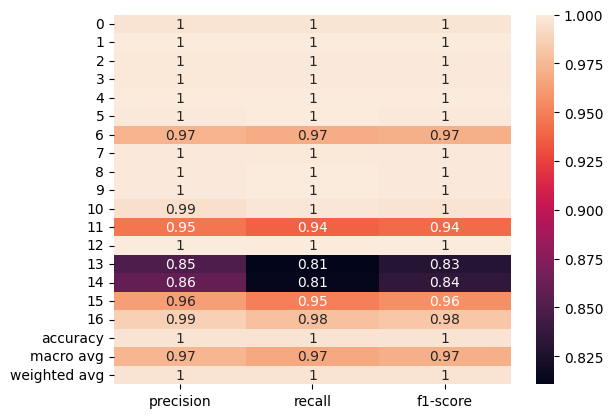

In [95]:
originalclass = []
predictedclass = []
classification_10_fold = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    classification_fold =  metrics.classification_report(y_true, y_pred, output_dict=True) # print classification report
    classification_10_fold.append(classification_fold)
    #sns.heatmap(pd.DataFrame(classification_fold).iloc[:-1, :].T, annot=True)
    print("Classification report:" "\n", classification_fold)
    return accuracy_score(y_true, y_pred) # return accuracy score

nested_score = cross_val_score(dt, X=X_train, y=y_train, cv=StratifiedKFold(10, shuffle=True), 
               scoring=make_scorer(classification_report_with_accuracy_score))

print ("Classification report:" "\n", nested_score)

classification_10_fold_mean = metrics.classification_report(originalclass, predictedclass, output_dict=True)

print("Classification report mean:" "\n", classification_10_fold_mean)

sns.heatmap(pd.DataFrame(classification_10_fold_mean).iloc[:-1, :].T, annot=True)

classification_10_fold.append(classification_10_fold_mean)

#### 14-folds

Classification report:
 {'0': {'precision': 0.996095048188767, 'recall': 0.9971306192040588, 'f1-score': 0.9966125646833891, 'support': 24047.0}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 8072.0}, '2': {'precision': 0.9993368700265252, 'recall': 0.9980132450331126, 'f1-score': 0.998674618952949, 'support': 3020.0}, '3': {'precision': 0.998259658893143, 'recall': 0.998259658893143, 'f1-score': 0.998259658893143, 'support': 2873.0}, '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 2700.0}, '5': {'precision': 0.9992565055762082, 'recall': 1.0, 'f1-score': 0.9996281145407214, 'support': 1344.0}, '6': {'precision': 0.9808868501529052, 'recall': 0.970499243570348, 'f1-score': 0.9756653992395438, 'support': 1322.0}, '7': {'precision': 0.9984189723320158, 'recall': 0.9984189723320158, 'f1-score': 0.9984189723320158, 'support': 1265.0}, '8': {'precision': 0.996993987975952, 'recall': 0.998995983935743, 'f1-score': 0.9979939819458375, 'support': 996.0},

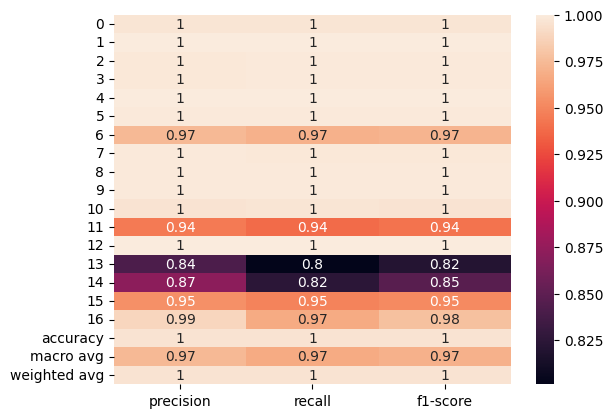

In [96]:
originalclass = []
predictedclass = []
classification_14_fold = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    classification_fold =  metrics.classification_report(y_true, y_pred, output_dict=True) # print classification report
    classification_14_fold.append(classification_fold)
    #sns.heatmap(pd.DataFrame(classification_fold).iloc[:-1, :].T, annot=True)
    print("Classification report:" "\n", classification_fold)
    return accuracy_score(y_true, y_pred) # return accuracy score

nested_score = cross_val_score(dt, X=X_train, y=y_train, cv=StratifiedKFold(14, shuffle=True), 
               scoring=make_scorer(classification_report_with_accuracy_score))

print ("Classification report:" "\n", nested_score)

classification_14_fold_mean = metrics.classification_report(originalclass, predictedclass, output_dict=True)

print("Classification report mean:" "\n", classification_14_fold_mean)

sns.heatmap(pd.DataFrame(classification_14_fold_mean).iloc[:-1, :].T, annot=True)

classification_14_fold.append(classification_14_fold_mean)

#### Folds

In [102]:
classification_3_fold[3]["accuracy"]

0.9955886230986035

In [105]:
classification_5_fold[5]["accuracy"]

0.9958599517400855

In [106]:
classification_7_fold[7]["accuracy"]

0.995954459469141

In [98]:
classification_10_fold[10]["accuracy"]

0.9960733562895656

In [99]:
classification_14_fold[14]["accuracy"]

0.9960916481080925

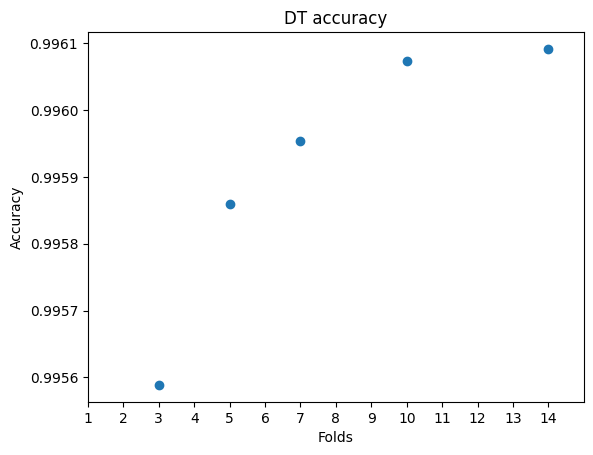

In [107]:
x = [3,5,7,10,14]
# corresponding y axis values
y = [classification_3_fold[3]["accuracy"], classification_5_fold[5]["accuracy"], classification_7_fold[7]["accuracy"], 
     classification_10_fold[10]["accuracy"], classification_14_fold[14]["accuracy"]]
 
# plotting the points 
plt.scatter(x, y, marker='o')
 
# naming the x axis
plt.xlabel("Folds")
plt.xlim(1,15)

dim=np.arange(1,15,1)
plt.xticks(dim)
# naming the y axis
plt.ylabel('Accuracy')
 
# giving a title to my graph
plt.title('DT accuracy')
 
# function to show the plot
plt.show()

### KNN

In [79]:
knn = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6, weights='distance')


Model Accuracy:
 0.9814216379688796

Confusion matrix:
 [[82715    31    87    16    58    52   563   154   320     2    11    84
      1    33    37     1     0]
 [    0 28252     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [   22     0 10540     2     3     0     0     0     0     0     0     0
      1     2     0     0     0]
 [   14     0     1 10035     0     5     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0     0  9448     0     0     0     0     0     0     0
      0     0     0     0     0]
 [  114     0     0     4     0  4565     0     0     0     0    22     0
      0     0     0     0     0]
 [  319     0     0     0     0     0  4308     0     0     0     0     3
      0     0     0     0     0]
 [   93     0     0     2     0     0     0  4282    50     0     0     0
      0     0     0     0     0]
 [   22     0     0     0     0     0     0    48  3419     0     0     0
      0     0

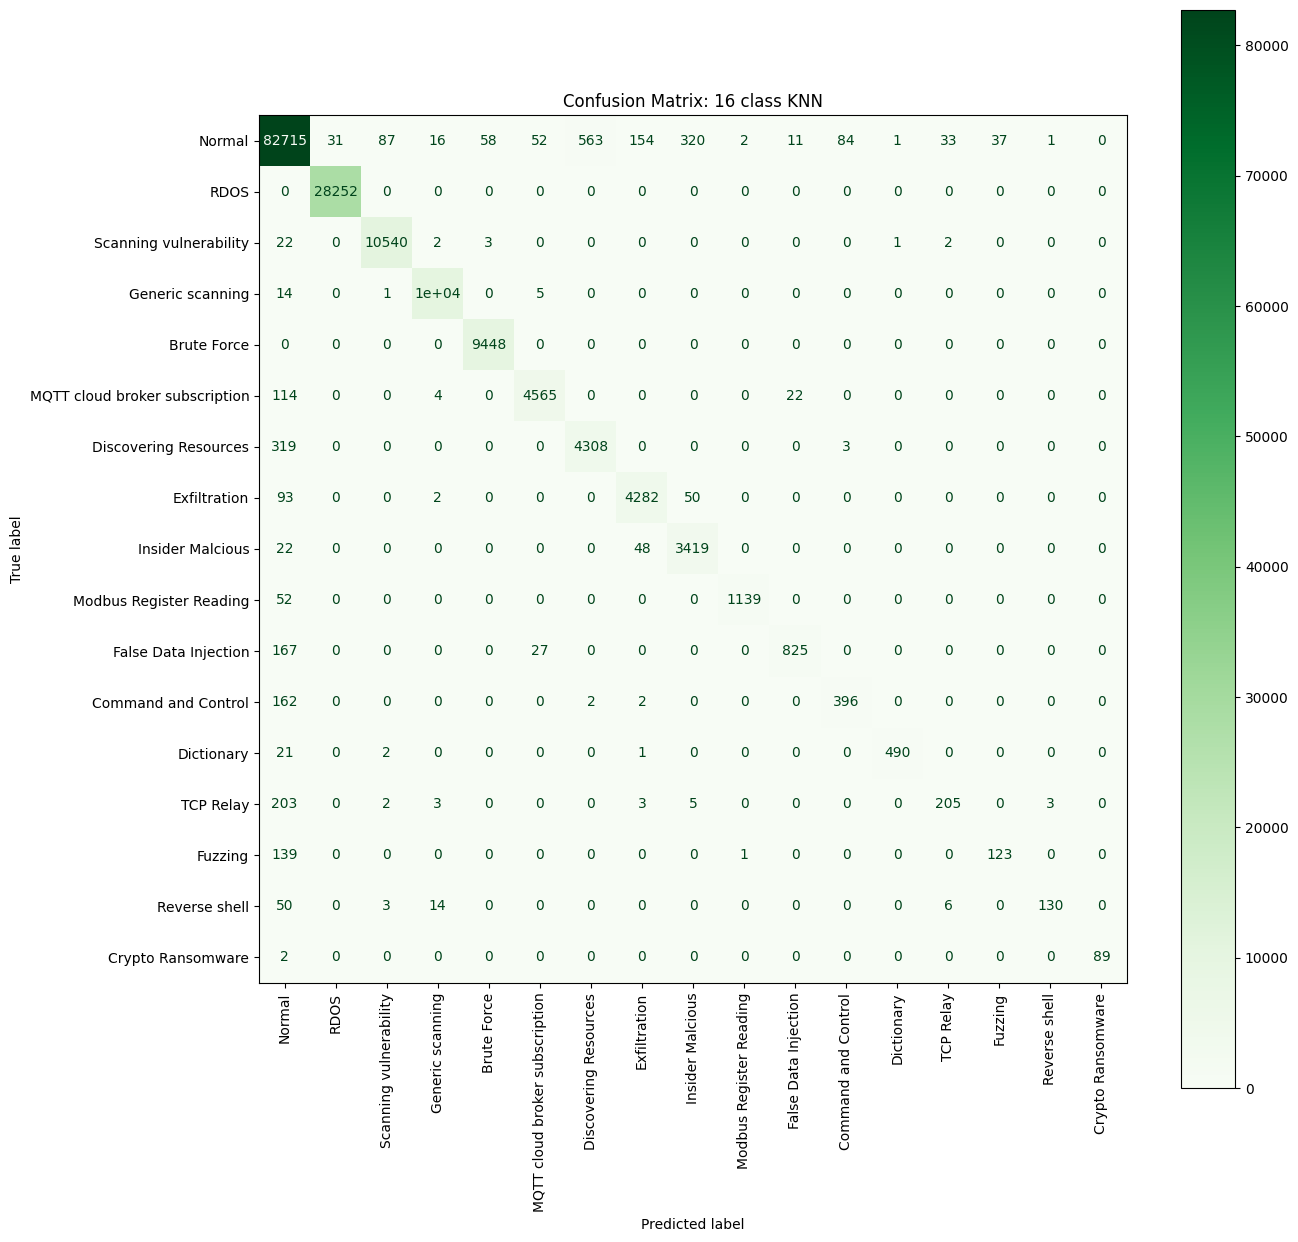


Classification report:
 {'0': {'precision': 0.983589987514121, 'recall': 0.9827719360779421, 'f1-score': 0.9831807916319981, 'support': 84165.0}, '1': {'precision': 0.9989039352261075, 'recall': 1.0, 'f1-score': 0.9994516671088706, 'support': 28252.0}, '2': {'precision': 0.9910672308415609, 'recall': 0.9971617786187322, 'f1-score': 0.9941051638764442, 'support': 10570.0}, '3': {'precision': 0.9959309249702263, 'recall': 0.9980109398309299, 'f1-score': 0.9969698474988824, 'support': 10055.0}, '4': {'precision': 0.9935850247134294, 'recall': 1.0, 'f1-score': 0.9967821912749907, 'support': 9448.0}, '5': {'precision': 0.9819315981931598, 'recall': 0.9702444208289054, 'f1-score': 0.9760530254436605, 'support': 4705.0}, '6': {'precision': 0.8840549969218141, 'recall': 0.9304535637149028, 'f1-score': 0.9066610544038725, 'support': 4630.0}, '7': {'precision': 0.9536748329621381, 'recall': 0.9672464422859725, 'f1-score': 0.9604126948525289, 'support': 4427.0}, '8': {'precision': 0.901159725882

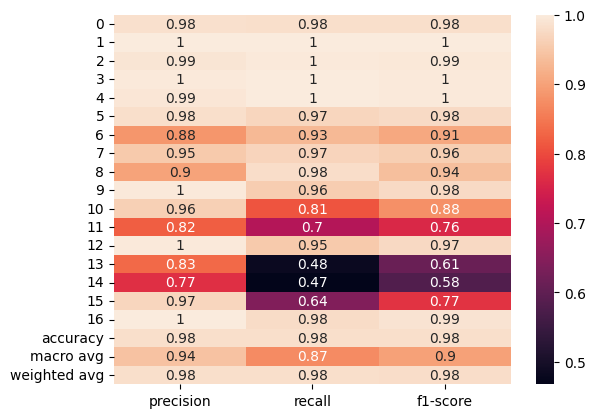

In [80]:
results_19_knn = eval_metrics(knn, X_test , y_test, attacks_19, "Confusion Matrix: 16 class KNN")

#### 3-folds

In [79]:
knn = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')

Classification report:
 {'0': {'precision': 0.9808697200338274, 'recall': 0.9818748886116557, 'f1-score': 0.981372046937276, 'support': 112220.0}, '1': {'precision': 0.9983567452955208, 'recall': 0.9999469073533316, 'f1-score': 0.9991511936339523, 'support': 37670.0}, '2': {'precision': 0.9901953868942653, 'recall': 0.9960266780190152, 'f1-score': 0.9931024724983198, 'support': 14094.0}, '3': {'precision': 0.9925090855150931, 'recall': 0.998135302453942, 'f1-score': 0.9953142432130904, 'support': 13407.0}, '4': {'precision': 0.991500078702975, 'recall': 1.0, 'f1-score': 0.9957319000948466, 'support': 12598.0}, '5': {'precision': 0.9837053935147466, 'recall': 0.9623784473138849, 'f1-score': 0.9729250604351329, 'support': 6273.0}, '6': {'precision': 0.8705607476635514, 'recall': 0.9055411535968891, 'f1-score': 0.8877064803049555, 'support': 6172.0}, '7': {'precision': 0.9503355704697987, 'recall': 0.959512112485177, 'f1-score': 0.9549017954986091, 'support': 5903.0}, '8': {'precision': 0

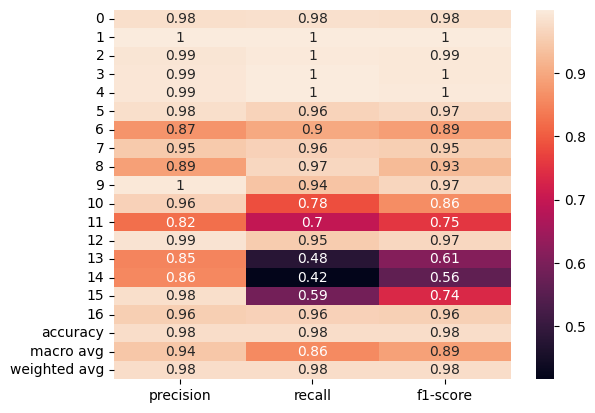

In [80]:
knn_3_folds_class_19 = folds(knn, X_train, y_train, 3)

#### 5-folds

Classification report:
 {'0': {'precision': 0.9820956679236319, 'recall': 0.9824749004930791, 'f1-score': 0.9822852476056129, 'support': 67332.0}, '1': {'precision': 0.998939179632249, 'recall': 0.9999115122555526, 'f1-score': 0.9994251094503163, 'support': 22602.0}, '2': {'precision': 0.9918766187897339, 'recall': 0.9963339640491958, 'f1-score': 0.9941002949852508, 'support': 8456.0}, '3': {'precision': 0.993441405766613, 'recall': 0.9978868862647607, 'f1-score': 0.9956591839265782, 'support': 8045.0}, '4': {'precision': 0.9926451273969005, 'recall': 1.0, 'f1-score': 0.9963089902451885, 'support': 7558.0}, '5': {'precision': 0.9783958952200918, 'recall': 0.9625398512221042, 'f1-score': 0.9704031070041516, 'support': 3764.0}, '6': {'precision': 0.8717816683831102, 'recall': 0.9143937348096138, 'f1-score': 0.8925794121523659, 'support': 3703.0}, '7': {'precision': 0.9516263552960801, 'recall': 0.9664031620553359, 'f1-score': 0.9589578372321053, 'support': 3542.0}, '8': {'precision': 0.9

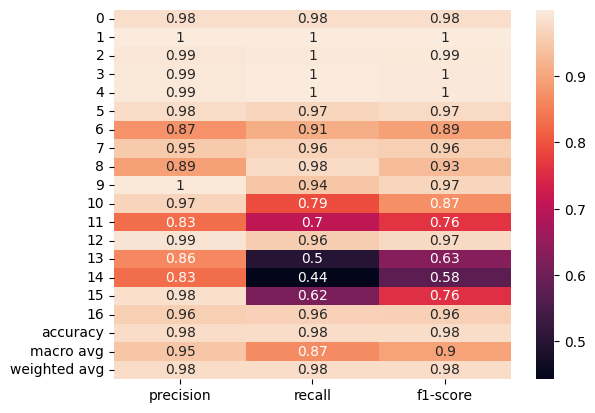

In [81]:
knn_5_folds_class_19 = folds(knn, X_train, y_train, 5)

#### 7-folds

Classification report:
 {'0': {'precision': 0.9830303787452891, 'recall': 0.9816405031708078, 'f1-score': 0.9823349493352198, 'support': 48095.0}, '1': {'precision': 0.9990716098285572, 'recall': 0.9998761149653121, 'f1-score': 0.9994737005046284, 'support': 16144.0}, '2': {'precision': 0.9924192485168095, 'recall': 0.9970198675496689, 'f1-score': 0.9947142385199867, 'support': 6040.0}, '3': {'precision': 0.9941064309239036, 'recall': 0.9980856247824573, 'f1-score': 0.9960920538428136, 'support': 5746.0}, '4': {'precision': 0.993376264949402, 'recall': 1.0, 'f1-score': 0.9966771275613808, 'support': 5399.0}, '5': {'precision': 0.9788279773156899, 'recall': 0.9628114540721457, 'f1-score': 0.9707536557930259, 'support': 2689.0}, '6': {'precision': 0.8638132295719845, 'recall': 0.9229024943310657, 'f1-score': 0.8923807783665265, 'support': 2646.0}, '7': {'precision': 0.9508580343213728, 'recall': 0.9640173981810992, 'f1-score': 0.9573924995091303, 'support': 2529.0}, '8': {'precision': 0.

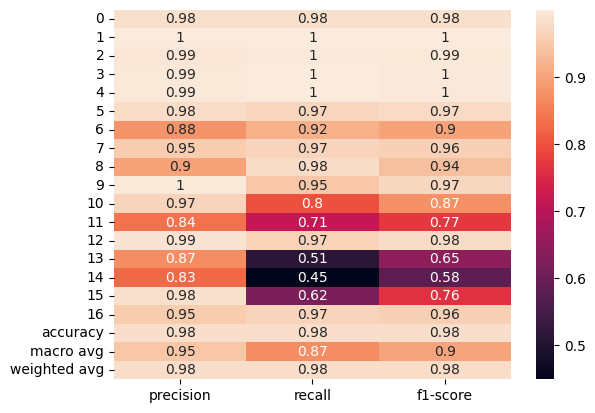

In [82]:
knn_7_folds_class_19 = folds(knn, X_train, y_train, 7)

#### 10-folds

Classification report:
 {'0': {'precision': 0.98324520230527, 'recall': 0.9831283787797778, 'f1-score': 0.9831867870722434, 'support': 33666.0}, '1': {'precision': 0.9989392734022806, 'recall': 1.0, 'f1-score': 0.999469355266649, 'support': 11301.0}, '2': {'precision': 0.9929311969839774, 'recall': 0.9966887417218543, 'f1-score': 0.9948064211520302, 'support': 4228.0}, '3': {'precision': 0.9935563816604709, 'recall': 0.9967677772252611, 'f1-score': 0.9951594886434157, 'support': 4022.0}, '4': {'precision': 0.9934279705573081, 'recall': 1.0, 'f1-score': 0.9967031517868917, 'support': 3779.0}, '5': {'precision': 0.980203317281969, 'recall': 0.973432518597237, 'f1-score': 0.9768061850173286, 'support': 1882.0}, '6': {'precision': 0.8749359302921579, 'recall': 0.92170626349892, 'f1-score': 0.8977123323691822, 'support': 1852.0}, '7': {'precision': 0.9593314763231198, 'recall': 0.9723320158102767, 'f1-score': 0.96578799775659, 'support': 1771.0}, '8': {'precision': 0.8964613368283093, 'reca

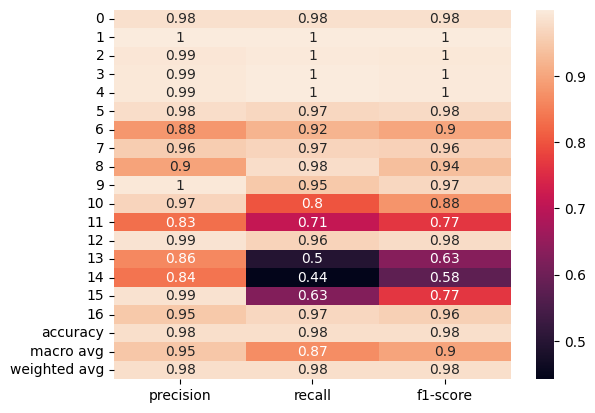

In [83]:
knn_10_folds_class_19 = folds(knn, X_train, y_train, 10)

#### 14-folds

Classification report:
 {'0': {'precision': 0.9832128313803706, 'recall': 0.9839487691284099, 'f1-score': 0.9835806625930082, 'support': 24048.0}, '1': {'precision': 0.9988862764509343, 'recall': 1.0, 'f1-score': 0.9994428279576549, 'support': 8072.0}, '2': {'precision': 0.99340804218853, 'recall': 0.9980132450331126, 'f1-score': 0.9957053187974892, 'support': 3020.0}, '3': {'precision': 0.9947952810548231, 'recall': 0.9979115906717717, 'f1-score': 0.9963509991311903, 'support': 2873.0}, '4': {'precision': 0.993009565857248, 'recall': 1.0, 'f1-score': 0.9964925235370131, 'support': 2699.0}, '5': {'precision': 0.9834087481146304, 'recall': 0.9695167286245353, 'f1-score': 0.9764133283414451, 'support': 1345.0}, '6': {'precision': 0.8889695210449927, 'recall': 0.9259259259259259, 'f1-score': 0.9070714550166604, 'support': 1323.0}, '7': {'precision': 0.9633385335413417, 'recall': 0.9770569620253164, 'f1-score': 0.9701492537313434, 'support': 1264.0}, '8': {'precision': 0.9031657355679702, 

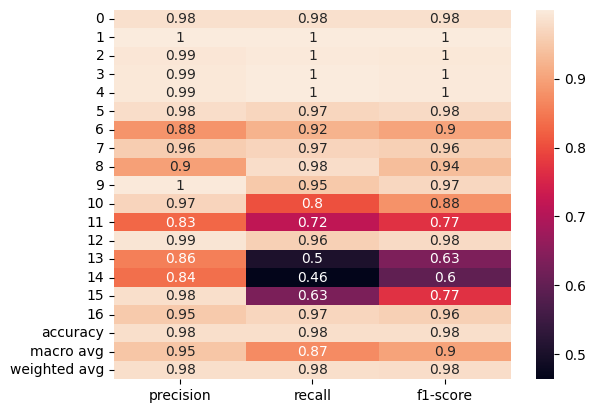

In [84]:
knn_14_folds_class_19 = folds(knn, X_train, y_train, 14)

#### Folds

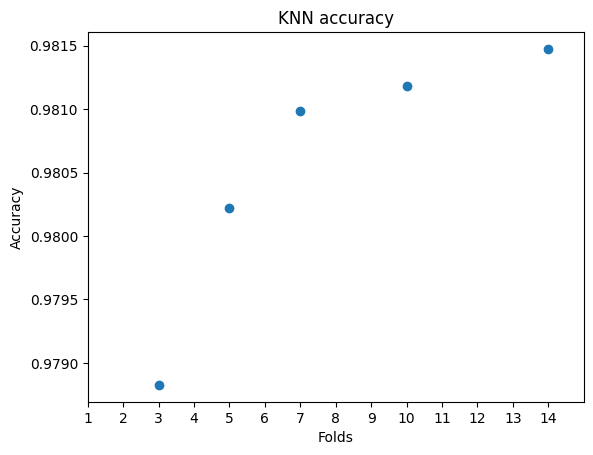

In [85]:
x = [3,5,7,10,14]
# corresponding y axis values
y = [knn_3_folds_class_19[3]["accuracy"], knn_5_folds_class_19[5]["accuracy"], knn_7_folds_class_19[7]["accuracy"], 
     knn_10_folds_class_19[10]["accuracy"], knn_14_folds_class_19[14]["accuracy"]]
 
# plotting the points 
plt.scatter(x, y, marker='o')
 
# naming the x axis
plt.xlabel("Folds")
plt.xlim(1,15)

dim=np.arange(1,15,1)
plt.xticks(dim)
# naming the y axis
plt.ylabel('Accuracy')
 
# giving a title to my graph
plt.title('KNN accuracy')
 
# function to show the plot
plt.show()

### LR

In [81]:
clf = LogisticRegression( C = 1000, penalty = 'l2')
clf.fit(X_train, y_train)

LogisticRegression(C=1000)


Model Accuracy:
 0.974306131408224

Confusion matrix:
 [[83777    40    22    29     3     5   136    11     6     1    15    95
      0     6    13     0     6]
 [    7 28229     0     0     0     0    16     0     0     0     0     0
      0     0     0     0     0]
 [   26     0  9823   655    61     2     0     0     0     0     0     0
      0     2     0     1     0]
 [   39     0   443  9558     0    15     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0     0  9444     0     0     4     0     0     0     0
      0     0     0     0     0]
 [    6     0     0     0     0  4675     0     0     0     0    22     0
      0     0     0     2     0]
 [ 1740     3     0     0     0     0  2884     0     0     0     0     3
      0     0     0     0     0]
 [    1     0     1     0     6     1     0  4357    61     0     0     0
      0     0     0     0     0]
 [    1     0     0     0     0     0     0   134  3353     0     0     0
      0     0 

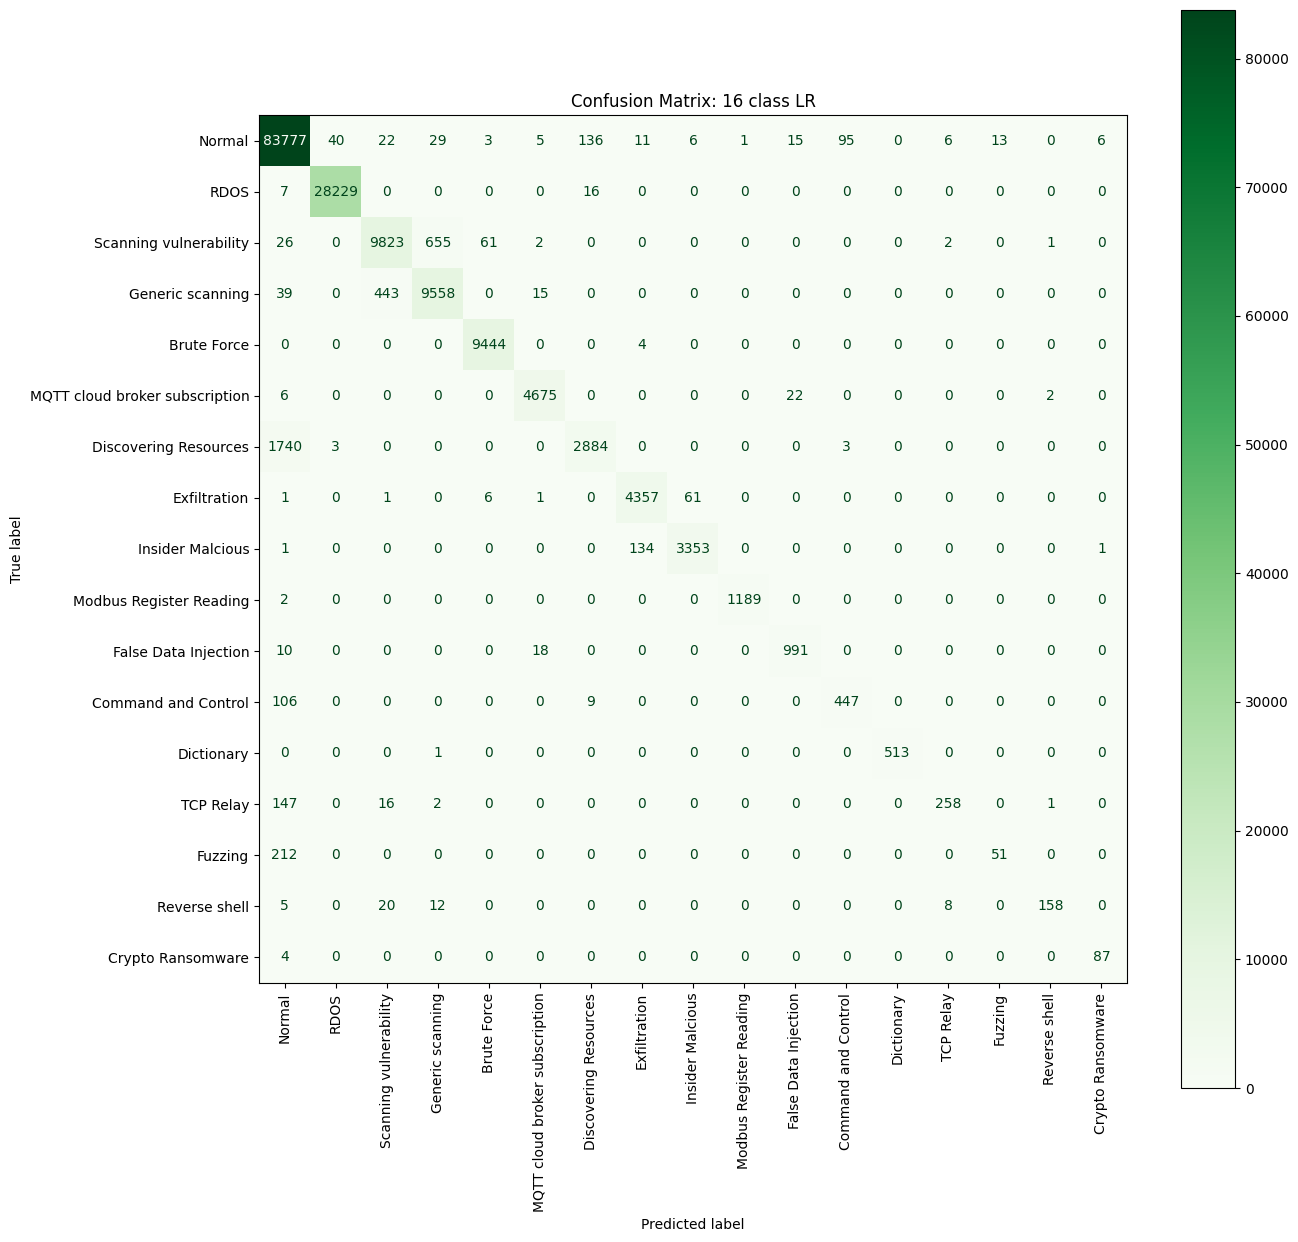


Classification report:
 {'0': {'precision': 0.9732119001428854, 'recall': 0.9953900077229252, 'f1-score': 0.9841760255627086, 'support': 84165.0}, '1': {'precision': 0.9984790605546123, 'recall': 0.9991858983434801, 'f1-score': 0.9988323543981319, 'support': 28252.0}, '2': {'precision': 0.9513801452784504, 'recall': 0.9293282876064333, 'f1-score': 0.9402249341947835, 'support': 10570.0}, '3': {'precision': 0.9318514185434338, 'recall': 0.9505718547986076, 'f1-score': 0.9411185506104766, 'support': 10055.0}, '4': {'precision': 0.9926424216943451, 'recall': 0.9995766299745978, 'f1-score': 0.9960974580740428, 'support': 9448.0}, '5': {'precision': 0.991306191687871, 'recall': 0.9936238044633369, 'f1-score': 0.9924636450482963, 'support': 4705.0}, '6': {'precision': 0.9471264367816092, 'recall': 0.6228941684665227, 'f1-score': 0.7515309446254071, 'support': 4630.0}, '7': {'precision': 0.9669329782512206, 'recall': 0.984187937655297, 'f1-score': 0.975484159856711, 'support': 4427.0}, '8': 

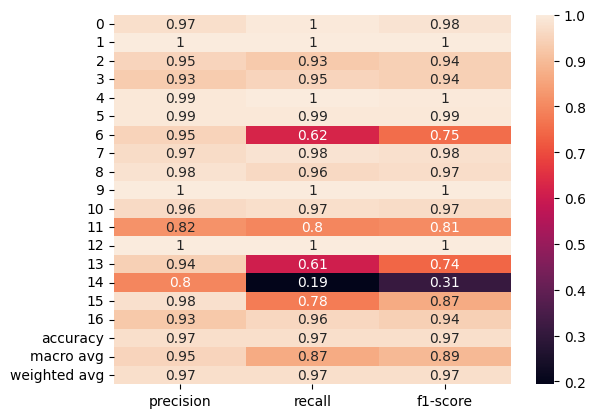

In [82]:
results_19_lr = eval_metrics(clf, X_test , y_test, attacks_19, "Confusion Matrix: 16 class LR")

#### 3-Folds

Classification report:
 {'0': {'precision': 0.972372659991293, 'recall': 0.9951612903225806, 'f1-score': 0.9836350024221605, 'support': 112220.0}, '1': {'precision': 0.998726148456782, 'recall': 0.9990177860366339, 'f1-score': 0.998871945959576, 'support': 37670.0}, '2': {'precision': 0.9525959367945824, 'recall': 0.9281963956293459, 'f1-score': 0.9402378984439573, 'support': 14094.0}, '3': {'precision': 0.9301631226332654, 'recall': 0.9527112702319683, 'f1-score': 0.9413021850473487, 'support': 13407.0}, '4': {'precision': 0.9943922281020456, 'recall': 0.9993649785680266, 'f1-score': 0.9968724019161488, 'support': 12598.0}, '5': {'precision': 0.9887444514901712, 'recall': 0.994261119081779, 'f1-score': 0.9914951116763374, 'support': 6273.0}, '6': {'precision': 0.9480486568677141, 'recall': 0.6060262433176737, 'f1-score': 0.7394011265935369, 'support': 6173.0}, '7': {'precision': 0.9675910457734714, 'recall': 0.981362250084717, 'f1-score': 0.9744279946164198, 'support': 5902.0}, '8': {

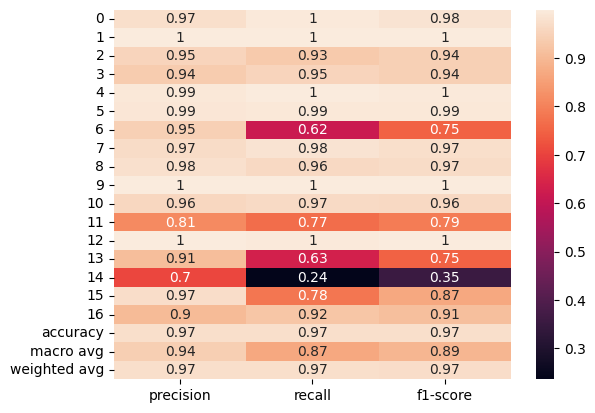

In [50]:
clf = LogisticRegression( C = 1000, penalty = 'l2')
lr_3_folds_class_19 = folds(clf, X_train, y_train, 3)

#### 5-Folds

Classification report:
 {'0': {'precision': 0.9732963538414625, 'recall': 0.9954850591100813, 'f1-score': 0.9842656700856833, 'support': 67332.0}, '1': {'precision': 0.998717324959087, 'recall': 0.9990266348110787, 'f1-score': 0.9988719559399261, 'support': 22602.0}, '2': {'precision': 0.9582521908471275, 'recall': 0.9309447794726262, 'f1-score': 0.9444011275715228, 'support': 8457.0}, '3': {'precision': 0.9353390755792794, 'recall': 0.9583592293349906, 'f1-score': 0.9467092337917485, 'support': 8045.0}, '4': {'precision': 0.9929031410172164, 'recall': 0.999603069595131, 'f1-score': 0.9962418408386629, 'support': 7558.0}, '5': {'precision': 0.9920361029997345, 'recall': 0.9930906191868191, 'f1-score': 0.9925630810092961, 'support': 3763.0}, '6': {'precision': 0.9534596375617792, 'recall': 0.625168782068593, 'f1-score': 0.7551786005545588, 'support': 3703.0}, '7': {'precision': 0.9638989169675091, 'recall': 0.9799548277809147, 'f1-score': 0.9718605627887443, 'support': 3542.0}, '8': {'p

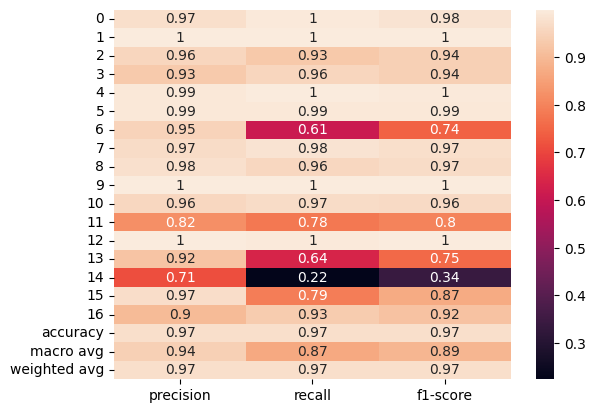

In [51]:
lr_5_folds_class_19 = folds(clf, X_train, y_train, 5)

#### 7-folds

Classification report:
 {'0': {'precision': 0.9724891805676901, 'recall': 0.9951762137436324, 'f1-score': 0.9837019072673463, 'support': 48095.0}, '1': {'precision': 0.9988233108317335, 'recall': 0.9990089197224975, 'f1-score': 0.998916106655105, 'support': 16144.0}, '2': {'precision': 0.9557955120634385, 'recall': 0.9379139072847682, 'f1-score': 0.9467702849502798, 'support': 6040.0}, '3': {'precision': 0.9388803287108372, 'recall': 0.954403063000348, 'f1-score': 0.9465780616207818, 'support': 5746.0}, '4': {'precision': 0.9917309812568909, 'recall': 0.9996295610298204, 'f1-score': 0.9956646065861082, 'support': 5399.0}, '5': {'precision': 0.9896334690855239, 'recall': 0.9940498326515433, 'f1-score': 0.9918367346938775, 'support': 2689.0}, '6': {'precision': 0.948051948051948, 'recall': 0.6069538926681783, 'f1-score': 0.7400921658986174, 'support': 2646.0}, '7': {'precision': 0.9665239392759829, 'recall': 0.9818109924871491, 'f1-score': 0.9741074931345626, 'support': 2529.0}, '8': {'p

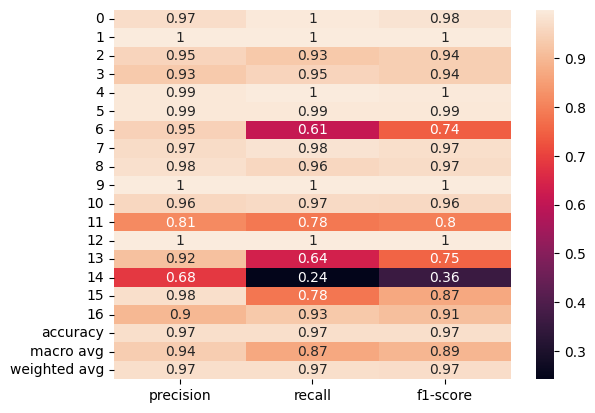

In [52]:
lr_7_folds_class_19 = folds(clf, X_train, y_train, 7)

#### 10-Folds

Classification report:
 {'0': {'precision': 0.9732941996977799, 'recall': 0.9948612843818689, 'f1-score': 0.9839595757807221, 'support': 33666.0}, '1': {'precision': 0.9989378651088688, 'recall': 0.9986726838332891, 'f1-score': 0.9988052568697731, 'support': 11301.0}, '2': {'precision': 0.9521507974867085, 'recall': 0.9318826868495743, 'f1-score': 0.9419077217308153, 'support': 4228.0}, '3': {'precision': 0.932732147209359, 'recall': 0.951516658378916, 'f1-score': 0.9420307692307691, 'support': 4022.0}, '4': {'precision': 0.9944736842105263, 'recall': 1.0, 'f1-score': 0.9972291859084312, 'support': 3779.0}, '5': {'precision': 0.99308142629058, 'recall': 0.9914984059511158, 'f1-score': 0.9922892847646902, 'support': 1882.0}, '6': {'precision': 0.9459459459459459, 'recall': 0.6236501079913607, 'f1-score': 0.7517084282460137, 'support': 1852.0}, '7': {'precision': 0.9768883878241262, 'recall': 0.9785431959345002, 'f1-score': 0.9777150916784202, 'support': 1771.0}, '8': {'precision': 0.972

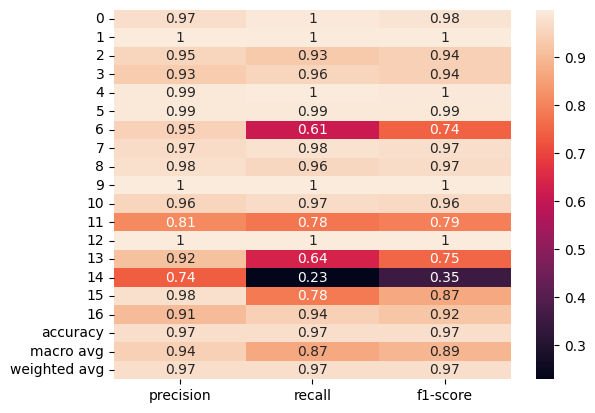

In [53]:
lr_10_folds_class_19 = folds(clf, X_train, y_train, 10)

#### 14-folds

Classification report:
 {'0': {'precision': 0.9738405207485761, 'recall': 0.9953842315369261, 'f1-score': 0.9844945299004689, 'support': 24048.0}, '1': {'precision': 0.9981433345711103, 'recall': 0.9990089197224975, 'f1-score': 0.9985759395703052, 'support': 8072.0}, '2': {'precision': 0.9564921821889871, 'recall': 0.9317880794701987, 'f1-score': 0.9439785306943979, 'support': 3020.0}, '3': {'precision': 0.9343983684568321, 'recall': 0.9568395405499478, 'f1-score': 0.9454858125537403, 'support': 2873.0}, '4': {'precision': 0.9944710652414301, 'recall': 0.9992592592592593, 'f1-score': 0.9968594125254018, 'support': 2700.0}, '5': {'precision': 0.9933035714285714, 'recall': 0.9925650557620818, 'f1-score': 0.9929341762737076, 'support': 1345.0}, '6': {'precision': 0.9556818181818182, 'recall': 0.63567649281935, 'f1-score': 0.7635043123014073, 'support': 1323.0}, '7': {'precision': 0.9659442724458205, 'recall': 0.9873417721518988, 'f1-score': 0.9765258215962442, 'support': 1264.0}, '8': {'p

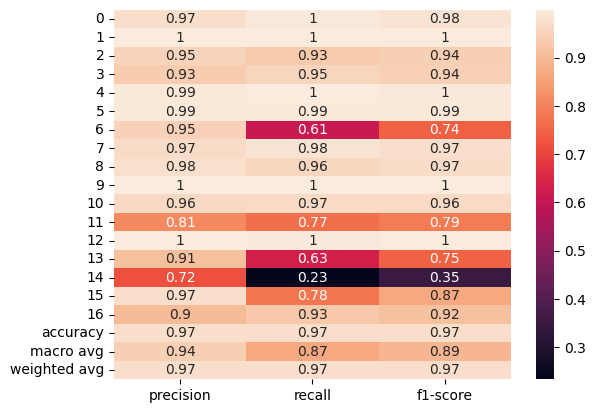

In [54]:
lr_14_folds_class_19 = folds(clf, X_train, y_train, 14)

#### Folds

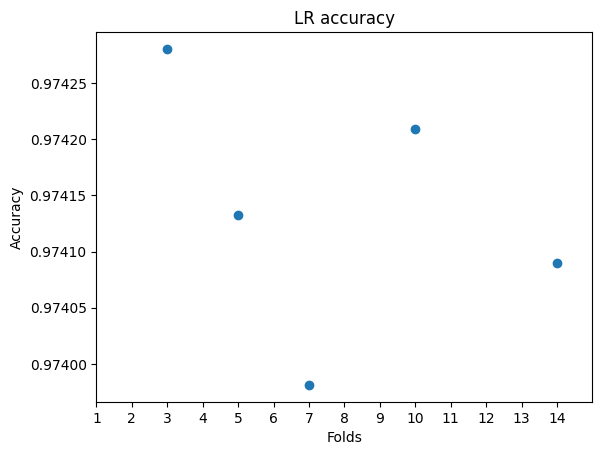

In [61]:
x = [3,5,7,10,14]
# corresponding y axis values
y = [lr_3_folds_class_19[3]["accuracy"], lr_5_folds_class_19[5]["accuracy"], lr_7_folds_class_19[7]["accuracy"], 
     lr_10_folds_class_19[10]["accuracy"], lr_14_folds_class_19[14]["accuracy"]]
 
# plotting the points 
plt.scatter(x, y, marker='o')
 
# naming the x axis
plt.xlabel("Folds")
plt.xlim(1,15)

dim=np.arange(1,15,1)
plt.xticks(dim)
# naming the y axis
plt.ylabel('Accuracy')
 
# giving a title to my graph
plt.title('LR accuracy')
 
# function to show the plot
plt.show()

### SVM

In [60]:
svc=svm.LinearSVC()

parameter_grid = {'C': [ 10, 100],
              'loss': ['hinge','squared_hinge']}

grid_search = GridSearchCV(svc, param_grid = parameter_grid,
                          cv =StratifiedKFold(5), verbose = 3)

model = grid_search.fit(X_train, y_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..................C=10, loss=hinge;, score=0.971 total time=23.6min
[CV 2/5] END ..................C=10, loss=hinge;, score=0.970 total time=24.7min
[CV 3/5] END ..................C=10, loss=hinge;, score=0.971 total time=19.7min
[CV 4/5] END ..................C=10, loss=hinge;, score=0.971 total time=23.9min
[CV 5/5] END ..................C=10, loss=hinge;, score=0.971 total time=23.8min
[CV 1/5] END ..........C=10, loss=squared_hinge;, score=0.968 total time=26.7min
[CV 2/5] END ..........C=10, loss=squared_hinge;, score=0.971 total time=27.3min
[CV 3/5] END ..........C=10, loss=squared_hinge;, score=0.968 total time=25.3min
[CV 4/5] END ..........C=10, loss=squared_hinge;, score=0.972 total time=22.2min
[CV 5/5] END ..........C=10, loss=squared_hinge;, score=0.970 total time=23.8min
[CV 1/5] END .................C=100, loss=hinge;, score=0.969 total time=27.8min
[CV 2/5] END .................C=100, loss=hinge;,

In [83]:
svc=svm.LinearSVC(C = 10, loss = 'hinge')
svc.fit(X_train, y_train)

LinearSVC(C=10, loss='hinge')


Model Accuracy:
 0.9710562899370763

Confusion matrix:
 [[83752    26    38    27     7     2    35    14     2    66    19   123
     31     0    20     2     1]
 [   19 28233     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [   34     0  9416   959    31     4     0     0     0    13     1     1
    109     1     1     0     0]
 [   26     0   306  9646     0    18     0     0     0     0     0     0
      7     0     0    52     0]
 [    0     0    25     0  9423     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    1     0     1     0     0  4679     0     0     0     0    21     0
      1     0     2     0     0]
 [ 1979     0     0     0     0     0  2647     0     0     0     0     4
      0     0     0     0     0]
 [    0     0     1     0     6     1     0  4405    14     0     0     0
      0     0     0     0     0]
 [    3     0     0     0     1     0     0   121  3364     0     0     0
      0     0

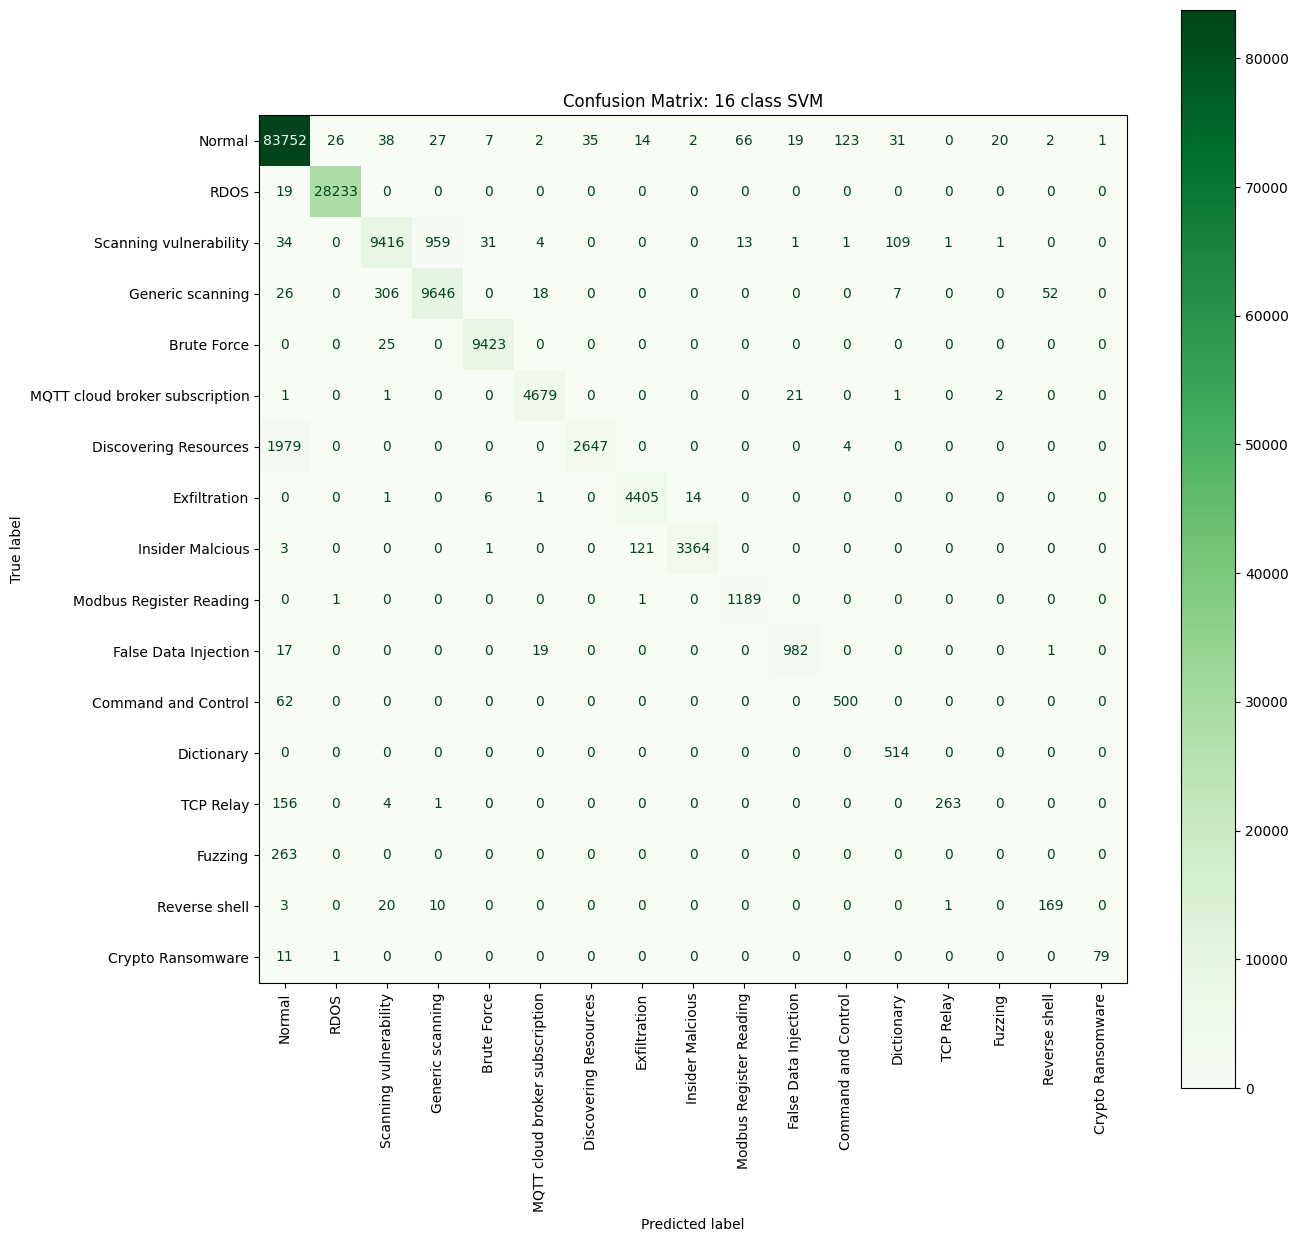


Classification report:
 {'0': {'precision': 0.9701827954498066, 'recall': 0.9950929721380621, 'f1-score': 0.9824800136077565, 'support': 84165.0}, '1': {'precision': 0.9990092353419907, 'recall': 0.9993274812402662, 'f1-score': 0.9991683329499408, 'support': 28252.0}, '2': {'precision': 0.9597390683926206, 'recall': 0.8908230842005677, 'f1-score': 0.9239978411265394, 'support': 10570.0}, '3': {'precision': 0.9063234050549657, 'recall': 0.9593237195425162, 'f1-score': 0.9320707314716398, 'support': 10055.0}, '4': {'precision': 0.9952471482889734, 'recall': 0.9973539373412362, 'f1-score': 0.9962994290547685, 'support': 9448.0}, '5': {'precision': 0.990683887359729, 'recall': 0.9944739638682253, 'f1-score': 0.9925753075943996, 'support': 4705.0}, '6': {'precision': 0.9869500372856077, 'recall': 0.5717062634989201, 'f1-score': 0.7240153172866521, 'support': 4630.0}, '7': {'precision': 0.9700506496366439, 'recall': 0.9950304946916648, 'f1-score': 0.9823818019625334, 'support': 4427.0}, '8'

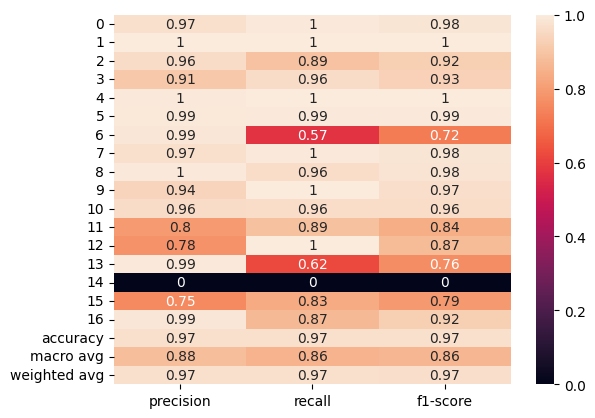

In [84]:
results_19_svm = eval_metrics(svc, X_test , y_test, attacks_19, "Confusion Matrix: 16 class SVM")

#### 3-Folds

Classification report:
 {'0': {'precision': 0.9695812871991532, 'recall': 0.9958296203885225, 'f1-score': 0.9825301787425597, 'support': 112220.0}, '1': {'precision': 0.9995219758332227, 'recall': 0.9991239713299708, 'f1-score': 0.9993229339528709, 'support': 37670.0}, '2': {'precision': 0.9622395833333334, 'recall': 0.8913722151270044, 'f1-score': 0.925451197053407, 'support': 14094.0}, '3': {'precision': 0.9089118660758247, 'recall': 0.9638248676064742, 'f1-score': 0.9355632783087171, 'support': 13407.0}, '4': {'precision': 0.9918897637795275, 'recall': 0.9999206223210033, 'f1-score': 0.9958890030832477, 'support': 12598.0}, '5': {'precision': 0.9892149088025377, 'recall': 0.994261119081779, 'f1-score': 0.9917315948481477, 'support': 6273.0}, '6': {'precision': 0.98982763492512, 'recall': 0.5674712457476105, 'f1-score': 0.7213756177924218, 'support': 6173.0}, '7': {'precision': 0.9872247436543957, 'recall': 0.9950864113859709, 'f1-score': 0.991139988186651, 'support': 5902.0}, '8': {

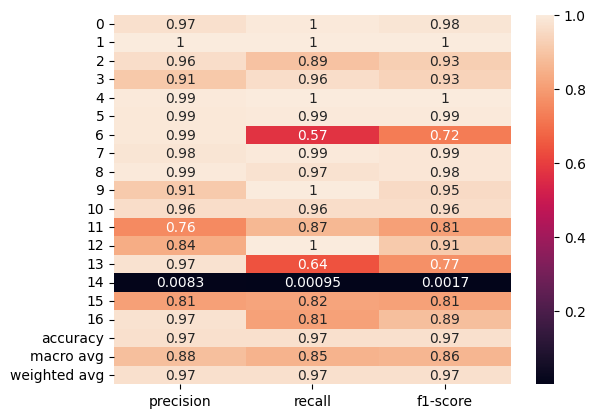

In [55]:
svc=svm.LinearSVC(C = 10, loss = 'hinge')
svm_3_folds_class_19 = folds(svc, X_train, y_train, 3)

#### 5-Folds

Classification report:
 {'0': {'precision': 0.9706180638057431, 'recall': 0.9949800986158142, 'f1-score': 0.9826481071329041, 'support': 67332.0}, '1': {'precision': 0.9989385697227013, 'recall': 0.9993363419166446, 'f1-score': 0.9991374162298454, 'support': 22602.0}, '2': {'precision': 0.9641535910192627, 'recall': 0.8936975286744708, 'f1-score': 0.9275895925380462, 'support': 8457.0}, '3': {'precision': 0.908219338243891, 'recall': 0.9655686761963953, 'f1-score': 0.9360163875165682, 'support': 8045.0}, '4': {'precision': 0.9941960163566812, 'recall': 0.997221487165917, 'f1-score': 0.9957064535306164, 'support': 7558.0}, '5': {'precision': 0.9928495762711864, 'recall': 0.996279564177518, 'f1-score': 0.9945616129460141, 'support': 3763.0}, '6': {'precision': 0.9879907621247113, 'recall': 0.577639751552795, 'f1-score': 0.7290388548057259, 'support': 3703.0}, '7': {'precision': 0.9778085991678225, 'recall': 0.9952004517221908, 'f1-score': 0.9864278718343361, 'support': 3542.0}, '8': {'pr

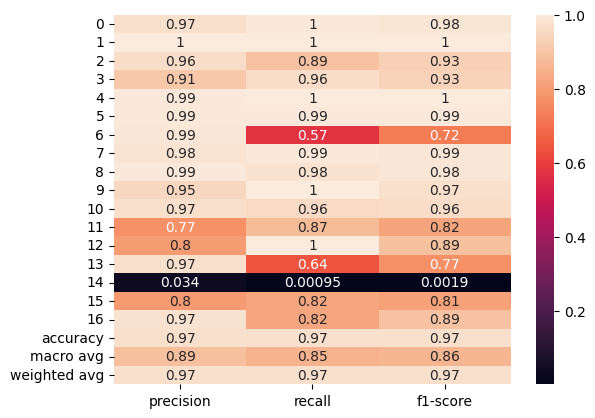

In [56]:
svm_5_folds_class_19 = folds(svc, X_train, y_train, 5)

#### 7-Folds

Classification report:
 {'0': {'precision': 0.9694468050665696, 'recall': 0.9961950306684687, 'f1-score': 0.9826389244952163, 'support': 48095.0}, '1': {'precision': 0.9992567358315267, 'recall': 0.999318632309217, 'f1-score': 0.9992876831118955, 'support': 16144.0}, '2': {'precision': 0.9661870503597122, 'recall': 0.8894039735099337, 'f1-score': 0.9262068965517242, 'support': 6040.0}, '3': {'precision': 0.904319478402608, 'recall': 0.9655412460842325, 'f1-score': 0.9339281205285751, 'support': 5746.0}, '4': {'precision': 0.9957454679985202, 'recall': 0.9970364882385627, 'f1-score': 0.9963905599259603, 'support': 5399.0}, '5': {'precision': 0.9896602658788775, 'recall': 0.9966530308664932, 'f1-score': 0.9931443394478414, 'support': 2689.0}, '6': {'precision': 0.9920582395764395, 'recall': 0.5665154950869237, 'f1-score': 0.7211931681501084, 'support': 2646.0}, '7': {'precision': 0.9808219178082191, 'recall': 0.9909054962435745, 'f1-score': 0.9858379228953579, 'support': 2529.0}, '8': {'

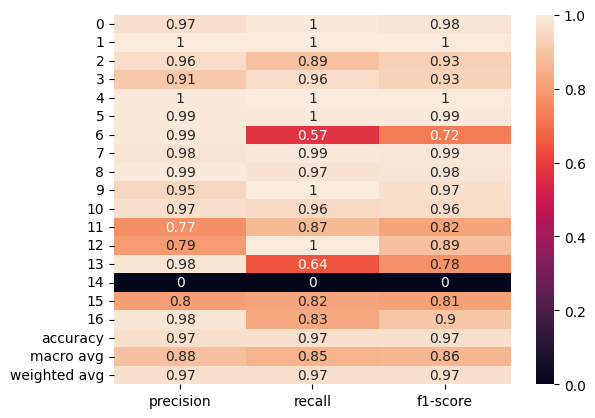

In [57]:
svm_7_folds_class_19 = folds(svc, X_train, y_train, 7)

#### 10-Folds

Classification report:
 {'0': {'precision': 0.9691142022614881, 'recall': 0.9953959484346224, 'f1-score': 0.9820792732068284, 'support': 33666.0}, '1': {'precision': 0.9990269792127378, 'recall': 0.9993805857888682, 'f1-score': 0.9992037512164912, 'support': 11301.0}, '2': {'precision': 0.9654996166624074, 'recall': 0.8935666982024598, 'f1-score': 0.9281415059574991, 'support': 4228.0}, '3': {'precision': 0.9097091932457786, 'recall': 0.9644455494778718, 'f1-score': 0.9362780593772627, 'support': 4022.0}, '4': {'precision': 0.9963041182682154, 'recall': 0.9986768986504366, 'f1-score': 0.9974890973965905, 'support': 3779.0}, '5': {'precision': 0.9941675503711559, 'recall': 0.9962805526036131, 'f1-score': 0.9952229299363058, 'support': 1882.0}, '6': {'precision': 0.9831932773109243, 'recall': 0.5685745140388769, 'f1-score': 0.7204926445432775, 'support': 1852.0}, '7': {'precision': 0.9766666666666667, 'recall': 0.9926595143986449, 'f1-score': 0.9845981517782134, 'support': 1771.0}, '8': 

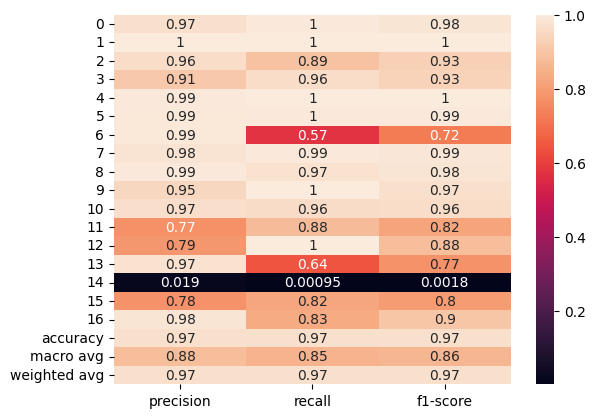

In [58]:
svm_10_folds_class_19 = folds(svc, X_train, y_train, 10)

#### 14-Folds

Classification report:
 {'0': {'precision': 0.9694158632423235, 'recall': 0.9951347305389222, 'f1-score': 0.9821069479213691, 'support': 24048.0}, '1': {'precision': 0.9988851727982163, 'recall': 0.9990089197224975, 'f1-score': 0.9989470424279964, 'support': 8072.0}, '2': {'precision': 0.9552134359692093, 'recall': 0.9039735099337748, 'f1-score': 0.9288873766587273, 'support': 3020.0}, '3': {'precision': 0.9173306772908366, 'recall': 0.9617124956491472, 'f1-score': 0.9389974511469837, 'support': 2873.0}, '4': {'precision': 0.9930121368150056, 'recall': 1.0, 'f1-score': 0.9964938180476103, 'support': 2700.0}, '5': {'precision': 0.9867452135493373, 'recall': 0.9962825278810409, 'f1-score': 0.9914909359970403, 'support': 1345.0}, '6': {'precision': 0.9891156462585035, 'recall': 0.5495086923658352, 'f1-score': 0.706511175898931, 'support': 1323.0}, '7': {'precision': 0.9835552075176194, 'recall': 0.9936708860759493, 'f1-score': 0.9885871704053522, 'support': 1264.0}, '8': {'precision': 0.9

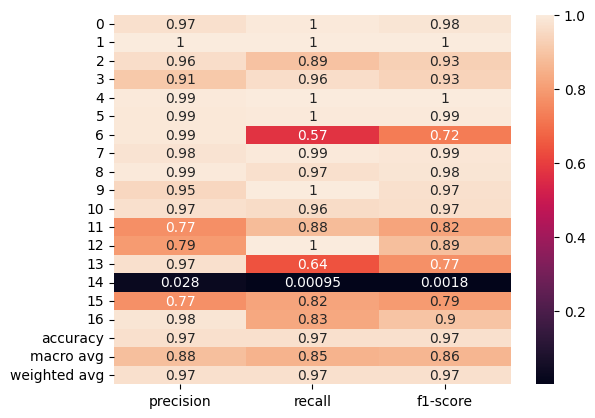

In [59]:
svm_14_folds_class_19 = folds(svc, X_train, y_train, 14)

#### Folds

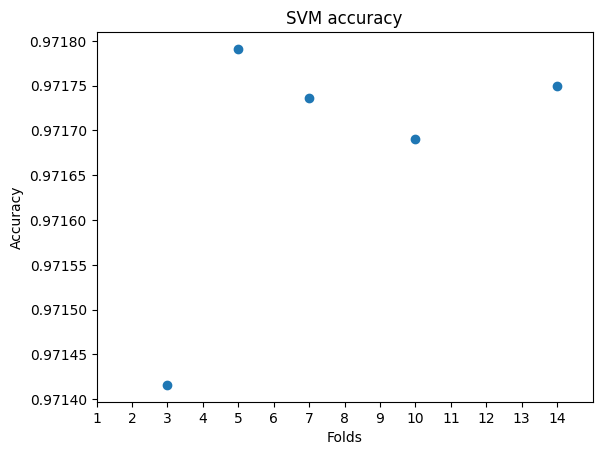

In [62]:
x = [3,5,7,10,14]
# corresponding y axis values
y = [svm_3_folds_class_19[3]["accuracy"], svm_5_folds_class_19[5]["accuracy"], svm_7_folds_class_19[7]["accuracy"], 
     svm_10_folds_class_19[10]["accuracy"], svm_14_folds_class_19[14]["accuracy"]]
 
# plotting the points 
plt.scatter(x, y, marker='o')
 
# naming the x axis
plt.xlabel("Folds")
plt.xlim(1,15)

dim=np.arange(1,15,1)
plt.xticks(dim)
# naming the y axis
plt.ylabel('Accuracy')
 
# giving a title to my graph
plt.title('SVM accuracy')
 
# function to show the plot
plt.show()

### NB

In [58]:
gnb_clf = GaussianNB()

parameter_grid = {
    'var_smoothing': [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]
                 }

grid_search = GridSearchCV(gnb_clf, param_grid = parameter_grid, 
                          cv =StratifiedKFold(7), verbose = 2)

model = grid_search.fit(X_train, class2_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 7 folds for each of 14 candidates, totalling 98 fits
[CV] END .................................var_smoothing=0.01; total time=   3.6s
[CV] END .................................var_smoothing=0.01; total time=   3.3s
[CV] END .................................var_smoothing=0.01; total time=   3.1s
[CV] END .................................var_smoothing=0.01; total time=   3.2s
[CV] END .................................var_smoothing=0.01; total time=   3.2s
[CV] END .................................var_smoothing=0.01; total time=   3.1s
[CV] END .................................var_smoothing=0.01; total time=   3.1s
[CV] END ................................var_smoothing=0.001; total time=   3.3s
[CV] END ................................var_smoothing=0.001; total time=   3.2s
[CV] END ................................var_smoothing=0.001; total time=   3.3s
[CV] END ................................var_smoothing=0.001; total time=   3.2s
[CV] END ................................var_smo

In [85]:
gnb = GaussianNB(var_smoothing= 0.01)
gnb.fit(X_train, y_train)

GaussianNB(var_smoothing=0.01)


Model Accuracy:
 0.49099434173942735

Confusion matrix:
 [[ 9853   161   386    59   383 18344 34651   110  1136     4    93  4238
     76   807 13656    81   127]
 [    0 28178     0     0     0     0    26     0     0     0     0    48
      0     0     0     0     0]
 [   12     0  3911  4912  1573     2     0     0     0     2     0     3
    140    12     3     0     0]
 [   11     0   200  9690     0    16     0     0     0     0     0     7
      0   101     0     4    26]
 [    0     0     0     0  9410     0     0     7    31     0     0     0
      0     0     0     0     0]
 [   10     0   207     0     0  3853     0     0     0     0   623     0
      0     0     0     5     7]
 [    6    21     0     0     0     0  4587     0     0     0     0    15
      0     0     0     1     0]
 [    1     0    12     1    25    11     0  3444   930     0     0     0
      0     0     0     1     2]
 [    3     0     0     0     0     0     0    29  3453     0     0     0
      0     

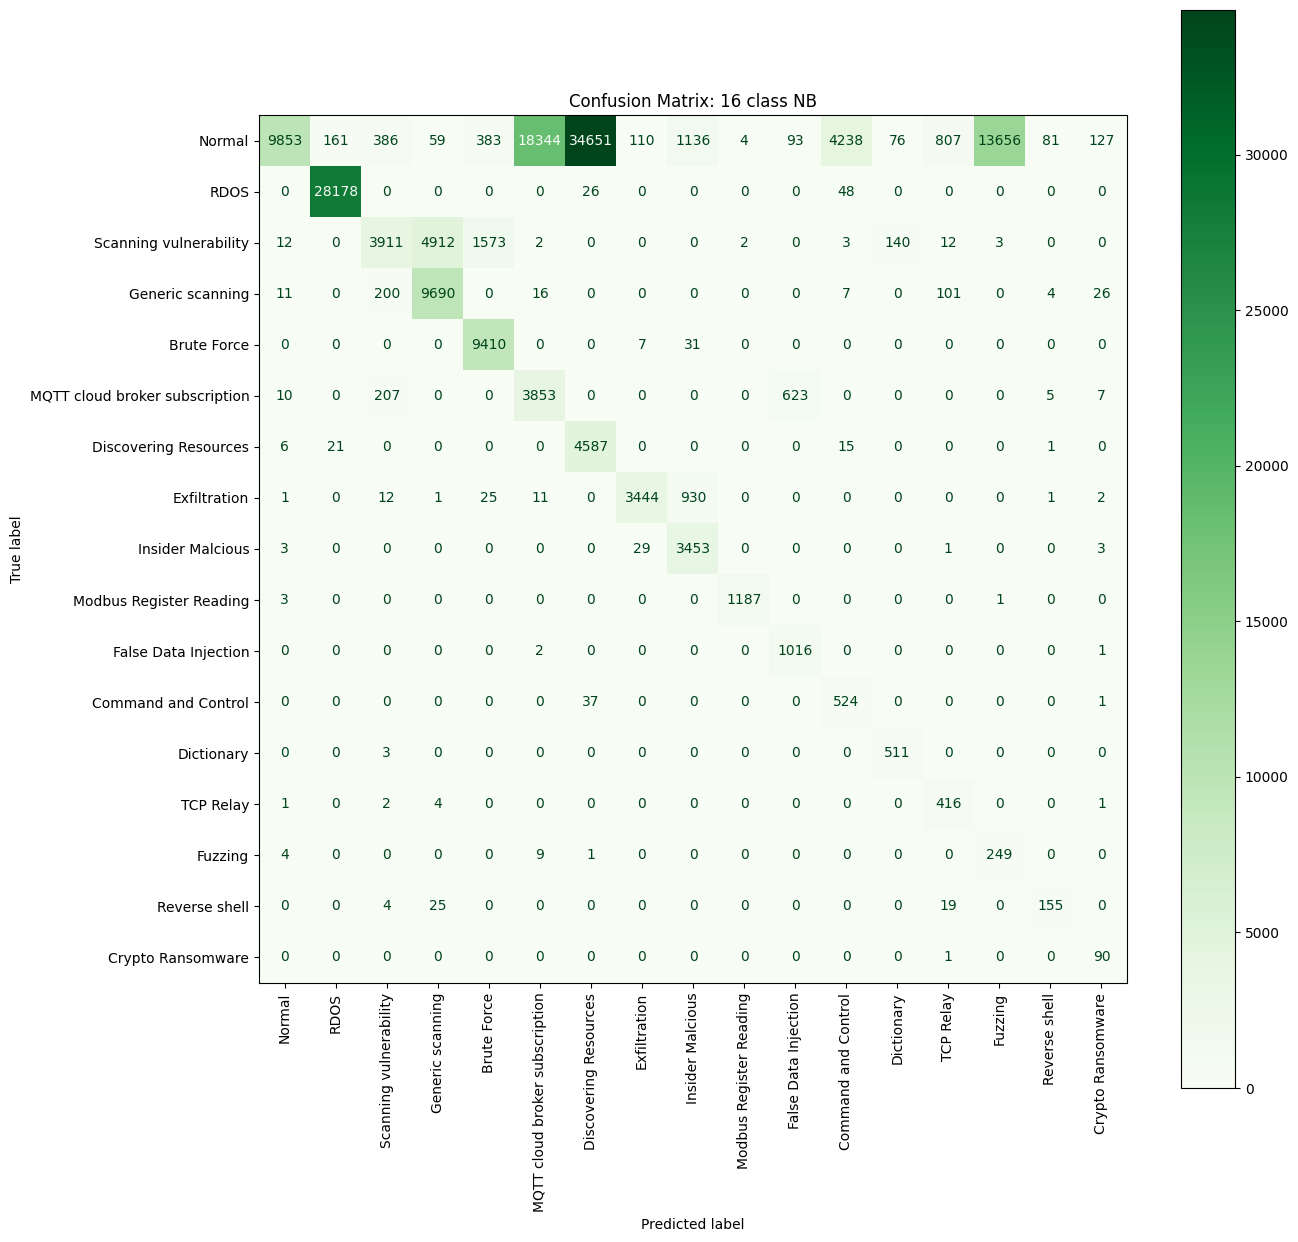


Classification report:
 {'0': {'precision': 0.9948505654281099, 'recall': 0.11706766470623181, 'f1-score': 0.20948452731505596, 'support': 84165.0}, '1': {'precision': 0.9935825105782793, 'recall': 0.9973807164094577, 'f1-score': 0.9954779905320427, 'support': 28252.0}, '2': {'precision': 0.8277248677248678, 'recall': 0.37000946073793756, 'f1-score': 0.5114089571755476, 'support': 10570.0}, '3': {'precision': 0.6595875025525832, 'recall': 0.9636996519144704, 'f1-score': 0.783156873838196, 'support': 10055.0}, '4': {'precision': 0.8260907734176104, 'recall': 0.995977984758679, 'f1-score': 0.9031143528960123, 'support': 9448.0}, '5': {'precision': 0.17326977559922652, 'recall': 0.8189160467587673, 'f1-score': 0.28602182466038156, 'support': 4705.0}, '6': {'precision': 0.11671161772937765, 'recall': 0.9907127429805616, 'f1-score': 0.20882272603113905, 'support': 4630.0}, '7': {'precision': 0.9593314763231198, 'recall': 0.7779534673593856, 'f1-score': 0.859174254708744, 'support': 4427.0}

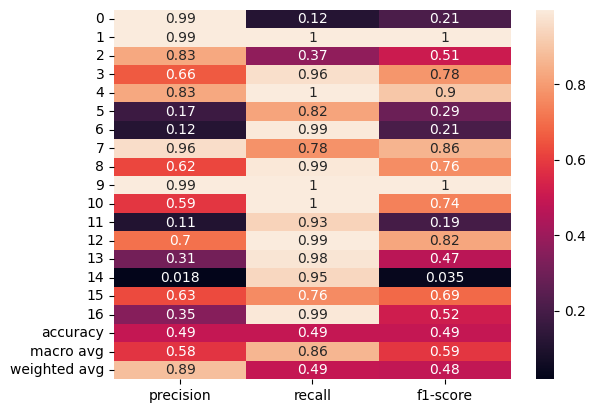

In [86]:
results_19_nb = eval_metrics(gnb, X_test , y_test, attacks_19, "Confusion Matrix: 16 class NB")

#### 3-Folds

In [64]:
gnb = GaussianNB(var_smoothing= 0.01)

Classification report:
 {'0': {'precision': 0.9964233457974313, 'recall': 0.10923186597754411, 'f1-score': 0.19688087245627278, 'support': 112220.0}, '1': {'precision': 0.9942268478059374, 'recall': 0.9966286169365542, 'f1-score': 0.995426283623444, 'support': 37670.0}, '2': {'precision': 0.7990733590733591, 'recall': 0.3671065701717043, 'f1-score': 0.5030871700131265, 'support': 14094.0}, '3': {'precision': 0.6552436627526079, 'recall': 0.9697918997538599, 'f1-score': 0.7820751879699248, 'support': 13407.0}, '4': {'precision': 0.8215034049240441, 'recall': 0.9958723606921733, 'f1-score': 0.9003229278794403, 'support': 12598.0}, '5': {'precision': 0.17535097192224622, 'recall': 0.8283118125298901, 'f1-score': 0.28943044144269603, 'support': 6273.0}, '6': {'precision': 0.11544210864917027, 'recall': 0.9883363032561153, 'f1-score': 0.20673647114635219, 'support': 6173.0}, '7': {'precision': 0.9451941042142412, 'recall': 0.7714334124025753, 'f1-score': 0.8495195447336504, 'support': 5902.

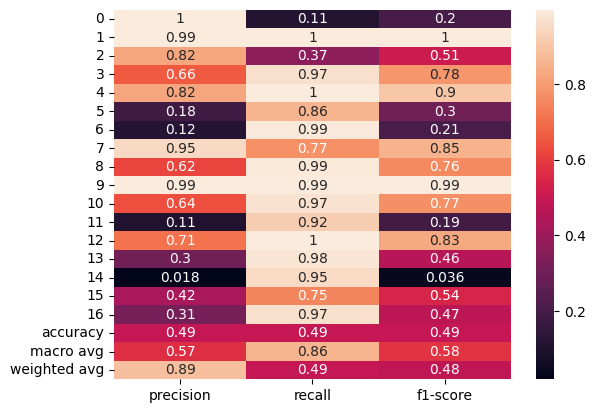

In [65]:
nb_3_folds_class_19 = folds(gnb, X_train, y_train, 3)

#### 5-Folds

Classification report:
 {'0': {'precision': 0.9957537154989384, 'recall': 0.11144775144062259, 'f1-score': 0.20045947534327083, 'support': 67332.0}, '1': {'precision': 0.9947019867549669, 'recall': 0.9968144411998938, 'f1-score': 0.9957570936091222, 'support': 22602.0}, '2': {'precision': 0.7977557411273486, 'recall': 0.36147570060305073, 'f1-score': 0.4975181056229148, 'support': 8457.0}, '3': {'precision': 0.6569330745210566, 'recall': 0.9675574891236793, 'f1-score': 0.7825475017593245, 'support': 8045.0}, '4': {'precision': 0.8220765027322404, 'recall': 0.9952368351415718, 'f1-score': 0.9004069906631553, 'support': 7558.0}, '5': {'precision': 0.17520125223613595, 'recall': 0.8328461334041988, 'f1-score': 0.28950163964712944, 'support': 3763.0}, '6': {'precision': 0.11628644858330425, 'recall': 0.9897380502295436, 'f1-score': 0.20812038614423625, 'support': 3703.0}, '7': {'precision': 0.9521829521829522, 'recall': 0.7758328627893846, 'f1-score': 0.8550093341630368, 'support': 3542.0}

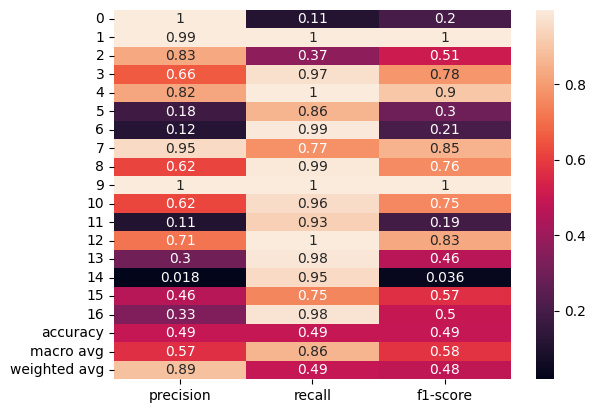

In [66]:
nb_5_folds_class_19 = folds(gnb, X_train, y_train, 5)

#### 7-Folds

Classification report:
 {'0': {'precision': 0.997093023255814, 'recall': 0.11410749558166129, 'f1-score': 0.2047799399242523, 'support': 48095.0}, '1': {'precision': 0.9937068114511353, 'recall': 0.9976461843409317, 'f1-score': 0.9956726013847675, 'support': 16144.0}, '2': {'precision': 0.8371023380605596, 'recall': 0.3615894039735099, 'f1-score': 0.5050294831772459, 'support': 6040.0}, '3': {'precision': 0.6568835454974069, 'recall': 0.9698920988513748, 'f1-score': 0.7832747716092762, 'support': 5746.0}, '4': {'precision': 0.8193450114242193, 'recall': 0.9962956102982033, 'f1-score': 0.8991975927783351, 'support': 5399.0}, '5': {'precision': 0.17846958174904942, 'recall': 0.8378579397545556, 'f1-score': 0.29425977927251357, 'support': 2689.0}, '6': {'precision': 0.11565286483623201, 'recall': 0.9901738473167044, 'f1-score': 0.20711462450592885, 'support': 2646.0}, '7': {'precision': 0.9518536350505536, 'recall': 0.7817319098457889, 'f1-score': 0.8584455058619193, 'support': 2529.0}, '

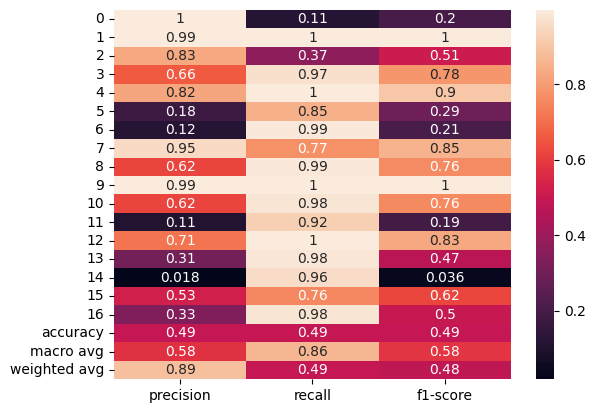

In [67]:
nb_7_folds_class_19 = folds(gnb, X_train, y_train, 7)

#### 10-Folds

Classification report:
 {'0': {'precision': 0.9969167523124358, 'recall': 0.11524980692686984, 'f1-score': 0.20661377070131529, 'support': 33666.0}, '1': {'precision': 0.9950569335334098, 'recall': 0.997522343155473, 'f1-score': 0.9962881131241714, 'support': 11301.0}, '2': {'precision': 0.8001014713343481, 'recall': 0.3729895931882687, 'f1-score': 0.5087917406033232, 'support': 4228.0}, '3': {'precision': 0.6615489593995223, 'recall': 0.9641969169567379, 'f1-score': 0.7847025495750708, 'support': 4022.0}, '4': {'precision': 0.8261538461538461, 'recall': 0.9947075946017465, 'f1-score': 0.9026293672709809, 'support': 3779.0}, '5': {'precision': 0.16982201564448476, 'recall': 0.79596174282678, 'f1-score': 0.2799215173315893, 'support': 1882.0}, '6': {'precision': 0.11664872395668419, 'recall': 0.9946004319654428, 'f1-score': 0.20880802584594457, 'support': 1852.0}, '7': {'precision': 0.9508310249307479, 'recall': 0.7752682100508187, 'f1-score': 0.8541213063763607, 'support': 1771.0}, '8'

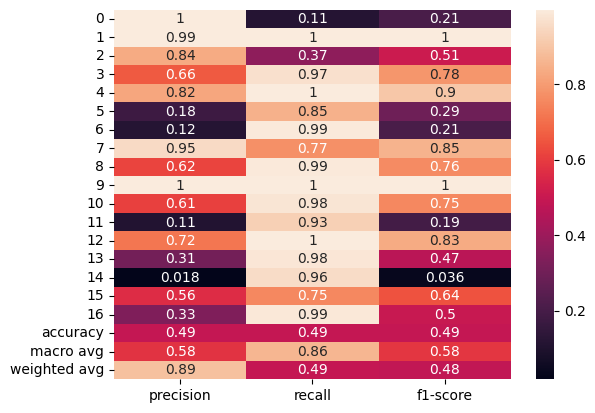

In [68]:
nb_10_folds_class_19 = folds(gnb, X_train, y_train, 10)

#### 14-Folds

Classification report:
 {'0': {'precision': 0.9951726698848867, 'recall': 0.11144377910844977, 'f1-score': 0.20044126995998654, 'support': 24048.0}, '1': {'precision': 0.9932157394843962, 'recall': 0.9975222993062438, 'f1-score': 0.9953643612089746, 'support': 8072.0}, '2': {'precision': 0.8384146341463414, 'recall': 0.36423841059602646, 'f1-score': 0.507848568790397, 'support': 3020.0}, '3': {'precision': 0.656301531213192, 'recall': 0.9697180647406892, 'f1-score': 0.7828041584714809, 'support': 2873.0}, '4': {'precision': 0.8214830637778456, 'recall': 0.997037037037037, 'f1-score': 0.9007863476660533, 'support': 2700.0}, '5': {'precision': 0.17305949864089398, 'recall': 0.8520446096654275, 'f1-score': 0.2876867076691351, 'support': 1345.0}, '6': {'precision': 0.11670378619153675, 'recall': 0.9901738473167044, 'f1-score': 0.20879821485495698, 'support': 1323.0}, '7': {'precision': 0.954679802955665, 'recall': 0.7666139240506329, 'f1-score': 0.8503729706011408, 'support': 1264.0}, '8':

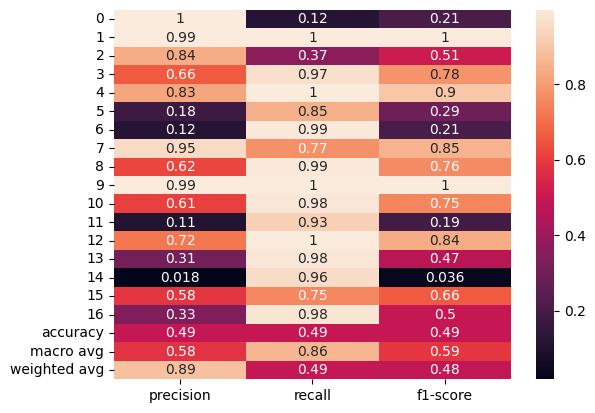

In [69]:
nb_14_folds_class_19 = folds(gnb, X_train, y_train, 14)

#### Folds

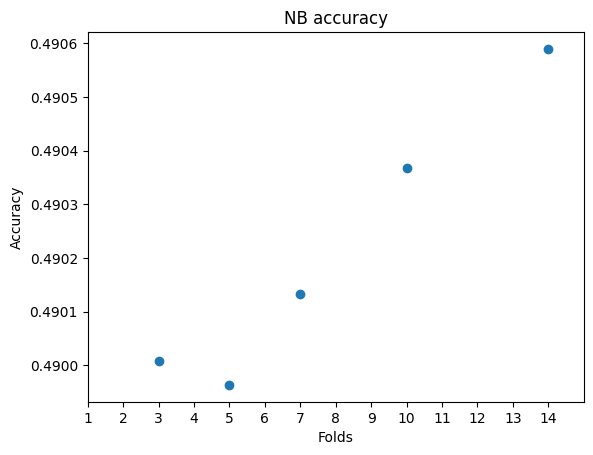

In [70]:
x = [3,5,7,10,14]
# corresponding y axis values
y = [nb_3_folds_class_19[3]["accuracy"], nb_5_folds_class_19[5]["accuracy"], nb_7_folds_class_19[7]["accuracy"], 
     nb_10_folds_class_19[10]["accuracy"], nb_14_folds_class_19[14]["accuracy"]]
 
# plotting the points 
plt.scatter(x, y, marker='o')
 
# naming the x axis
plt.xlabel("Folds")
plt.xlim(1,15)

dim=np.arange(1,15,1)
plt.xticks(dim)
# naming the y axis
plt.ylabel('Accuracy')
 
# giving a title to my graph
plt.title('NB accuracy')
 
# function to show the plot
plt.show()

### XGBoost

In [50]:
xgb_model = xgb.XGBClassifier()

params = { 
    'model__max_depth': [3],
    'model__learning_rate': [ 0.01, 0.1, 1 ],
    "model__gamma":[0, 0.25, 0.5, 0.75, 1],
    'model__n_estimators': [50, 75 ,100, 300],
    #"model__subsample":[0.9],
    #"model__colsample_bytree":[0.5],
    #"model__early_stopping_rounds": [10], 
}


grid_search = GridSearchCV(xgb_model, param_grid = params, cv =StratifiedKFold(5), verbose = 3, error_score="raise")
model = grid_search.fit(X_train, y_train)
print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 60 candidates, totalling 300 fits
[CV 1/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.998 total time= 1.8min
[CV 2/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.998 total time= 1.9min
[CV 3/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.998 total time= 1.9min
[CV 4/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.998 total time= 1.9min
[CV 5/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=50;, score=0.998 total time= 1.9min
[CV 1/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=75;, score=0.998 total time= 1.9min
[CV 2/5] END model__gamma=0, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=75;, score=0.998 total time= 1.8min
[CV 3/5] END m

In [60]:
xgb_model_19 = xgb.XGBClassifier(model__gamma = 0 ,model__learning_rate = 0.01, model_max_depth = 3 , model_n_estimators = 50)
xgb_model_19.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, model__gamma=0,
              model__learning_rate=0.01, model_max_depth=3,
              model_n_estimators=50, monotone_constraints=None,
              multi_strategy=None, ...)


Model Accuracy:
 0.9978415687039657

Confusion matrix:
 [[84047     0     1     0     1     1    59     0     0     1     3    21
      0    26     4     1     0]
 [    1 28251     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0 10570     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    2     0     0 10052     0     1     0     0     0     0     0     0
      0     0     0     0     0]
 [    0     0     0     0  9448     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    2     0     0     0     0  4702     0     0     0     0     1     0
      0     0     0     0     0]
 [   79     0     0     0     0     0  4551     0     0     0     0     0
      0     0     0     0     0]
 [    1     0     0     0     0     0     0  4425     1     0     0     0
      0     0     0     0     0]
 [    1     0     0     0     0     0     0     5  3483     0     0     0
      0     0

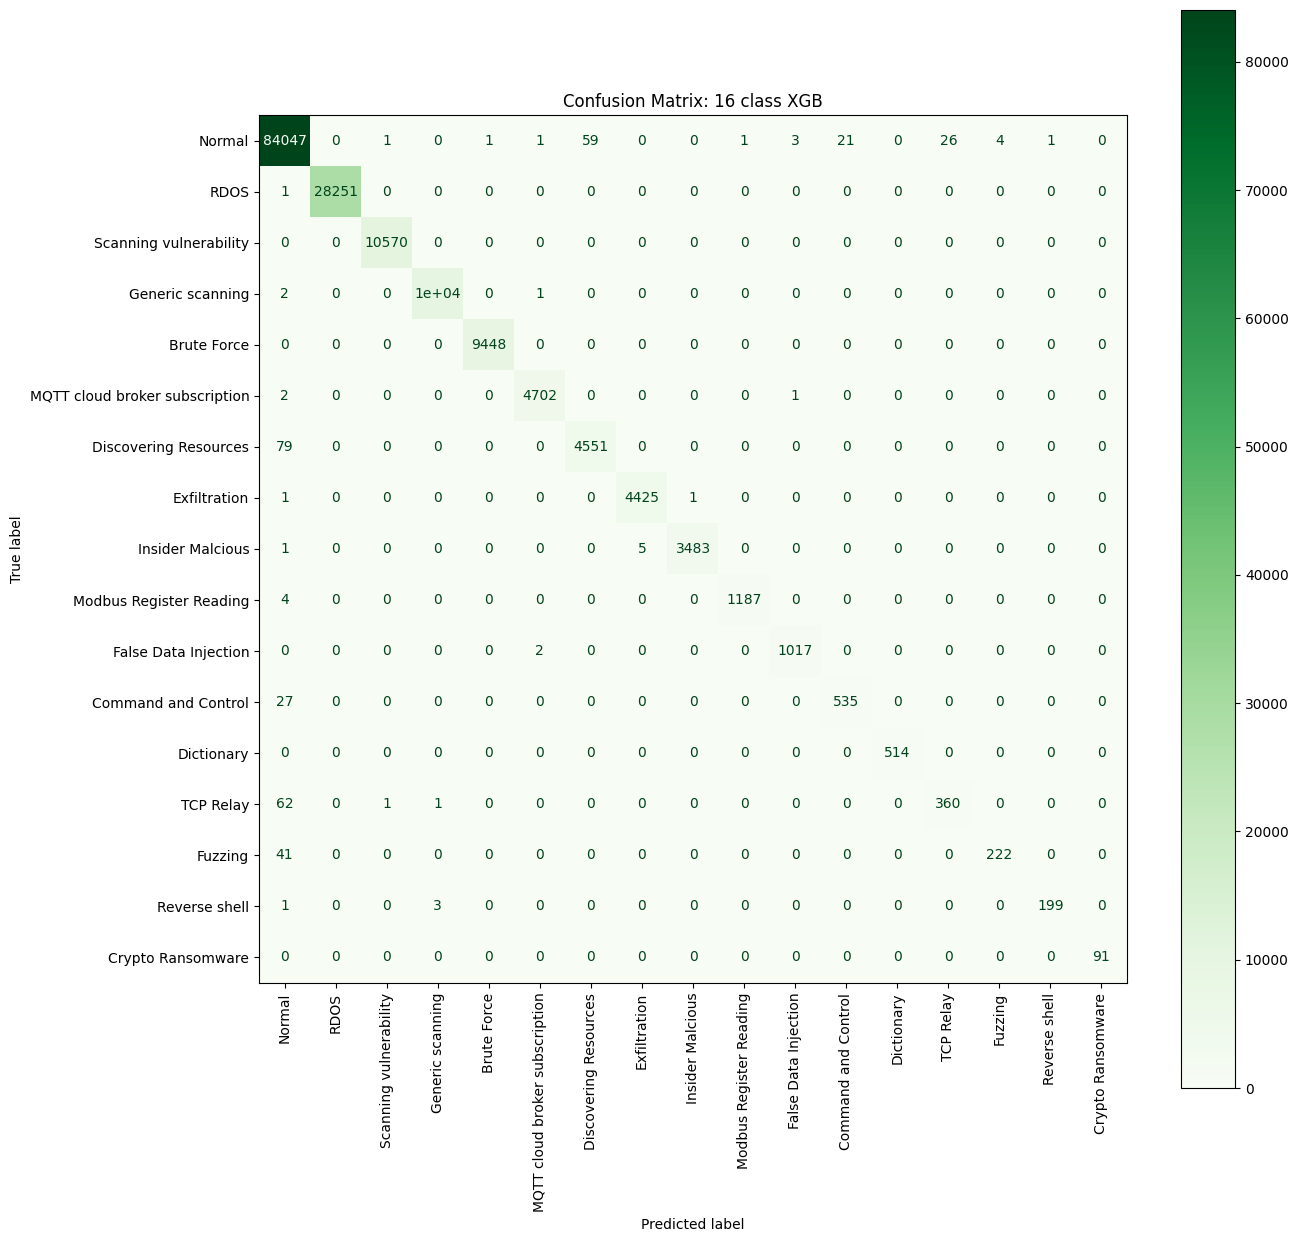


Classification report:
 {'0': {'precision': 0.997377414914321, 'recall': 0.9985979920394463, 'f1-score': 0.9979873302737587, 'support': 84165.0}, '1': {'precision': 1.0, 'recall': 0.9999646042758035, 'f1-score': 0.9999823018246818, 'support': 28252.0}, '2': {'precision': 0.9998108210367007, 'recall': 1.0, 'f1-score': 0.9999054015703339, 'support': 10570.0}, '3': {'precision': 0.9996022275258553, 'recall': 0.9997016409746395, 'f1-score': 0.9996519317786287, 'support': 10055.0}, '4': {'precision': 0.9998941686951001, 'recall': 1.0, 'f1-score': 0.9999470815473356, 'support': 9448.0}, '5': {'precision': 0.9991500212494687, 'recall': 0.9993623804463337, 'f1-score': 0.9992561895654022, 'support': 4705.0}, '6': {'precision': 0.9872017353579176, 'recall': 0.9829373650107991, 'f1-score': 0.9850649350649351, 'support': 4630.0}, '7': {'precision': 0.9988713318284425, 'recall': 0.9995482267901513, 'f1-score': 0.9992096646720108, 'support': 4427.0}, '8': {'precision': 0.9997129735935706, 'recall':

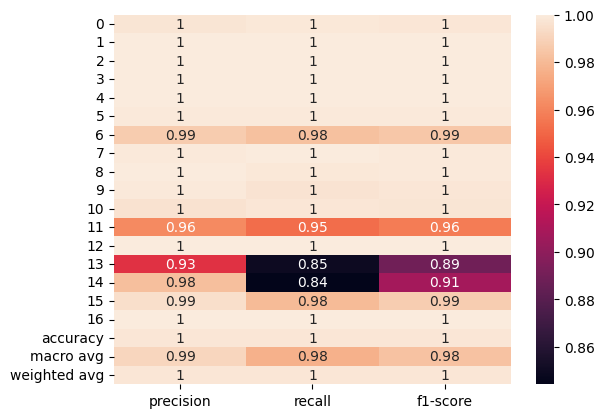

In [61]:
xgb_19_results = eval_metrics(xgb_model_19, X_test , y_test, attacks_19, "Confusion Matrix: 16 class XGB")

#### 3-folds

Classification report:
 {'0': {'precision': 0.996975008229757, 'recall': 0.9985474959900196, 'f1-score': 0.9977606325433961, 'support': 112220.0}, '1': {'precision': 0.9999734543813543, 'recall': 1.0, 'f1-score': 0.9999867270145073, 'support': 37670.0}, '2': {'precision': 0.9995034404483223, 'recall': 0.9997161912870726, 'f1-score': 0.9996098045475507, 'support': 14094.0}, '3': {'precision': 0.999477923627685, 'recall': 0.9995524725889461, 'f1-score': 0.9995151967182547, 'support': 13407.0}, '4': {'precision': 0.9999206223210033, 'recall': 0.9999206223210033, 'f1-score': 0.9999206223210033, 'support': 12598.0}, '5': {'precision': 0.9995217599234816, 'recall': 0.9995217599234816, 'f1-score': 0.9995217599234816, 'support': 6273.0}, '6': {'precision': 0.9867949135963482, 'recall': 0.9805605054268589, 'f1-score': 0.9836678313155114, 'support': 6173.0}, '7': {'precision': 0.9993227226549272, 'recall': 1.0, 'f1-score': 0.999661246612466, 'support': 5902.0}, '8': {'precision': 0.9995698924731

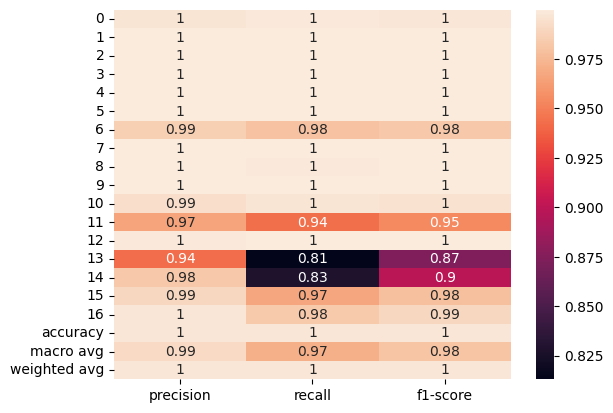

In [145]:
from sklearn.metrics import  accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score

xgb_model_9 = xgb.XGBClassifier(model__gamma = 0 ,model__learning_rate = 0.01, model_max_depth = 3 , model_n_estimators = 50)

# Variables for average classification report
originalclass = []
predictedclass = []
xgb_19_classification_3_fold = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    classification_fold =  metrics.classification_report(y_true, y_pred, output_dict=True) # print classification report
    xgb_19_classification_3_fold.append(classification_fold)
    #sns.heatmap(pd.DataFrame(classification_fold).iloc[:-1, :].T, annot=True)
    print("Classification report:" "\n", classification_fold)
    return accuracy_score(y_true, y_pred) # return accuracy score

nested_score = cross_val_score(xgb_model_9, X=X_train, y=y_train, cv=StratifiedKFold(3, shuffle=True), 
               scoring=make_scorer(classification_report_with_accuracy_score))

print ("Classification report:" "\n", nested_score)

xgb_19_classification_3_fold_mean = metrics.classification_report(originalclass, predictedclass, output_dict=True)

print("Classification report mean:" "\n", xgb_19_classification_3_fold_mean)

sns.heatmap(pd.DataFrame(xgb_19_classification_3_fold_mean).iloc[:-1, :].T, annot=True)

xgb_19_classification_3_fold.append(xgb_19_classification_3_fold_mean)

#### 5-folds

Classification report:
 {'0': {'precision': 0.997108455173641, 'recall': 0.9986781916473594, 'f1-score': 0.9978927060918603, 'support': 67332.0}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 22602.0}, '2': {'precision': 0.9997635374793096, 'recall': 0.9998817547593709, 'f1-score': 0.9998226426248892, 'support': 8457.0}, '3': {'precision': 0.9993788048204746, 'recall': 0.9998756991920448, 'f1-score': 0.9996271902572387, 'support': 8045.0}, '4': {'precision': 0.9998677248677249, 'recall': 1.0, 'f1-score': 0.9999338580593954, 'support': 7559.0}, '5': {'precision': 0.999734113267748, 'recall': 0.9989373007438895, 'f1-score': 0.9993355481727576, 'support': 3764.0}, '6': {'precision': 0.9869848156182213, 'recall': 0.9827213822894169, 'f1-score': 0.9848484848484848, 'support': 3704.0}, '7': {'precision': 0.9991525423728813, 'recall': 0.9988703756001129, 'f1-score': 0.9990114390622793, 'support': 3541.0}, '8': {'precision': 0.9996413199426112, 'recall': 0.9985668219276245

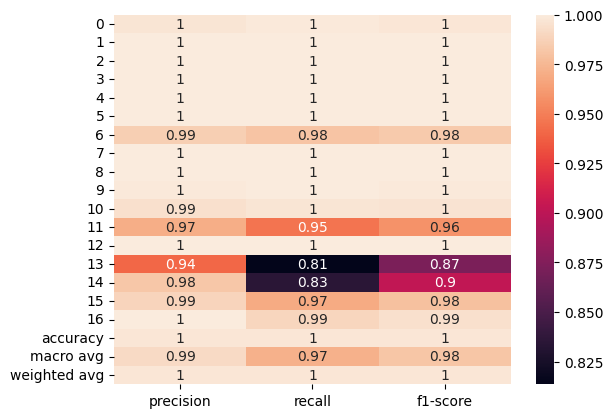

In [146]:
from sklearn.metrics import  accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score

xgb_model_9 = xgb.XGBClassifier(model__gamma = 0 ,model__learning_rate = 0.01, model_max_depth = 3 , model_n_estimators = 50)

# Variables for average classification report
originalclass = []
predictedclass = []
xgb_19_classification_5_fold = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    classification_fold =  metrics.classification_report(y_true, y_pred, output_dict=True) # print classification report
    xgb_19_classification_5_fold.append(classification_fold)
    #sns.heatmap(pd.DataFrame(classification_fold).iloc[:-1, :].T, annot=True)
    print("Classification report:" "\n", classification_fold)
    return accuracy_score(y_true, y_pred) # return accuracy score

nested_score = cross_val_score(xgb_model_9, X=X_train, y=y_train, cv=StratifiedKFold(5, shuffle=True), 
               scoring=make_scorer(classification_report_with_accuracy_score))

print ("Classification report:" "\n", nested_score)

xgb_19_classification_5_fold_mean = metrics.classification_report(originalclass, predictedclass, output_dict=True)

print("Classification report mean:" "\n", xgb_19_classification_5_fold_mean)

sns.heatmap(pd.DataFrame(xgb_19_classification_5_fold_mean).iloc[:-1, :].T, annot=True)

xgb_19_classification_5_fold.append(xgb_19_classification_5_fold_mean)

#### 7-fold

Classification report:
 {'0': {'precision': 0.9968774720013323, 'recall': 0.9957167214205515, 'f1-score': 0.9962967586235593, 'support': 48094.0}, '1': {'precision': 0.9998142069734316, 'recall': 1.0, 'f1-score': 0.9999070948561519, 'support': 16144.0}, '2': {'precision': 0.9985099337748344, 'recall': 0.9983446449263367, 'f1-score': 0.998427282509726, 'support': 6041.0}, '3': {'precision': 0.9975673327541269, 'recall': 0.9991298294465716, 'f1-score': 0.9983479697417617, 'support': 5746.0}, '4': {'precision': 0.9996296296296296, 'recall': 0.9998147805149101, 'f1-score': 0.999722196499676, 'support': 5399.0}, '5': {'precision': 0.9981398809523809, 'recall': 0.9977686872443288, 'f1-score': 0.9979542495815511, 'support': 2689.0}, '6': {'precision': 0.9729425028184893, 'recall': 0.9788279773156899, 'f1-score': 0.9758763663776855, 'support': 2645.0}, '7': {'precision': 0.9980244962465429, 'recall': 0.9984189723320158, 'f1-score': 0.998221695317131, 'support': 2530.0}, '8': {'precision': 0.99

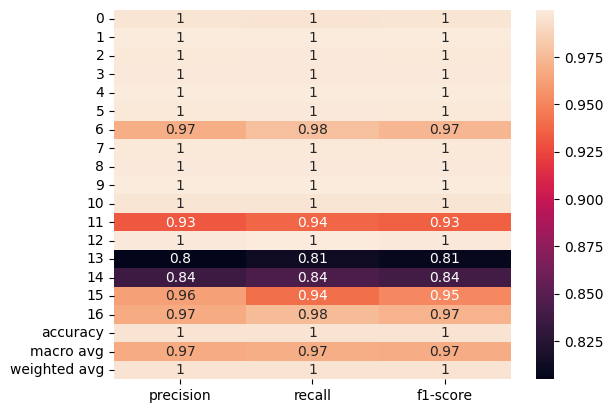

In [147]:
from sklearn.metrics import  accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score

xgb_model_19 = xgb.XGBClassifier(model__gamma = 0 ,model__learning_rate = 0.01, model_max_depth = 3 , model_n_estimators = 50)

# Variables for average classification report
originalclass = []
predictedclass = []
xgb_16_classification_7_fold = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    classification_fold =  metrics.classification_report(y_true, y_pred, output_dict=True) # print classification report
    xgb_16_classification_7_fold.append(classification_fold)
    #sns.heatmap(pd.DataFrame(classification_fold).iloc[:-1, :].T, annot=True)
    print("Classification report:" "\n", classification_fold)
    return accuracy_score(y_true, y_pred) # return accuracy score

nested_score = cross_val_score(dt, X=X_train, y=y_train, cv=StratifiedKFold(7, shuffle=True), 
               scoring=make_scorer(classification_report_with_accuracy_score))

print ("Classification report:" "\n", nested_score)

xgb_16_classification_7_fold_mean = metrics.classification_report(originalclass, predictedclass, output_dict=True)

print("Classification report mean:" "\n", xgb_16_classification_7_fold_mean)

sns.heatmap(pd.DataFrame(xgb_16_classification_7_fold_mean).iloc[:-1, :].T, annot=True)

xgb_16_classification_7_fold.append(xgb_16_classification_7_fold_mean)

#### 10-folds

Classification report:
 {'0': {'precision': 0.9969088098918083, 'recall': 0.9962573516307254, 'f1-score': 0.9965829742980241, 'support': 33666.0}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 11301.0}, '2': {'precision': 0.9981082998344762, 'recall': 0.9983443708609272, 'f1-score': 0.9982263213905641, 'support': 4228.0}, '3': {'precision': 0.9987565282268093, 'recall': 0.9985082048731975, 'f1-score': 0.9986323511127689, 'support': 4022.0}, '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3780.0}, '5': {'precision': 0.9984084880636604, 'recall': 1.0, 'f1-score': 0.9992036102999734, 'support': 1882.0}, '6': {'precision': 0.9690336358782702, 'recall': 0.9800215982721382, 'f1-score': 0.974496644295302, 'support': 1852.0}, '7': {'precision': 0.9983050847457627, 'recall': 0.9977413890457368, 'f1-score': 0.9980231573001976, 'support': 1771.0}, '8': {'precision': 0.9992831541218637, 'recall': 0.9992831541218637, 'f1-score': 0.9992831541218637, 'support':

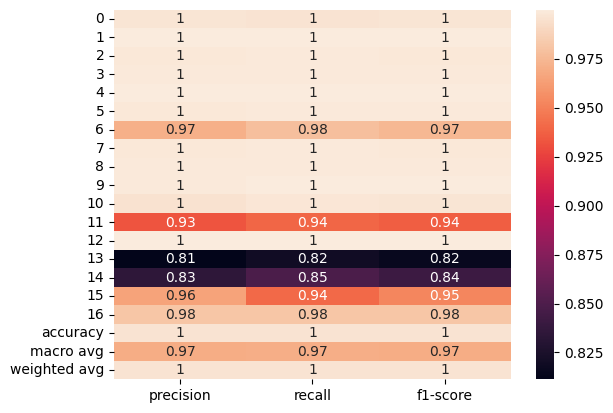

In [148]:
from sklearn.metrics import  accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score

xgb_model_19 = xgb.XGBClassifier(model__gamma = 0 ,model__learning_rate = 0.01, model_max_depth = 3 , model_n_estimators = 50)

# Variables for average classification report
originalclass = []
predictedclass = []
xgb_16_classification_10_fold = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    classification_fold =  metrics.classification_report(y_true, y_pred, output_dict=True) # print classification report
    xgb_16_classification_10_fold.append(classification_fold)
    #sns.heatmap(pd.DataFrame(classification_fold).iloc[:-1, :].T, annot=True)
    print("Classification report:" "\n", classification_fold)
    return accuracy_score(y_true, y_pred) # return accuracy score

nested_score = cross_val_score(dt, X=X_train, y=y_train, cv=StratifiedKFold(10, shuffle=True), 
               scoring=make_scorer(classification_report_with_accuracy_score))

print ("Classification report:" "\n", nested_score)

xgb_16_classification_10_fold_mean = metrics.classification_report(originalclass, predictedclass, output_dict=True)

print("Classification report mean:" "\n", xgb_16_classification_10_fold_mean)

sns.heatmap(pd.DataFrame(xgb_16_classification_10_fold_mean).iloc[:-1, :].T, annot=True)

xgb_16_classification_10_fold.append(xgb_16_classification_10_fold_mean)

#### 14-folds

Classification report:
 {'0': {'precision': 0.9971284697656998, 'recall': 0.9963820850833783, 'f1-score': 0.9967551376986438, 'support': 24047.0}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 8072.0}, '2': {'precision': 0.9986759351208209, 'recall': 0.9986759351208209, 'f1-score': 0.9986759351208209, 'support': 3021.0}, '3': {'precision': 0.9993028929940746, 'recall': 0.9979115906717717, 'f1-score': 0.998606757227447, 'support': 2873.0}, '4': {'precision': 0.9996296296296296, 'recall': 1.0, 'f1-score': 0.9998147805149101, 'support': 2699.0}, '5': {'precision': 0.9970326409495549, 'recall': 0.9992565055762082, 'f1-score': 0.9981433345711103, 'support': 1345.0}, '6': {'precision': 0.9751693002257337, 'recall': 0.9803328290468987, 'f1-score': 0.9777442474537912, 'support': 1322.0}, '7': {'precision': 0.9992094861660079, 'recall': 0.9992094861660079, 'f1-score': 0.9992094861660079, 'support': 1265.0}, '8': {'precision': 0.998997995991984, 'recall': 1.0, 'f1-score': 0.

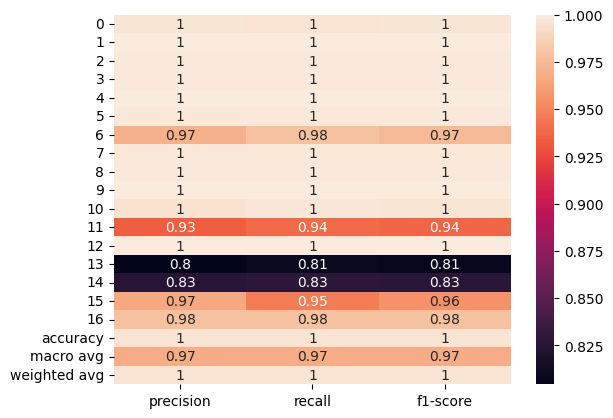

In [149]:
from sklearn.metrics import  accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score

xgb_model_19 = xgb.XGBClassifier(model__gamma = 0 ,model__learning_rate = 0.01, model_max_depth = 3 , model_n_estimators = 50)

# Variables for average classification report
originalclass = []
predictedclass = []
xgb_16_classification_14_fold = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    classification_fold =  metrics.classification_report(y_true, y_pred, output_dict=True) # print classification report
    xgb_16_classification_14_fold.append(classification_fold)
    #sns.heatmap(pd.DataFrame(classification_fold).iloc[:-1, :].T, annot=True)
    print("Classification report:" "\n", classification_fold)
    return accuracy_score(y_true, y_pred) # return accuracy score

nested_score = cross_val_score(dt, X=X_train, y=y_train, cv=StratifiedKFold(14, shuffle=True), 
               scoring=make_scorer(classification_report_with_accuracy_score))

print ("Classification report:" "\n", nested_score)

xgb_16_classification_14_fold_mean = metrics.classification_report(originalclass, predictedclass, output_dict=True)

print("Classification report mean:" "\n", xgb_16_classification_14_fold_mean)

sns.heatmap(pd.DataFrame(xgb_16_classification_14_fold_mean).iloc[:-1, :].T, annot=True)

xgb_16_classification_14_fold.append(xgb_16_classification_14_fold_mean)

#### Folds

In [153]:
xgb_19_classification_3_fold[3]["accuracy"]

0.9975946258637168

In [151]:
xgb_19_classification_5_fold[5]["accuracy"]

0.9976586472285608

In [152]:
xgb_16_classification_7_fold[7]["accuracy"]

0.9959468378780881

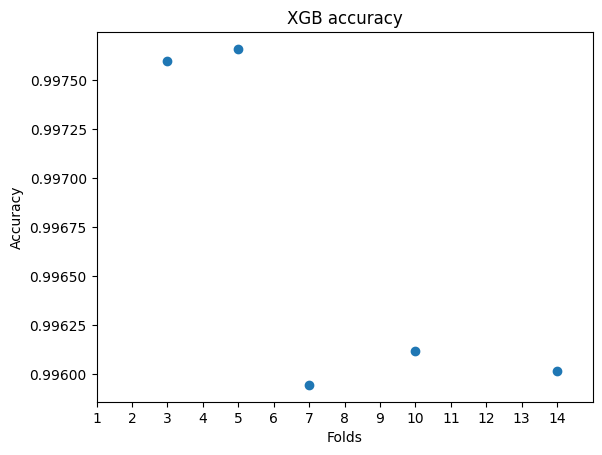

In [150]:
x = [3,5,7,10,14]
# corresponding y axis values
y = [xgb_19_classification_3_fold[3]["accuracy"], xgb_19_classification_5_fold[5]["accuracy"], xgb_16_classification_7_fold[7]["accuracy"], 
     xgb_16_classification_10_fold[10]["accuracy"], xgb_16_classification_14_fold[14]["accuracy"]]
 
# plotting the points 
plt.scatter(x, y, marker='o')
 
# naming the x axis
plt.xlabel("Folds")
plt.xlim(1,15)

dim=np.arange(1,15,1)
plt.xticks(dim)
# naming the y axis
plt.ylabel('Accuracy')
 
# giving a title to my graph
plt.title('XGB accuracy')
 
# function to show the plot
plt.show()

### RF

In [50]:
rfc=RandomForestClassifier()


parameter_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth' : [26, 30, 40],
    'criterion' :['entropy']
}
grid_search = GridSearchCV(rfc, param_grid = parameter_grid,
                          cv =StratifiedKFold(5), verbose = 3)

model = grid_search.fit(X_train, y_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END criterion=entropy, max_depth=26, n_estimators=100;, score=0.997 total time= 6.7min
[CV 2/5] END criterion=entropy, max_depth=26, n_estimators=100;, score=0.997 total time= 6.9min
[CV 3/5] END criterion=entropy, max_depth=26, n_estimators=100;, score=0.997 total time= 6.6min
[CV 4/5] END criterion=entropy, max_depth=26, n_estimators=100;, score=0.997 total time= 7.0min
[CV 5/5] END criterion=entropy, max_depth=26, n_estimators=100;, score=0.996 total time= 6.8min
[CV 1/5] END criterion=entropy, max_depth=26, n_estimators=200;, score=0.997 total time=13.8min
[CV 2/5] END criterion=entropy, max_depth=26, n_estimators=200;, score=0.997 total time=13.4min
[CV 3/5] END criterion=entropy, max_depth=26, n_estimators=200;, score=0.997 total time=13.1min
[CV 4/5] END criterion=entropy, max_depth=26, n_estimators=200;, score=0.997 total time=14.2min
[CV 5/5] END criterion=entropy, max_depth=26, n_estimators=200;, score=0.99

In [46]:
rfc=RandomForestClassifier()


parameter_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth' : [ 30, 40],
    'criterion' :['entropy']
}
grid_search = GridSearchCV(rfc, param_grid = parameter_grid,
                          cv =StratifiedKFold(5), verbose = 3)

model = grid_search.fit(X_train, y_train)

print ("Best Score: {}".format(model.best_score_))
print ("Best params: {}".format(model.best_params_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END criterion=entropy, max_depth=30, n_estimators=100;, score=0.997 total time= 8.4min
[CV 2/5] END criterion=entropy, max_depth=30, n_estimators=100;, score=0.997 total time= 8.5min
[CV 3/5] END criterion=entropy, max_depth=30, n_estimators=100;, score=0.997 total time= 8.4min
[CV 4/5] END criterion=entropy, max_depth=30, n_estimators=100;, score=0.997 total time= 8.4min
[CV 5/5] END criterion=entropy, max_depth=30, n_estimators=100;, score=0.997 total time= 8.4min
[CV 1/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.997 total time=16.8min
[CV 2/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.997 total time=15.9min
[CV 3/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.997 total time=15.3min
[CV 4/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.997 total time=15.2min
[CV 5/5] END criterion=entropy, max_depth=30, n_estimators=200;, score=0.997

In [62]:
rfc_19=RandomForestClassifier(  criterion = 'entropy', max_depth =  40, n_estimators = 500)
rfc_19.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=40, n_estimators=500)


Model Accuracy:
 0.9971342861323838

Confusion matrix:
 [[84045     0     1     4     0     1    80     0     0     1     5    20
      0     4     3     1     0]
 [    1 28251     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    1     0 10567     2     0     0     0     0     0     0     0     0
      0     0     0     0     0]
 [   11     0     0 10043     0     0     0     0     0     0     0     0
      0     0     0     1     0]
 [    0     0     0     0  9448     0     0     0     0     0     0     0
      0     0     0     0     0]
 [    3     0     0     0     0  4701     0     0     0     0     1     0
      0     0     0     0     0]
 [  101     0     0     0     0     0  4527     0     0     0     0     2
      0     0     0     0     0]
 [    0     0     0     0     0     0     0  4425     2     0     0     0
      0     0     0     0     0]
 [    0     0     0     0     0     0     0     3  3486     0     0     0
      0     0

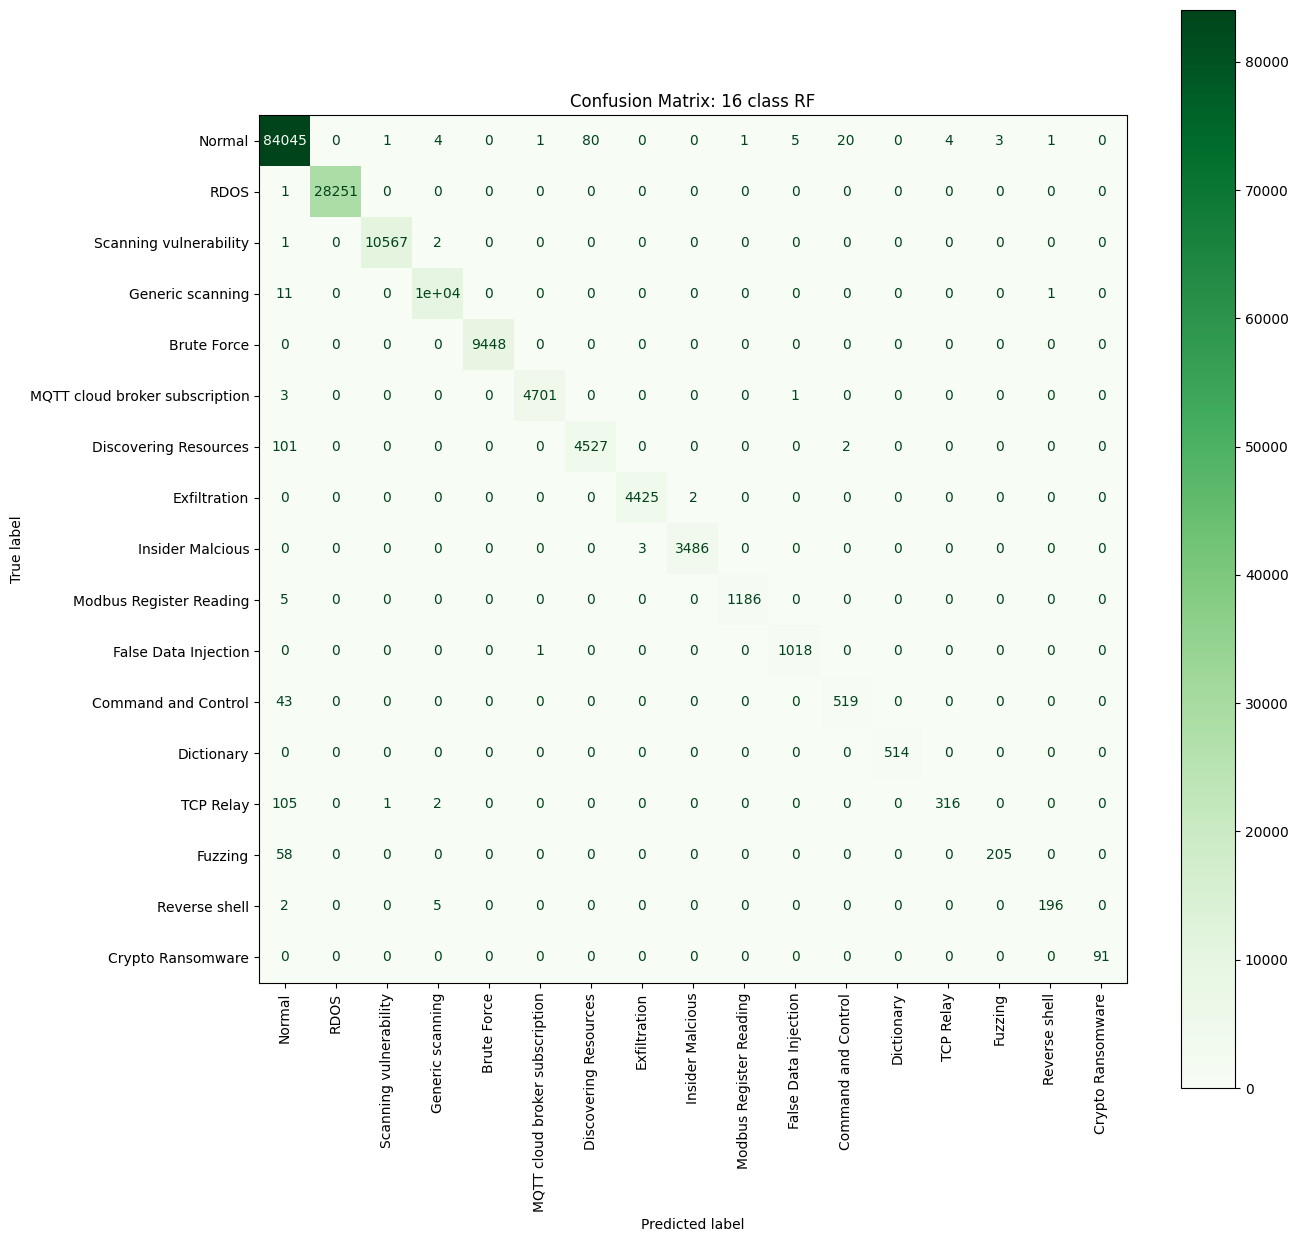


Classification report:
 {'0': {'precision': 0.9960888888888889, 'recall': 0.9985742291926573, 'f1-score': 0.9973300106799573, 'support': 84165.0}, '1': {'precision': 1.0, 'recall': 0.9999646042758035, 'f1-score': 0.9999823018246818, 'support': 28252.0}, '2': {'precision': 0.9998107673384427, 'recall': 0.9997161778618733, 'f1-score': 0.9997634703628365, 'support': 10570.0}, '3': {'precision': 0.9987072394590294, 'recall': 0.9988065638985579, 'f1-score': 0.9987568992093879, 'support': 10055.0}, '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 9448.0}, '5': {'precision': 0.9995747395279608, 'recall': 0.9991498405951116, 'f1-score': 0.9993622448979591, 'support': 4705.0}, '6': {'precision': 0.9826351204688517, 'recall': 0.9777537796976242, 'f1-score': 0.9801883728483274, 'support': 4630.0}, '7': {'precision': 0.9993224932249323, 'recall': 0.9995482267901513, 'f1-score': 0.9994353472614341, 'support': 4427.0}, '8': {'precision': 0.9994266055045872, 'recall': 0.99914015477

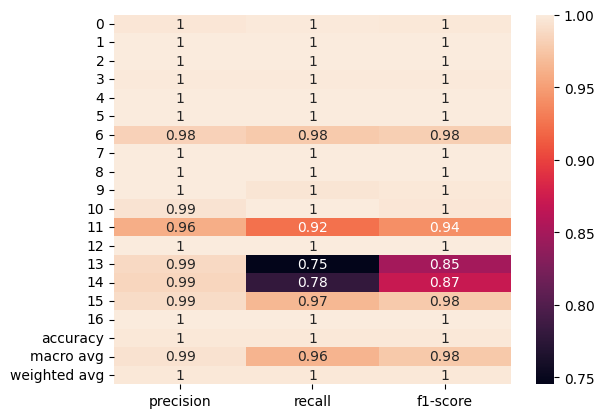

In [63]:
results_19_rf = eval_metrics(rfc_19, X_test , y_test, attacks_19, "Confusion Matrix: 16 class RF")

#### 5-fold

Classification report:
 {'0': {'precision': 0.9946304952369682, 'recall': 0.9986484880888731, 'f1-score': 0.9966354419873126, 'support': 67332.0}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 22602.0}, '2': {'precision': 0.9998817127986752, 'recall': 0.9995270190374838, 'f1-score': 0.9997043344568624, 'support': 8457.0}, '3': {'precision': 0.99826130153999, 'recall': 0.9991298943443132, 'f1-score': 0.9986954090824377, 'support': 8045.0}, '4': {'precision': 1.0, 'recall': 0.9998676898650437, 'f1-score': 0.9999338405557393, 'support': 7558.0}, '5': {'precision': 0.9994686503719448, 'recall': 0.9994686503719448, 'f1-score': 0.9994686503719448, 'support': 3764.0}, '6': {'precision': 0.9832002203249793, 'recall': 0.9638228941684666, 'f1-score': 0.9734151329243353, 'support': 3704.0}, '7': {'precision': 0.9997175141242938, 'recall': 0.9994351878000565, 'f1-score': 0.9995763310266912, 'support': 3541.0}, '8': {'precision': 0.9996417054819061, 'recall': 0.9996417054819061

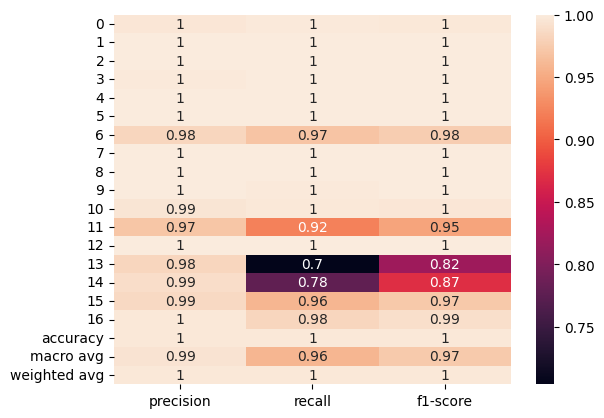

In [67]:
from sklearn.metrics import  accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score

rfc_19=RandomForestClassifier(  criterion = 'entropy', max_depth =  40, n_estimators = 500)

# Variables for average classification report
originalclass = []
predictedclass = []
rf_19_classification_5_fold = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    classification_fold =  metrics.classification_report(y_true, y_pred, output_dict=True) # print classification report
    rf_19_classification_5_fold.append(classification_fold)
    #sns.heatmap(pd.DataFrame(classification_fold).iloc[:-1, :].T, annot=True)
    print("Classification report:" "\n", classification_fold)
    return accuracy_score(y_true, y_pred) # return accuracy score

nested_score = cross_val_score(rfc_19, X=X_train, y=y_train, cv=StratifiedKFold(5, shuffle=True), 
               scoring=make_scorer(classification_report_with_accuracy_score))

print ("Classification report:" "\n", nested_score)

rf_19_classification_5_fold_mean = metrics.classification_report(originalclass, predictedclass, output_dict=True)

print("Classification report mean:" "\n", rf_19_classification_5_fold_mean)

sns.heatmap(pd.DataFrame(rf_19_classification_5_fold_mean).iloc[:-1, :].T, annot=True)

rf_19_classification_5_fold.append(rf_19_classification_5_fold_mean)

#### 7-fold

Classification report:
 {'0': {'precision': 0.9956063086775404, 'recall': 0.9988564062045161, 'f1-score': 0.9972287093258602, 'support': 48094.0}, '1': {'precision': 1.0, 'recall': 0.9999380574826561, 'f1-score': 0.9999690277820794, 'support': 16144.0}, '2': {'precision': 0.9991723224631683, 'recall': 0.9993377483443708, 'f1-score': 0.9992550285572386, 'support': 6040.0}, '3': {'precision': 0.9982620785540494, 'recall': 0.9996519317786287, 'f1-score': 0.9989565217391304, 'support': 5746.0}, '4': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5399.0}, '5': {'precision': 0.9996279761904762, 'recall': 0.999256229081443, 'f1-score': 0.9994420680676958, 'support': 2689.0}, '6': {'precision': 0.985823754789272, 'recall': 0.9727788279773157, 'f1-score': 0.9792578496669837, 'support': 2645.0}, '7': {'precision': 0.9988156336360048, 'recall': 1.0, 'f1-score': 0.999407465929291, 'support': 2530.0}, '8': {'precision': 1.0, 'recall': 0.9984947315604616, 'f1-score': 0.999246798895305

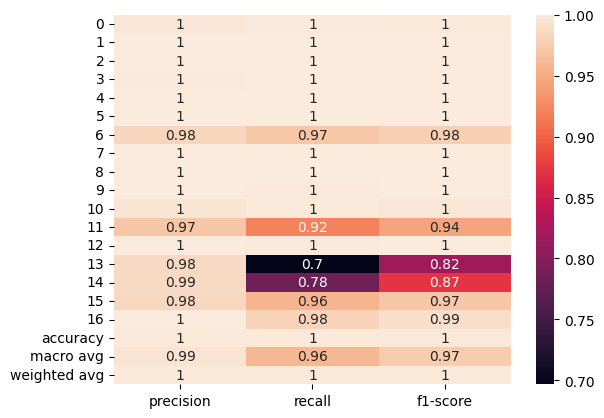

In [66]:
from sklearn.metrics import  accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score

rfc_19=RandomForestClassifier(  criterion = 'entropy', max_depth =  40, n_estimators = 500)

# Variables for average classification report
originalclass = []
predictedclass = []
rf_19_classification_7_fold = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    classification_fold =  metrics.classification_report(y_true, y_pred, output_dict=True) # print classification report
    rf_19_classification_7_fold.append(classification_fold)
    #sns.heatmap(pd.DataFrame(classification_fold).iloc[:-1, :].T, annot=True)
    print("Classification report:" "\n", classification_fold)
    return accuracy_score(y_true, y_pred) # return accuracy score

nested_score = cross_val_score(rfc_19, X=X_train, y=y_train, cv=StratifiedKFold(7, shuffle=True), 
               scoring=make_scorer(classification_report_with_accuracy_score))

print ("Classification report:" "\n", nested_score)

rf_19_classification_7_fold_mean = metrics.classification_report(originalclass, predictedclass, output_dict=True)

print("Classification report mean:" "\n", rf_19_classification_7_fold_mean)

sns.heatmap(pd.DataFrame(rf_19_classification_7_fold_mean).iloc[:-1, :].T, annot=True)

rf_19_classification_7_fold.append(rf_19_classification_7_fold_mean)

#### 10-fold

Classification report:
 {'0': {'precision': 0.996090973702914, 'recall': 0.9991088932454107, 'f1-score': 0.9975976510365692, 'support': 33666.0}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 11301.0}, '2': {'precision': 0.9997633136094675, 'recall': 0.9990539262062441, 'f1-score': 0.9994084940257897, 'support': 4228.0}, '3': {'precision': 1.0, 'recall': 0.9990057171265225, 'f1-score': 0.9995026112907237, 'support': 4023.0}, '4': {'precision': 0.9997354497354497, 'recall': 1.0, 'f1-score': 0.9998677073686996, 'support': 3779.0}, '5': {'precision': 1.0, 'recall': 0.9989373007438895, 'f1-score': 0.9994683678894205, 'support': 1882.0}, '6': {'precision': 0.9891186071817193, 'recall': 0.9816414686825053, 'f1-score': 0.9853658536585367, 'support': 1852.0}, '7': {'precision': 0.9994350282485875, 'recall': 0.9988706945228685, 'f1-score': 0.9991527817000847, 'support': 1771.0}, '8': {'precision': 0.9992831541218637, 'recall': 0.9992831541218637, 'f1-score': 0.9992831541218

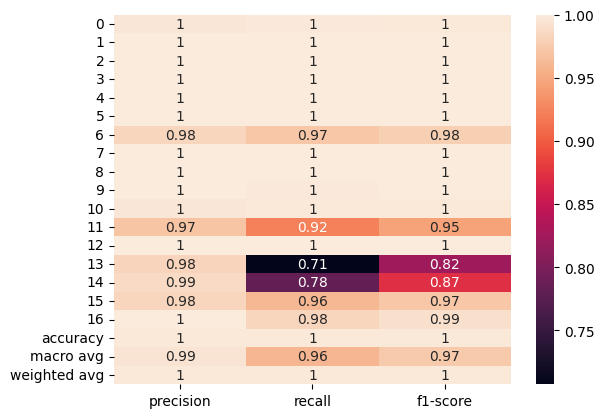

In [68]:
from sklearn.metrics import  accuracy_score, make_scorer
from sklearn.model_selection import cross_val_score

rfc_19=RandomForestClassifier(  criterion = 'entropy', max_depth =  40, n_estimators = 500)

# Variables for average classification report
originalclass = []
predictedclass = []
rf_19_classification_10_fold = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    classification_fold =  metrics.classification_report(y_true, y_pred, output_dict=True) # print classification report
    rf_19_classification_10_fold.append(classification_fold)
    #sns.heatmap(pd.DataFrame(classification_fold).iloc[:-1, :].T, annot=True)
    print("Classification report:" "\n", classification_fold)
    return accuracy_score(y_true, y_pred) # return accuracy score

nested_score = cross_val_score(rfc_19, X=X_train, y=y_train, cv=StratifiedKFold(10, shuffle=True), 
               scoring=make_scorer(classification_report_with_accuracy_score))

print ("Classification report:" "\n", nested_score)

rf_19_classification_10_fold_mean = metrics.classification_report(originalclass, predictedclass, output_dict=True)

print("Classification report mean:" "\n", rf_19_classification_10_fold_mean)

sns.heatmap(pd.DataFrame(rf_19_classification_10_fold_mean).iloc[:-1, :].T, annot=True)

rf_19_classification_10_fold.append(rf_19_classification_10_fold_mean)

## Write results

### 9_class

#### models

In [96]:
def f1_results2( attack_list, classification_results, labels):
    print(labels)
    l = []
    for index in range(0, len(attack_list)):
        l1 = list() 
        l1.append(attack_list[index])
        for classification_model in classification_results:
            l1.append(classification_model[str(index)]['f1-score'])
            print(l1)
        l.append(l1)
    print(l)
    df = pd.DataFrame(l)
    df.rename(columns = {0: "class"})
    for label in range(0, len(labels)):
        print(label)
        df.rename(columns = {(label+1): labels[label]}, inplace = True)
    print(df)
    return df

In [89]:
attacks_9 = ["Normal", "Reconnaissance" , "Weaponization", "Exploitation", "Lateral Movement", "Comand and Control" , "Exfiltration", 
               "Tampering", "Crypto-ransomware", "RDOS"]

classification_results_9 = [results_9_dt, results_9_knn,results_9_lr,results_9_svm,results_9_nb]

models_labels = ["DT", "KNN", "LR", "SVM", "NB" ]

data_results = f1_results2(attacks_9, classification_results_9, models_labels)

data_results.to_csv("results/9_class_all_features.csv")

['DT', 'KNN', 'LR', 'SVM', 'NB']
['Normal', 0.9962978589383233]
['Normal', 0.9962978589383233, 0.9839057515105066]
['Normal', 0.9962978589383233, 0.9839057515105066, 0.9813689349407193]
['Normal', 0.9962978589383233, 0.9839057515105066, 0.9813689349407193, 0.9824298101106271]
['Normal', 0.9962978589383233, 0.9839057515105066, 0.9813689349407193, 0.9824298101106271, 0.4296530261507734]
['Reconnaissance', 0.9918931620584319]
['Reconnaissance', 0.9918931620584319, 0.9761030847325265]
['Reconnaissance', 0.9918931620584319, 0.9761030847325265, 0.9386474123607721]
['Reconnaissance', 0.9918931620584319, 0.9761030847325265, 0.9386474123607721, 0.9418523533998112]
['Reconnaissance', 0.9918931620584319, 0.9761030847325265, 0.9386474123607721, 0.9418523533998112, 0.6881291547958215]
['Weaponization', 0.9994425242501952]
['Weaponization', 0.9994425242501952, 0.9817954929163915]
['Weaponization', 0.9994425242501952, 0.9817954929163915, 0.973512390562398]
['Weaponization', 0.9994425242501952, 0.9817

In [79]:
for label in range(0, len(models_labels)):
        print(label)
        print(models_labels[label])

0
DT
1
KNN
2
LR
3
SVM
4
NB


In [64]:
new_file_9 = add_f1_scores("results/9_class_all_features.csv", attacks_9, [results_9_xgb, results_9_rf], ["XGB", "RF"])
new_file_9.to_csv("results/9_class_all_features.csv")

['XGB', 'RF']
['Normal', 0.9976616378031264]
['Normal', 0.9976616378031264, 0.9973714346745147]
['Reconnaissance', 0.995211179149003]
['Reconnaissance', 0.995211179149003, 0.9947802197802199]
['Weaponization', 0.9997769350881106]
['Weaponization', 0.9997769350881106, 0.9998141333035947]
['Exploitation', 0.9826302729528535]
['Exploitation', 0.9826302729528535, 0.9827160493827161]
['Lateral Movement', 0.9914176732358551]
['Lateral Movement', 0.9914176732358551, 0.9901037509976058]
['Comand and Control', 0.9585585585585585]
['Comand and Control', 0.9585585585585585, 0.9429864253393665]
['Exfiltration', 0.9992094861660079]
['Exfiltration', 0.9992094861660079, 0.9994353472614341]
['Tampering', 0.9950884086444007]
['Tampering', 0.9950884086444007, 0.9965736661771902]
['Crypto-ransomware', 0.994475138121547]
['Crypto-ransomware', 0.994475138121547, 0.994475138121547]
['RDOS', 0.9999823018246818]
['RDOS', 0.9999823018246818, 0.9999823018246818]
[['Normal', 0.9976616378031264, 0.997371434674514

#### K-folds

In [111]:
attacks_9 = ["Normal", "Reconnaissance" , "Weaponization", "Exploitation", "Lateral Movement", "Comand and Control" , "Exfiltration", 
               "Tampering", "Crypto-ransomware", "RDOS"]


numberfold = ["1", "2", "3", "mean" ]

data_results = f1_results(attacks_9, knn_3_folds_class_9, numberfold)

data_results.to_csv("results/cross_val/KNN/9_class_3_fold.csv")

['1', '2', '3', 'mean']
['Normal', 0.9810781323061165]
['Normal', 0.9810781323061165, 0.9816584470491796]
['Normal', 0.9810781323061165, 0.9816584470491796, 0.9810941020366363]
['Normal', 0.9810781323061165, 0.9816584470491796, 0.9810941020366363, 0.9812768332729616]
['Reconnaissance', 0.9709583736689255]
['Reconnaissance', 0.9709583736689255, 0.9723243718408908]
['Reconnaissance', 0.9709583736689255, 0.9723243718408908, 0.9707921154832565]
['Reconnaissance', 0.9709583736689255, 0.9723243718408908, 0.9707921154832565, 0.9713584927785487]
['Weaponization', 0.9756807202459377]
['Weaponization', 0.9756807202459377, 0.9761328640563133]
['Weaponization', 0.9756807202459377, 0.9761328640563133, 0.9753232137465345]
['Weaponization', 0.9756807202459377, 0.9761328640563133, 0.9753232137465345, 0.975712023143613]
['Exploitation', 0.7230046948356806]
['Exploitation', 0.7230046948356806, 0.7702702702702703]
['Exploitation', 0.7230046948356806, 0.7702702702702703, 0.6858513189448442]
['Exploitation

In [112]:

numberfold = ["1", "2", "3","4", "5", "mean" ]

data_results = f1_results(attacks_9, knn_5_folds_class_9, numberfold)

data_results.to_csv("results/cross_val/KNN/9_class_5_fold.csv")

['1', '2', '3', '4', '5', 'mean']
['Normal', 0.9821347655234401]
['Normal', 0.9821347655234401, 0.9825879697349955]
['Normal', 0.9821347655234401, 0.9825879697349955, 0.9822673188690869]
['Normal', 0.9821347655234401, 0.9825879697349955, 0.9822673188690869, 0.9824454621705276]
['Normal', 0.9821347655234401, 0.9825879697349955, 0.9822673188690869, 0.9824454621705276, 0.9824881917832635]
['Normal', 0.9821347655234401, 0.9825879697349955, 0.9822673188690869, 0.9824454621705276, 0.9824881917832635, 0.9823847554329264]
['Reconnaissance', 0.972460056104403]
['Reconnaissance', 0.972460056104403, 0.974069457682626]
['Reconnaissance', 0.972460056104403, 0.974069457682626, 0.972769677876279]
['Reconnaissance', 0.972460056104403, 0.974069457682626, 0.972769677876279, 0.9735165613024482]
['Reconnaissance', 0.972460056104403, 0.974069457682626, 0.972769677876279, 0.9735165613024482, 0.9735248143806174]
['Reconnaissance', 0.972460056104403, 0.974069457682626, 0.972769677876279, 0.9735165613024482, 0

In [113]:
numberfold = ["1", "2", "3","4", "5", "6", "7", "mean" ]

data_results = f1_results(attacks_9, knn_7_folds_class_9, numberfold)

data_results.to_csv("results/cross_val/KNN/9_class_7_fold.csv")

['1', '2', '3', '4', '5', '6', '7', 'mean']
['Normal', 0.983355685161505]
['Normal', 0.983355685161505, 0.9833932616964229]
['Normal', 0.983355685161505, 0.9833932616964229, 0.9832848232848231]
['Normal', 0.983355685161505, 0.9833932616964229, 0.9832848232848231, 0.9824087166264659]
['Normal', 0.983355685161505, 0.9833932616964229, 0.9832848232848231, 0.9824087166264659, 0.9831075813175046]
['Normal', 0.983355685161505, 0.9833932616964229, 0.9832848232848231, 0.9824087166264659, 0.9831075813175046, 0.9831579822846924]
['Normal', 0.983355685161505, 0.9833932616964229, 0.9832848232848231, 0.9824087166264659, 0.9831075813175046, 0.9831579822846924, 0.9827450002078916]
['Normal', 0.983355685161505, 0.9833932616964229, 0.9832848232848231, 0.9824087166264659, 0.9831075813175046, 0.9831579822846924, 0.9827450002078916, 0.9830647412784308]
['Reconnaissance', 0.9756814994698498]
['Reconnaissance', 0.9756814994698498, 0.9747652381765408]
['Reconnaissance', 0.9756814994698498, 0.9747652381765408,

In [114]:
numberfold = ["1", "2", "3","4", "5", "6", "7","8", "9", "10", "mean" ]

data_results = f1_results(attacks_9, knn_10_folds_class_9, numberfold)

data_results.to_csv("results/cross_val/KNN/9_class_10_fold.csv")

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'mean']
['Normal', 0.9827163429386675]
['Normal', 0.9827163429386675, 0.9833100703827993]
['Normal', 0.9827163429386675, 0.9833100703827993, 0.9833313525077253]
['Normal', 0.9827163429386675, 0.9833100703827993, 0.9833313525077253, 0.9834332878095124]
['Normal', 0.9827163429386675, 0.9833100703827993, 0.9833313525077253, 0.9834332878095124, 0.9832679505468378]
['Normal', 0.9827163429386675, 0.9833100703827993, 0.9833313525077253, 0.9834332878095124, 0.9832679505468378, 0.9827412072243346]
['Normal', 0.9827163429386675, 0.9833100703827993, 0.9833313525077253, 0.9834332878095124, 0.9832679505468378, 0.9827412072243346, 0.98324520230527]
['Normal', 0.9827163429386675, 0.9833100703827993, 0.9833313525077253, 0.9834332878095124, 0.9832679505468378, 0.9827412072243346, 0.98324520230527, 0.9834858025424736]
['Normal', 0.9827163429386675, 0.9833100703827993, 0.9833313525077253, 0.9834332878095124, 0.9832679505468378, 0.9827412072243346, 0.983

In [115]:
numberfold = ["1", "2", "3","4", "5", "6", "7","8", "9", "10", "11", "12", "13", "14" , "mean" ]

data_results = f1_results(attacks_9, knn_14_folds_class_9, numberfold)

data_results.to_csv("results/cross_val/KNN/9_class_14_fold.csv")

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'mean']
['Normal', 0.9821840633640313]
['Normal', 0.9821840633640313, 0.9830276087001683]
['Normal', 0.9821840633640313, 0.9830276087001683, 0.9833870464705271]
['Normal', 0.9821840633640313, 0.9830276087001683, 0.9833870464705271, 0.9832827379714726]
['Normal', 0.9821840633640313, 0.9830276087001683, 0.9833870464705271, 0.9832827379714726, 0.9834605862650051]
['Normal', 0.9821840633640313, 0.9830276087001683, 0.9833870464705271, 0.9832827379714726, 0.9834605862650051, 0.9833312549361932]
['Normal', 0.9821840633640313, 0.9830276087001683, 0.9833870464705271, 0.9832827379714726, 0.9834605862650051, 0.9833312549361932, 0.9846077044679259]
['Normal', 0.9821840633640313, 0.9830276087001683, 0.9833870464705271, 0.9832827379714726, 0.9834605862650051, 0.9833312549361932, 0.9846077044679259, 0.9831418581418582]
['Normal', 0.9821840633640313, 0.9830276087001683, 0.9833870464705271, 0.9832827379714726, 0.983460586265005

### 19_class

In [97]:
attacks_19 = ["Normal", "RDOS" , "Scanning vulnerability", "Generic scanning", "Brute Force", "MQTT cloud broker subscription" , "Discovering Resources", 
               "Exfiltration", "Insider Malcious", "Modbus Register Reading", "False Data Injection", "Command and Control", "Dictionary",
               "TCP Relay", "Fuzzing" , "Reverse shell" , "Crypto Ransomware"]

classification_results_19 = [results_19_dt, results_19_knn,results_19_lr,results_19_svm,results_19_nb]

models_labels = ["DT", "KNN", "LR", "SVM", "NB" ]

results_19 = f1_results2(attacks_19, classification_results_19, models_labels)

results_19.to_csv("results/19_class_all_features.csv")

['DT', 'KNN', 'LR', 'SVM', 'NB']
['Normal', 0.9966565511999003]
['Normal', 0.9966565511999003, 0.9838885984506439]
['Normal', 0.9966565511999003, 0.9838885984506439, 0.9841307131194719]
['Normal', 0.9966565511999003, 0.9838885984506439, 0.9841307131194719, 0.9827252577138234]
['Normal', 0.9966565511999003, 0.9838885984506439, 0.9841307131194719, 0.9827252577138234, 0.20848180570772126]
['RDOS', 0.9999646055286164]
['RDOS', 0.9999646055286164, 0.9994516089087018]
['RDOS', 0.9999646055286164, 0.9994516089087018, 0.9988850544199628]
['RDOS', 0.9999646055286164, 0.9994516089087018, 0.9988850544199628, 0.9992566108534815]
['RDOS', 0.9999646055286164, 0.9994516089087018, 0.9988850544199628, 0.9992566108534815, 0.9955828827873777]
['Scanning vulnerability', 0.9982022897152049]
['Scanning vulnerability', 0.9982022897152049, 0.9959854531714919]
['Scanning vulnerability', 0.9982022897152049, 0.9959854531714919, 0.93931701709852]
['Scanning vulnerability', 0.9982022897152049, 0.9959854531714919, 

In [66]:
new_file_19 = add_f1_scores("results/19_class_all_features.csv", attacks_19, [xgb_19_results, results_19_rf], ["XGB", "RF"])
new_file_19.to_csv("results/19_class_all_features.csv")

['XGB', 'RF']
['Normal', 0.9979873302737587]
['Normal', 0.9979873302737587, 0.9973300106799573]
['RDOS', 0.9999823018246818]
['RDOS', 0.9999823018246818, 0.9999823018246818]
['Scanning vulnerability', 0.9999054015703339]
['Scanning vulnerability', 0.9999054015703339, 0.9997634703628365]
['Generic scanning', 0.9996519317786287]
['Generic scanning', 0.9996519317786287, 0.9987568992093879]
['Brute Force', 0.9999470815473356]
['Brute Force', 0.9999470815473356, 1.0]
['MQTT cloud broker subscription', 0.9992561895654022]
['MQTT cloud broker subscription', 0.9992561895654022, 0.9993622448979591]
['Discovering Resources', 0.9850649350649351]
['Discovering Resources', 0.9850649350649351, 0.9801883728483274]
['Exfiltration', 0.9992096646720108]
['Exfiltration', 0.9992096646720108, 0.9994353472614341]
['Insider Malcious', 0.9989961279219849]
['Insider Malcious', 0.9989961279219849, 0.9992833596101477]
['Modbus Register Reading', 0.9978982765868012]
['Modbus Register Reading', 0.9978982765868012,

#### K-folds

In [87]:
attacks_19 = ["Normal", "RDOS" , "Scanning vulnerability", "Generic scanning", "Brute Force", "MQTT cloud broker subscription" , "Discovering Resources", 
               "Exfiltration", "Insider Malcious", "Modbus Register Reading", "False Data Injection", "Command and Control", "Dictionary",
               "TCP Relay", "Fuzzing" , "Reverse shell" , "Crypto Ransomware"]




In [82]:
attacks_19 = ["Normal", "RDOS" , "Scanning vulnerability", "Generic scanning", "Brute Force", "MQTT cloud broker subscription" , "Discovering Resources", 
               "Exfiltration", "Insider Malcious", "Modbus Register Reading", "False Data Injection", "Command and Control", "Dictionary",
               "TCP Relay", "Fuzzing" , "Reverse shell" , "Crypto Ransomware"]



numberfold = ["1", "2", "3", "mean" ]

data_results = f1_results(attacks_19, nb_3_folds_class_19, numberfold)

data_results.to_csv("results/cross_val/NB/16_class_3_fold.csv")

['1', '2', '3', 'mean']
['Normal', 0.19688087245627278]
['Normal', 0.19688087245627278, 0.1975076680959034]
['Normal', 0.19688087245627278, 0.1975076680959034, 0.2165364335175656]
['Normal', 0.19688087245627278, 0.1975076680959034, 0.2165364335175656, 0.20368967871314586]
['RDOS', 0.995426283623444]
['RDOS', 0.995426283623444, 0.9961027598822875]
['RDOS', 0.995426283623444, 0.9961027598822875, 0.9958921898603345]
['RDOS', 0.995426283623444, 0.9961027598822875, 0.9958921898603345, 0.995807100094992]
['Scanning vulnerability', 0.5030871700131265]
['Scanning vulnerability', 0.5030871700131265, 0.5054119507734888]
['Scanning vulnerability', 0.5030871700131265, 0.5054119507734888, 0.5175696898311739]
['Scanning vulnerability', 0.5030871700131265, 0.5054119507734888, 0.5175696898311739, 0.5086795907025401]
['Generic scanning', 0.7820751879699248]
['Generic scanning', 0.7820751879699248, 0.7838938320012064]
['Generic scanning', 0.7820751879699248, 0.7838938320012064, 0.7838623697601163]
['Gen

In [83]:
numberfold = ["1", "2", "3","4", "5", "mean" ]

data_results = f1_results(attacks_19, nb_5_folds_class_19, numberfold)

data_results.to_csv("results/cross_val/NB/16_class_5_fold.csv")

['1', '2', '3', '4', '5', 'mean']
['Normal', 0.20045947534327083]
['Normal', 0.20045947534327083, 0.21269765467473203]
['Normal', 0.20045947534327083, 0.21269765467473203, 0.20285988688507098]
['Normal', 0.20045947534327083, 0.21269765467473203, 0.20285988688507098, 0.20314208743431755]
['Normal', 0.20045947534327083, 0.21269765467473203, 0.20285988688507098, 0.20314208743431755, 0.20044620790081896]
['Normal', 0.20045947534327083, 0.21269765467473203, 0.20285988688507098, 0.20314208743431755, 0.20044620790081896, 0.20393275652904244]
['RDOS', 0.9957570936091222]
['RDOS', 0.9957570936091222, 0.9958242195267448]
['RDOS', 0.9957570936091222, 0.9958242195267448, 0.9959127764399178]
['RDOS', 0.9957570936091222, 0.9958242195267448, 0.9959127764399178, 0.995761027950722]
['RDOS', 0.9957570936091222, 0.9958242195267448, 0.9959127764399178, 0.995761027950722, 0.9958024036762108]
['RDOS', 0.9957570936091222, 0.9958242195267448, 0.9959127764399178, 0.995761027950722, 0.9958024036762108, 0.995811

In [84]:
numberfold = ["1", "2", "3","4", "5", "6", "7", "mean" ]

data_results = f1_results(attacks_19, nb_7_folds_class_19, numberfold)

data_results.to_csv("results/cross_val/NB/16_class_7_fold.csv")

['1', '2', '3', '4', '5', '6', '7', 'mean']
['Normal', 0.2047799399242523]
['Normal', 0.2047799399242523, 0.2028568761086733]
['Normal', 0.2047799399242523, 0.2028568761086733, 0.20381880284450418]
['Normal', 0.2047799399242523, 0.2028568761086733, 0.20381880284450418, 0.20122988355357846]
['Normal', 0.2047799399242523, 0.2028568761086733, 0.20381880284450418, 0.20122988355357846, 0.20834884933343262]
['Normal', 0.2047799399242523, 0.2028568761086733, 0.20381880284450418, 0.20122988355357846, 0.20834884933343262, 0.212487000445699]
['Normal', 0.2047799399242523, 0.2028568761086733, 0.20381880284450418, 0.20122988355357846, 0.20834884933343262, 0.212487000445699, 0.20010100443297232]
['Normal', 0.2047799399242523, 0.2028568761086733, 0.20381880284450418, 0.20122988355357846, 0.20834884933343262, 0.212487000445699, 0.20010100443297232, 0.20481224567023137]
['RDOS', 0.9956726013847675]
['RDOS', 0.9956726013847675, 0.9953327357586622]
['RDOS', 0.9956726013847675, 0.9953327357586622, 0.9961

In [85]:
numberfold = ["1", "2", "3","4", "5", "6", "7","8", "9", "10", "mean" ]

data_results = f1_results(attacks_19, nb_10_folds_class_19, numberfold)

data_results.to_csv("results/cross_val/NB/16_class_10_fold.csv")

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'mean']
['Normal', 0.20661377070131529]
['Normal', 0.20661377070131529, 0.20250800426894341]
['Normal', 0.20661377070131529, 0.20250800426894341, 0.2058917536756872]
['Normal', 0.20661377070131529, 0.20250800426894341, 0.2058917536756872, 0.20462116568504649]
['Normal', 0.20661377070131529, 0.20250800426894341, 0.2058917536756872, 0.20462116568504649, 0.20178342588637332]
['Normal', 0.20661377070131529, 0.20250800426894341, 0.2058917536756872, 0.20462116568504649, 0.20178342588637332, 0.21333474778549832]
['Normal', 0.20661377070131529, 0.20250800426894341, 0.2058917536756872, 0.20462116568504649, 0.20178342588637332, 0.21333474778549832, 0.20280112044817927]
['Normal', 0.20661377070131529, 0.20250800426894341, 0.2058917536756872, 0.20462116568504649, 0.20178342588637332, 0.21333474778549832, 0.20280112044817927, 0.20532765050612678]
['Normal', 0.20661377070131529, 0.20250800426894341, 0.2058917536756872, 0.20462116568504649, 0.201783

In [86]:
numberfold = ["1", "2", "3","4", "5", "6", "7","8", "9", "10", "11", "12", "13", "14" , "mean" ]

data_results = f1_results(attacks_19, nb_14_folds_class_19, numberfold)

data_results.to_csv("results/cross_val/NB/16_class_14_fold.csv")

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'mean']
['Normal', 0.20044126995998654]
['Normal', 0.20044126995998654, 0.20544369873228932]
['Normal', 0.20044126995998654, 0.20544369873228932, 0.20407553929984326]
['Normal', 0.20044126995998654, 0.20544369873228932, 0.20407553929984326, 0.20609178689930283]
['Normal', 0.20044126995998654, 0.20544369873228932, 0.20407553929984326, 0.20609178689930283, 0.2107494885623954]
['Normal', 0.20044126995998654, 0.20544369873228932, 0.20407553929984326, 0.20609178689930283, 0.2107494885623954, 0.20707127156216237]
['Normal', 0.20044126995998654, 0.20544369873228932, 0.20407553929984326, 0.20609178689930283, 0.2107494885623954, 0.20707127156216237, 0.2065881651512893]
['Normal', 0.20044126995998654, 0.20544369873228932, 0.20407553929984326, 0.20609178689930283, 0.2107494885623954, 0.20707127156216237, 0.2065881651512893, 0.2031290840521265]
['Normal', 0.20044126995998654, 0.20544369873228932, 0.20407553929984326, 0.206